# US Census - Analysis of the US incomes <a name="start"></a>

# Table of contents
1. [Imports](#imports)
2. [Getting the data](#data)
3. [Data preparation](#preparation)
4. [Variables analysis](#variables)
	1. [Methodology](#methodology)
	2. [Variable age](#age)
	3. [Variable workclass](#workclass)
	4. [Variable fnlwgt](#fnlwgt)
	5. [Variable education](#education)
	6. [Variable education_num](#education_num)
	7. [Variable marital_status](#marital_status)
	8. [Variable occupation](#occupation)
	9. [Variable relationship](#relationship)
	10. [Variable race](#race)
	11. [Variable sex](#sex)
	12. [Variable capital_gain](#capital_gain)
	13. [Variable capital_loss](#capital_loss)
	14. [Variable hours_per_week](#hours_per_week)
	15. [Variable native_country](#native_country)
	16. [Variable income](#income)
5. [Exploratory data analysis](#exploration)
	1. [Capital gain vs capital loss](#capital_comparison)
		1. [All incomes](#all_incomes)
		2. [Low income](#low_income)
		3. [High income](#high_income)
	2. [Gender is a key feature](#gender_key)
	3. [Education level broad analysis](#education_broad)
		1. [Setup](#setup)
		2. [Age influence](#edu_age)
		3. [Workclass influence](#edu_workclass)
		4. [Marital status influence](#edu_status)
		5. [Occupation influence](#edu_occupation)
		6. [Relationship influence](#edu_relationship)
		7. [Ethnicity influence](#edu_ethnicity)
		8. [Gender influence](#edu_gender)
		9. [Capital gain influence](#edu_cap_gain)
		10. [Capital loss influence](#edu_cap_loss)
		11. [Hours per week influence](#edu_hours)
		12. [Birth location influence](#edu_birth)
			1. [By country](#edu_country)
			2. [By continent](#edu_continent)
        13. [Playing profilers](#profile)
            1. [Game rule](#profile_rule)
            2. [Low income profile](#profile_low)
            3. [High income profile](#profile_high)
            4. [Score](#profile_score)
            5. [Second try](#profile_2)
6. [Machine Learning](#machine_learning)
    1. [Metrics preparation](#metrics_prep)
    2. [Models preparation](#models_prep)
	3. [Features importance](#feat_importance)
	4. [Data preparation](#data_prep)
	5. [First estimation](#first_estimation)
	6. [Confirming the DataFrame choice...](#df_confirm)
		 1. [... for MLP classifier](#mlpc_df_confirm)
		 2. [... for Logistic regression](#logreg_df_confirm)
		 3. [... for Random Forest](#rf_df_confirm)
	7. [Final tunings](#final_tuning)
		1. [Tuning Logistic Regressor](#logreg_tuning)
		2. [Tuning MLP Classifier](#mlpc_tuning)
		3. [Tuning Random Forest](#rf_tuning)
	8. [Ensemble of the three](#ensembling)
7. [What would improve the predictability of this dataset ?](#conclusion)

# Imports <a name="imports"></a>

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from IPython.display import display
import AnalysisHelper as ah
import sys, time

In [2]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.style.use("fast")

[Go back to the top](#start)

# Getting the data <a name="data"></a>

In [3]:
df=pd.read_csv("data/adult.csv")

In [4]:
df.head(10)

age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0                  ?   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family  White  Female             0   
2                  ?       Unmarried  Black  Female             0   
3  Machine-op-inspct       Unmarried  White  Female             0   
4     Prof-specialty       Own-child  White  Female             0   
5      Other-service       Unmarried  White  Female             0   
6       Adm-clerical       Unmarried  White    Male             0   
7     Prof-specialty  Other-relative  White  Female             0   
8     Prof-specialty   Not-in-family  White  Female             0   
9       Craft-repair       Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K  
7          3683              20  United-States   >50K  
8          3683              40  United-States  <=50K  
9          3004              60              ?   >50K

We want to get rid of the commas in the column names, so we can call them with the object oriented way instead of the string index.

In [5]:
df.columns = df.columns.str.replace(".","_")
df.head(1)

age workclass  fnlwgt education  education_num marital_status occupation  \
0   90         ?   77053   HS-grad              9        Widowed          ?   

    relationship   race     sex  capital_gain  capital_loss  hours_per_week  \
0  Not-in-family  White  Female             0          4356              40   

  native_country income  
0  United-States  <=50K

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().any().any()

False

This Dataset has no NA, but interrogation marks "?" instead.

Let's replace the interrogation marks "?" by NAs, so that my package works better.

In [8]:
df.replace({"?":None}, inplace=True)

[Go back to the top](#start)

# Data preparation <a name="preparation"></a>

Each row of the dataset relates to a US worker with specific socia-economical caracteristics. The "fnlwgt" variable shows how many similar individuals this worker represents, for a specific period of time.

I made a package named AnalysisHelper which can be thought as a enhanced pandas.DataFrame.info method. It is available on my GitHub here : https://github.com/WGribaa/data-science-utils

Knowing that most variables have a modularity of 16 values or less, we can set the parameter 'max_categorisable' of the AnalysisHelper class so we can see every directly each of those modularities.


##### GENERAL DATAFRAME INFOS #####

The dataframe has 15 columns and 32561 rows.
Indices : from 0 to 32560 (step= 1)
0:	"age".............of type int64 	0 null values and 73 uniques.
1:	"workclass".......of type object 	1836 null values and 9 uniques [None, Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked].
2:	"fnlwgt"..........of type int64 	0 null values and 21648 uniques.
3:	"education".......of type object 	0 null values and 16 uniques [HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool].
4:	"education_num"...of type int64 	0 null values and 16 uniques [9, 10, 4, 6, 16, 15, 13, 14, 7, 12, 11, 2, 3, 8, 5, 1].
5:	"marital_status"..of type object 	0 null values and 7 uniques [Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse].
6:	"occupation"......of type object 	1843 null value

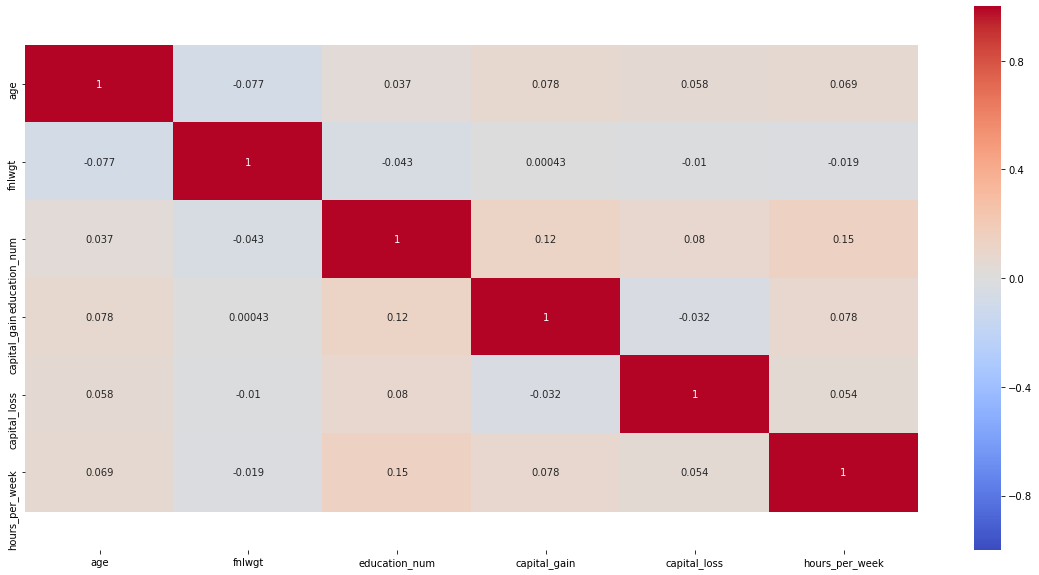

In [9]:
helper = ah.Helper(df, max_categorisable=16)

To improve performances, we could apply the advices given with the following method, but we won't do it now because we are also going to do more specific changes in the same regard.

As it clearly states, the (previous) interrogation marks "?" of the occupation variable are all caused by the value 'Never-worker' from the variable workclass. Therefore, let's impute this specific value to the idea of unemploymnent.

In [10]:
df[df.occupation.isna()].workclass.unique()

array([None, 'Never-worked'], dtype=object)

In [11]:
df[df.workclass.isna()].occupation.unique()

array([None], dtype=object)

Indead, those three modalities are highly linked. All "Never-worked" in workclass cause NA in occupation, and all NAs in occupation cause either NA or "never_worked" in workclass.

We should therefore replace all NAs in occupation to "None".
All NAs in workclass are therefore currently unemployed, at least, so let's replace that as well.

In [12]:
df.occupation.fillna("None", inplace=True)
df.workclass.fillna("Unemployed", inplace=True)

In [13]:
print("People with occupation \"None\" show those work classes : %s"%list(df[df.occupation=="None"].workclass.unique()))

People with occupation "None" show those work classes : ['Unemployed', 'Never-worked']


In [14]:
print("People with workclass \"Never-worked\" and \"Unemployed\" show those occupation : %s"%list(df[(df.workclass=="Never-worker")|(df.workclass=="Unemployed")].occupation.unique()))

People with workclass "Never-worked" and "Unemployed" show those occupation : ['None']


In [15]:
print("This DataSet contains %i duplicates."%df.duplicated().sum())

This DataSet contains 24 duplicates.


Those duplicates are morst certainly real duplicates, we should therefore drop them.

In [16]:
df = df.drop_duplicates()

In [17]:
print("This dataset now contains %i duplicates."%df.duplicated().sum())

This dataset now contains 0 duplicates.


Except fot the 'fnlwgt' variable, each of the attributes show a quite low modularity. Let's keep in mind that some of them could be further regrouped.

[Go back to the top](#start)

# Variables analysis <a name="variables"></a>

## Methodology <a name="methodology"></a>

We will factorise the code so we ligthen the remaining of this part of the anaylis. The following function 'distri_analysis' will take care of most of the calls needed to extract knowledge of uni and bi-variable analysis.

In the program : for each variable, it will analyse the independant distribution and the distribution with regard to both the values of our reference target variable : 'income'.

In [18]:
inf = df.income=="<=50K"

Firstly, the 'inf' variable will be our filter between low and high incomes. It will remain useful further into our analysis, so let's keep it in the global memory space.

In [19]:
def distri_analysis(dataframe, column_name):

    fig = plt.figure(figsize=(20,40))
    gs = fig.add_gridspec(7,2)
    axgendist = fig.add_subplot(gs[0,0])
    axgenpie = fig.add_subplot(gs[0,1])
    axsepdisabs = fig.add_subplot(gs[1,:])
    axsepdisprop = fig.add_subplot(gs[2,:])
    axinfpie = fig.add_subplot(gs[3:5,0])
    axsuppie = fig.add_subplot(gs[3:5,1])
    axstack = fig.add_subplot(gs[5:,:])
    
    totals = dataframe.groupby(column_name)[dataframe.columns[0]].count()
    group = totals.sort_values(ascending=False)
    axgendist.bar(group.index, group.values)
    axgendist.set_xticklabels(group.index, rotation=45)
    axgendist.set_title("General distribution")
    axgenpie.pie(group.values, labels=group.index, autopct="%.2f%%")
    axgenpie.set_title("General proportion")
    
    
    group = dataframe.groupby([column_name, "income"])[dataframe.columns[0]].count().unstack().fillna(0)
    group["mean"]=group.mean(axis=1)
    group.sort_values(by="mean", ascending=False, inplace=True)
    group.drop(columns="mean", inplace=True)
    group.plot.bar(ax=axsepdisabs)
    axsepdisabs.set_xlabel(None)
    axsepdisabs.set_xticklabels(group.index, rotation=45)
    axsepdisabs.set_title("Population by %s and income"%column_name)
    
    group=group*100/(group.sum(axis=0))
    group.sort_values(by=group.columns[0], ascending=False, inplace=True)
    group.plot.bar(ax=axsepdisprop)
    axsepdisprop.set_xticklabels(group.index, rotation=45)
    axsepdisprop.set_xlabel(None)
    axsepdisprop.set_title("Proportion in %% by %s and income"%column_name)
    
    low_group = dataframe[inf].groupby(column_name)[dataframe.columns[0]].count()
    axinfpie.pie(low_group.values, labels=low_group.index, autopct="%.2f%%")
    axinfpie.set_title("Proportion of low income by %s"%column_name)
    
    high_group = dataframe[~inf].groupby(column_name)[dataframe.columns[0]].count()
    axsuppie.pie(high_group.values, labels=high_group.index, autopct="%.2f%%")
    axsuppie.set_title("Proportion of high income by %s"%column_name)
    
    low_per = [v*100/tot for v, tot in zip(low_group, totals)]
    axstack.bar(low_group.index, low_per, label="<=50K")
    axstack.bar(low_group.index, [100-v for v in low_per], bottom=low_per, label=">50K")
    axstack.legend()
    axstack.set_xticklabels(low_group.index, rotation=45)
    axstack.set_title("High and low incomes by %s"%column_name)
    
    fig.subplots_adjust(hspace=0.25)
    plt.show()

Here is an overview of what it does.

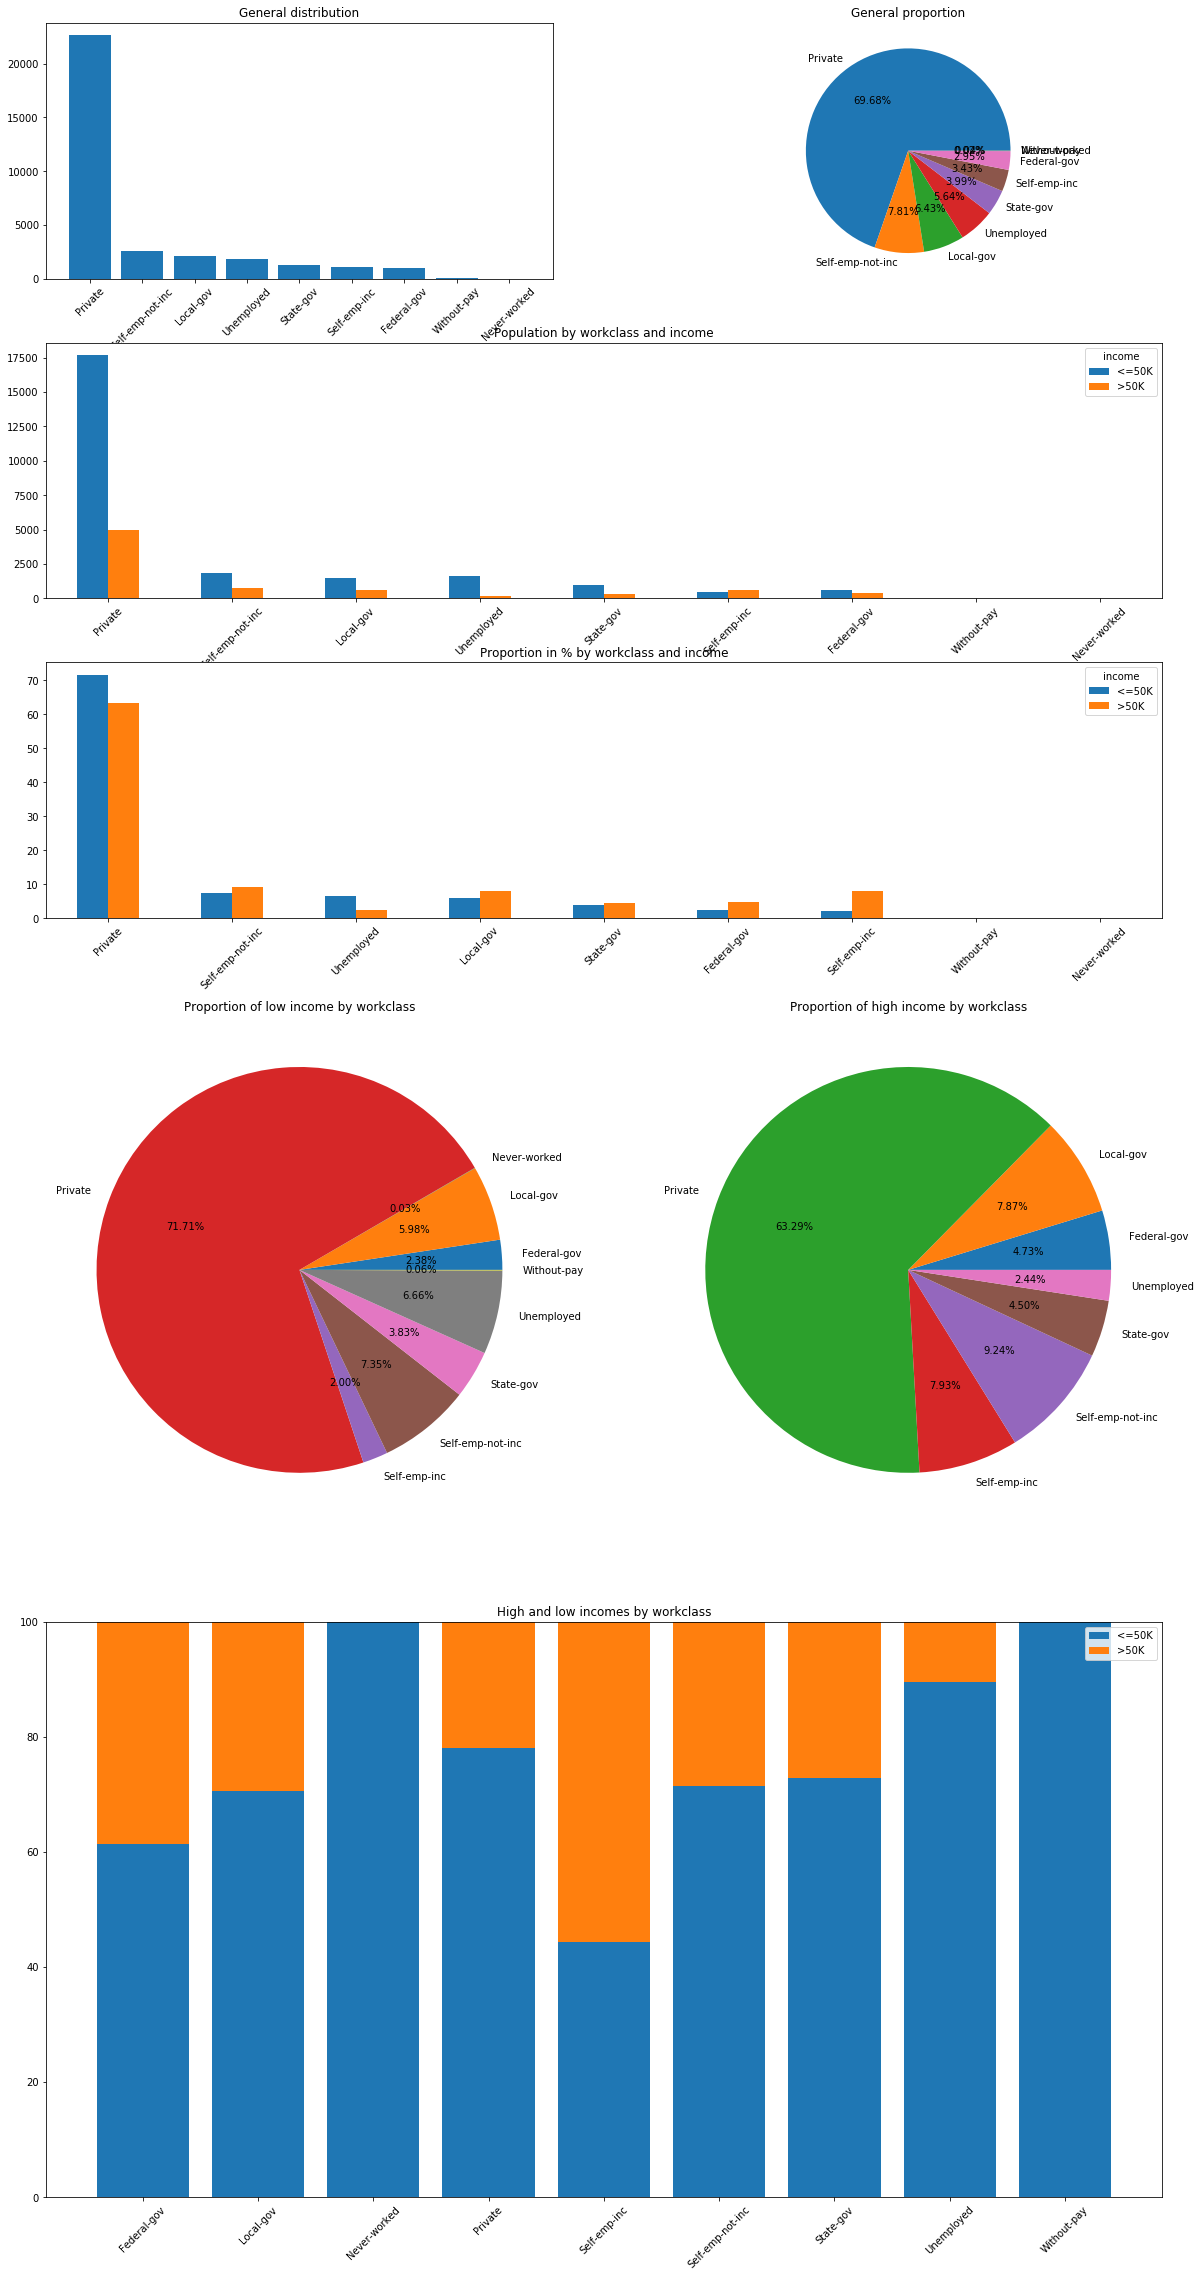

In [20]:
distri_analysis(df, "workclass")

[Go back to the top](#start)

## 0- age <a name="age"></a>
Type : int.
Example : 90.

In [21]:
df.age.describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

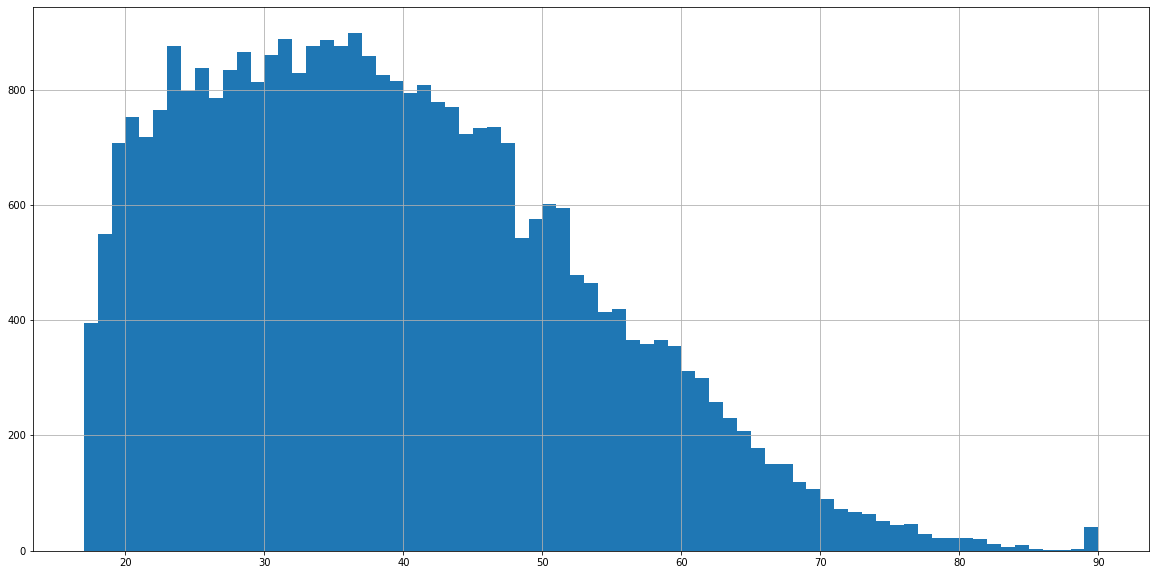

In [22]:
df.age.hist(bins = df.age.max()-df.age.min())
plt.show()

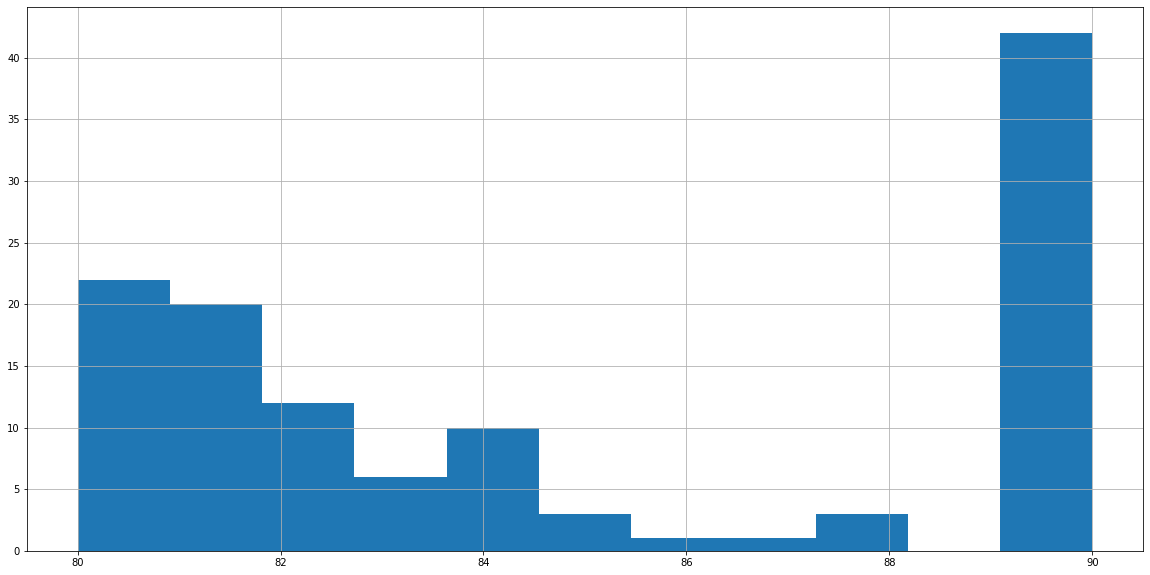

In [23]:
df[df.age>=80].age.hist(bins=11)

In [24]:
print("%i people seem top be 90 years old, while %i people are between 80 and 89 years old."%((df.age==90).sum(), df[(df.age>80) &(df.age<90)].age.count()))

42 people seem top be 90 years old, while 56 people are between 80 and 89 years old.


Too many people are the maximum age in this dataset, almost as much as people in the whole 80-89 years old range.

Certainly, it is a limitation of this census : people with more than 90 years old are referenced as 90 years old.

Très certainement, il s'agit d'un limitation dans le recensement : les personnes âgées de 90 ans ou plus sont recensées comme des personnes de 90 ans.

This fact will motivate a categorisatio of the age variable. For this purpose, let's see the local minimam of the age distribution variation to come up with relevant age ranges.

In [25]:
ages = df.groupby(df.age).age.count()

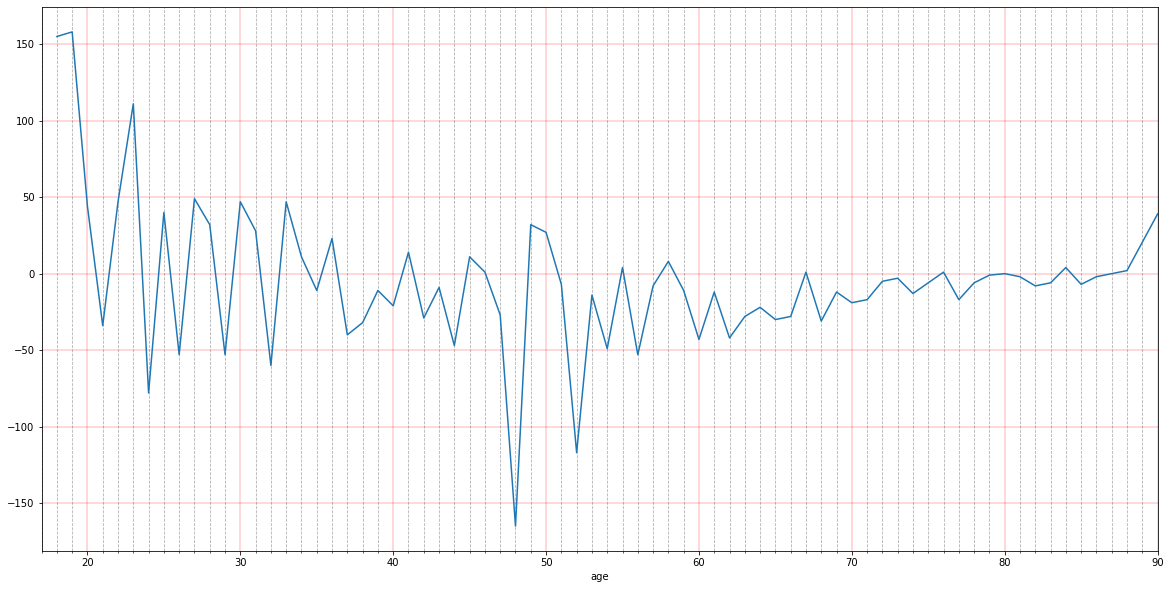

In [26]:
age_diff = (ages - ages.shift(1))
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
age_diff.plot(ax=ax)
ax.plot([0,1],[0,1], color='r')
ax.xaxis.set_ticks(np.arange(df.age.min(), df.age.max()+1),1)
ax.grid(which="major", color='r', linewidth=0.3)
ax.grid(which="minor", linestyle="--")

Thanks ot this differenciation in the age distribution, we can find relevant values that will act as pivotal values. We can sort the differences in ascending order to help the process.

In [27]:
age_diff.sort_values().head(35)

age
48   -165.0
52   -117.0
24    -78.0
32    -60.0
26    -53.0
56    -53.0
29    -53.0
54    -49.0
44    -47.0
60    -43.0
62    -42.0
37    -40.0
21    -34.0
38    -32.0
68    -31.0
65    -30.0
42    -29.0
66    -28.0
63    -28.0
47    -27.0
64    -22.0
40    -21.0
70    -19.0
71    -17.0
77    -17.0
53    -14.0
74    -13.0
61    -12.0
69    -12.0
59    -11.0
39    -11.0
35    -11.0
43     -9.0
57     -8.0
82     -8.0
Name: age, dtype: float64

I chose those pivotal values : 24, 32, 48, 60 and 82 years old.

In [28]:
age_ranges = [0,24,32,48,60,82,90]

In [29]:
df.age = pd.cut(df.age, age_ranges)

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
df

age   workclass  fnlwgt     education  education_num  \
0      (82, 90]  Unemployed   77053       HS-grad              9   
1      (60, 82]     Private  132870       HS-grad              9   
2      (60, 82]  Unemployed  186061  Some-college             10   
3      (48, 60]     Private  140359       7th-8th              4   
4      (32, 48]     Private  264663  Some-college             10   
...         ...         ...     ...           ...            ...   
32556   (0, 24]     Private  310152  Some-college             10   
32557  (24, 32]     Private  257302    Assoc-acdm             12   
32558  (32, 48]     Private  154374       HS-grad              9   
32559  (48, 60]     Private  151910       HS-grad              9   
32560   (0, 24]     Private  201490       HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0                 Widowed               None  Not-in-family  White  Female   
1                 Widowed    Exec-managerial  Not-in-family  White  Female   
2                 Widowed               None      Unmarried  Black  Female   
3                Divorced  Machine-op-inspct      Unmarried  White  Female   
4               Separated     Prof-specialty      Own-child  White  Female   
...                   ...                ...            ...    ...     ...   
32556       Never-married    Protective-serv  Not-in-family  White    Male   
32557  Married-civ-spouse       Tech-support           Wife  White  Female   
32558  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32559             Widowed       Adm-clerical      Unmarried  White  Female   
32560       Never-married       Adm-clerical      Own-child  White    Male   

       capital_gain  capital_loss  hours_per_week native_country income  
0                 0          4356              40  United-States  <=50K  
1                 0          4356              18  United-States  <=50K  
2                 0          4356              40  United-States  <=50K  
3                 0          3900              40  United-States  <=50K  
4                 0          3900              40  United-States  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              40  United-States  <=50K  
32557             0             0              38  United-States  <=50K  
32558             0             0              40  United-States   >50K  
32559             0             0              40  United-States  <=50K  
32560             0             0              20  United-States  <=50K  

[32537 rows x 15 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
age               32537 non-null category
workclass         32537 non-null object
fnlwgt            32537 non-null int64
education         32537 non-null object
education_num     32537 non-null int64
marital_status    32537 non-null object
occupation        32537 non-null object
relationship      32537 non-null object
race              32537 non-null object
sex               32537 non-null object
capital_gain      32537 non-null int64
capital_loss      32537 non-null int64
hours_per_week    32537 non-null int64
native_country    31955 non-null object
income            32537 non-null object
dtypes: category(1), int64(5), object(9)
memory usage: 3.8+ MB


In [32]:
by_age = df.groupby("age").age.count()
by_age

age
(0, 24]      5562
(24, 32]     6712
(32, 48]    12627
(48, 60]     5305
(60, 82]     2265
(82, 90]       66
Name: age, dtype: int64

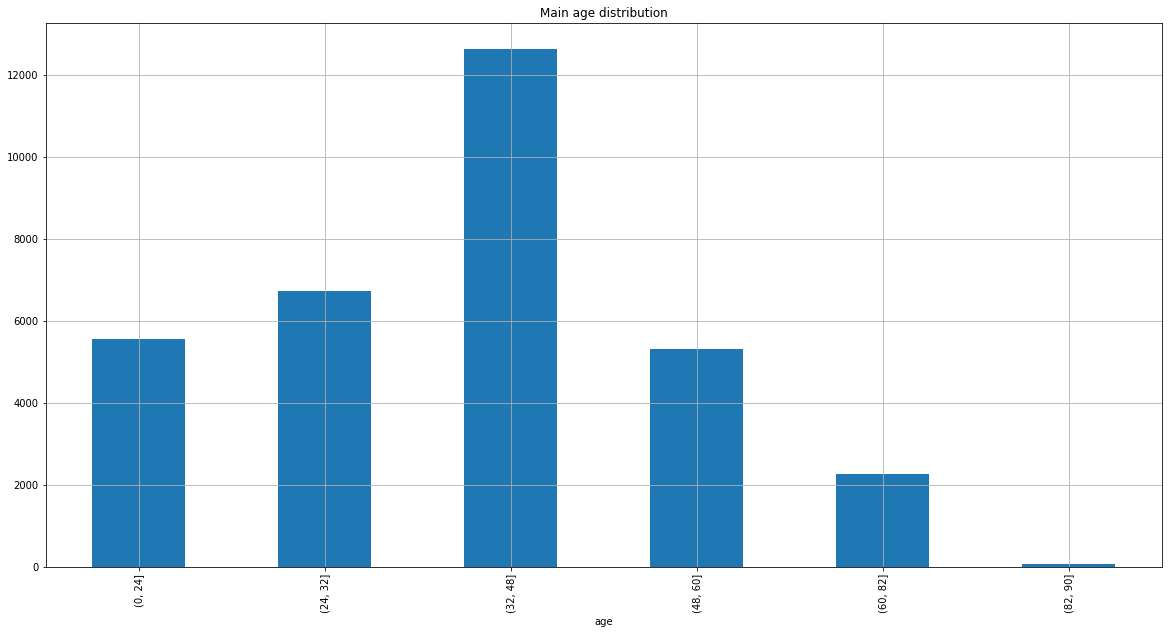

In [33]:
df.groupby("age").age.count().plot(kind="bar")
plt.title("Main age distribution")
plt.grid()

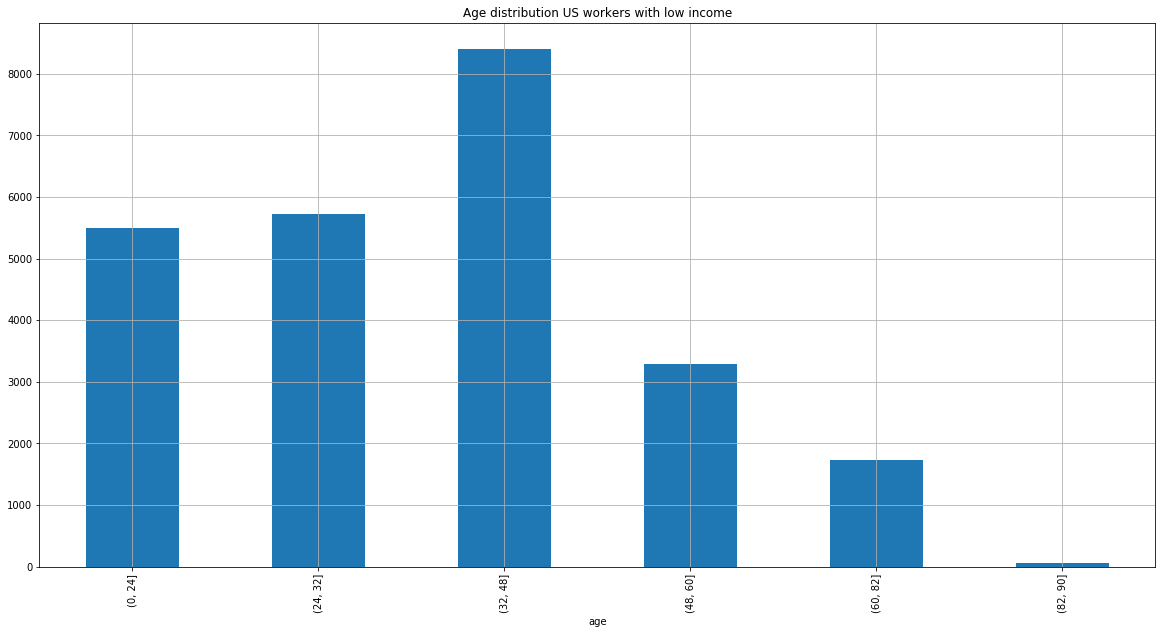

In [34]:
df[inf].groupby("age").age.count().plot(kind="bar")
plt.title("Age distribution US workers with low income")
plt.grid()

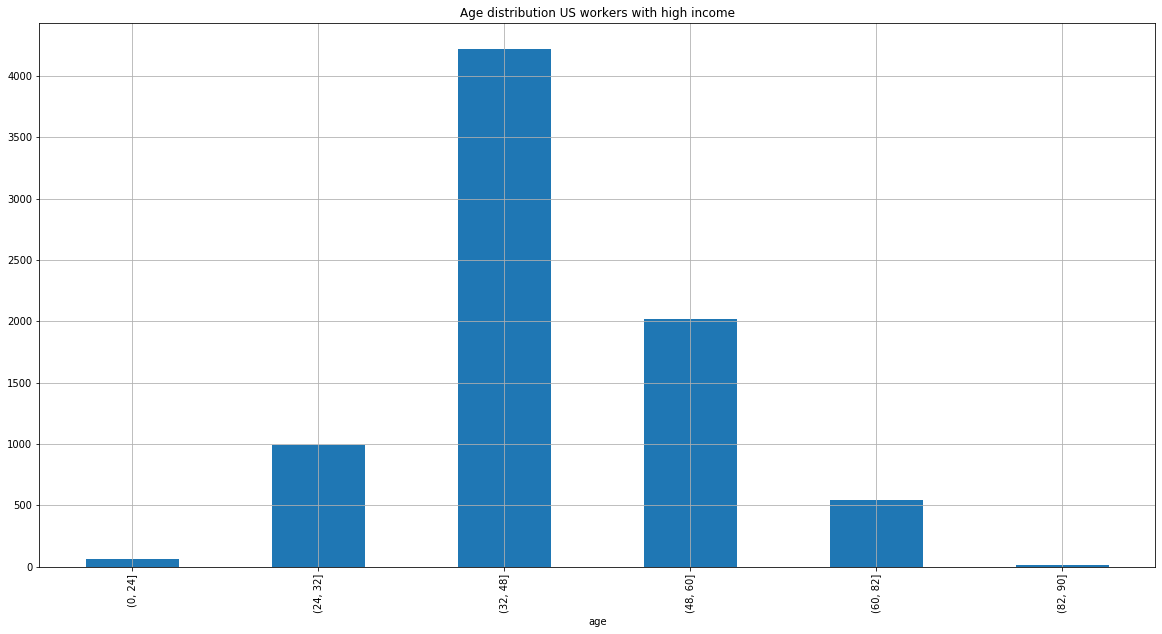

In [35]:
df[inf==False].groupby("age").age.count().plot(kind="bar")
plt.title("Age distribution US workers with high income")
plt.grid()

[Go back to the top](#start)

## 1- workclass <a name="workclass"></a>
Type : string.
Example : Private.

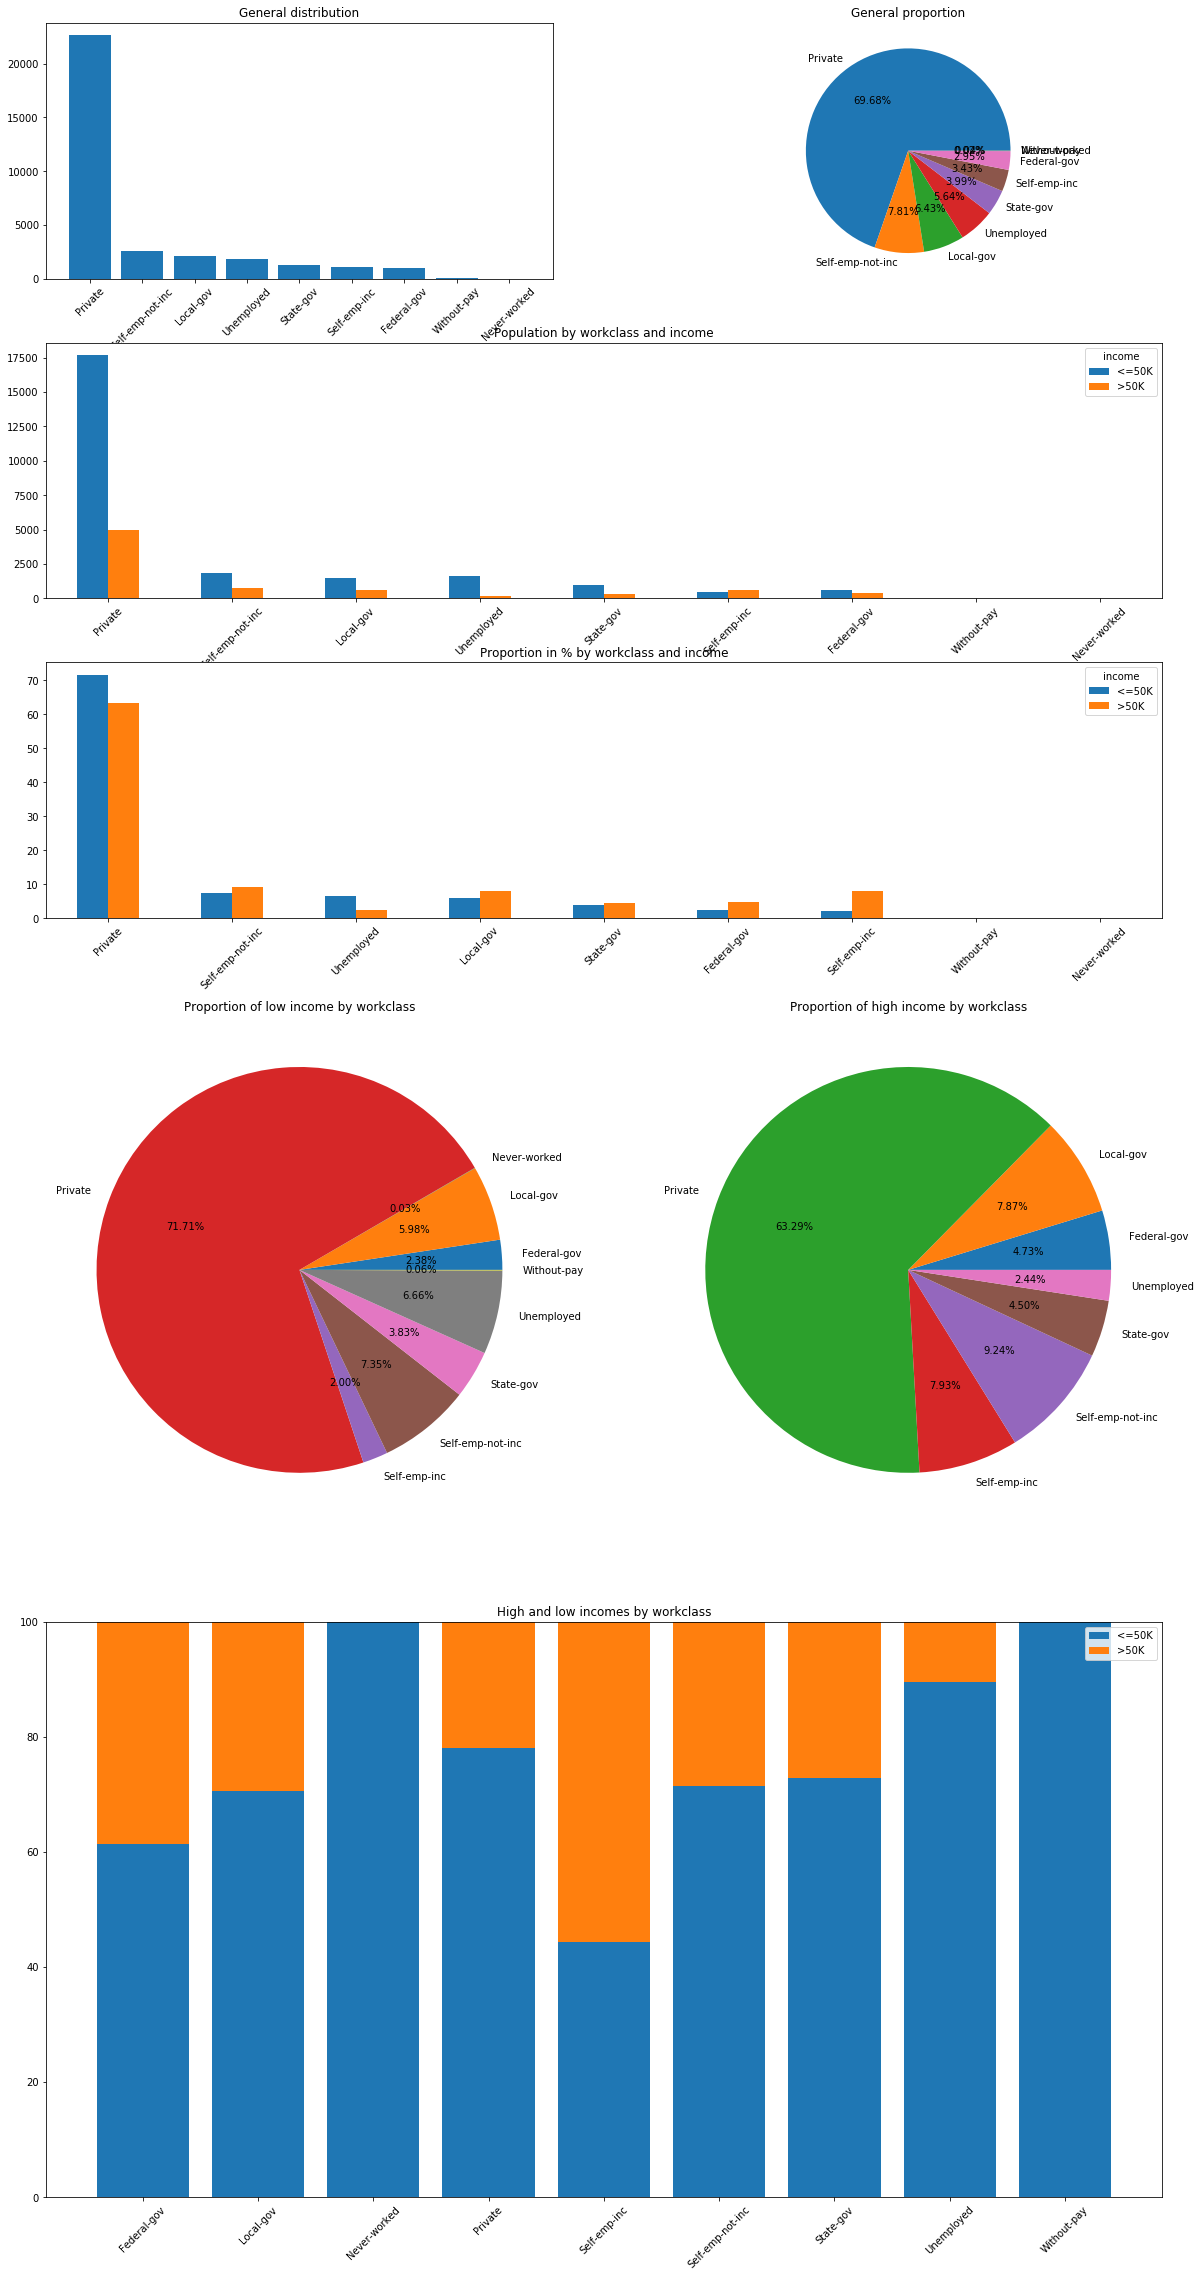

In [36]:
distri_analysis(df, "workclass")

As we can see, most workers are in the private sector.

A significant part (5.64%) doesn't specifically inform this caracteristic, with an interrogation mark '?'.

[Go back to the top](#start)

## 2- fnlwgt <a name="fnlwgt"></a>
Type : int. Example : 77053.

In [37]:
df.fnlwgt.describe()

count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

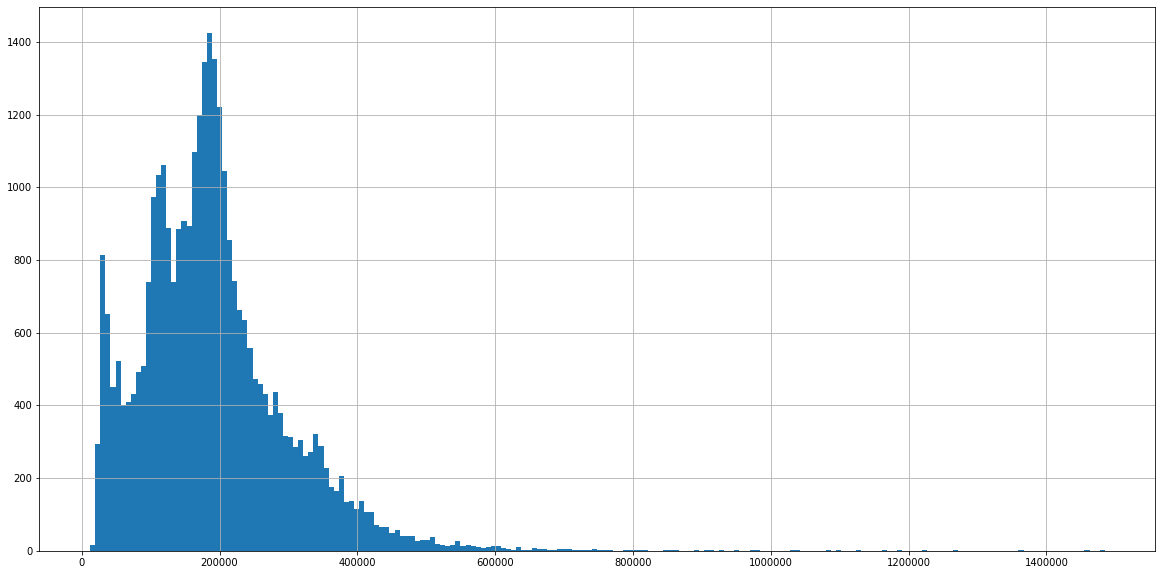

In [38]:
df.fnlwgt.hist(bins=200)

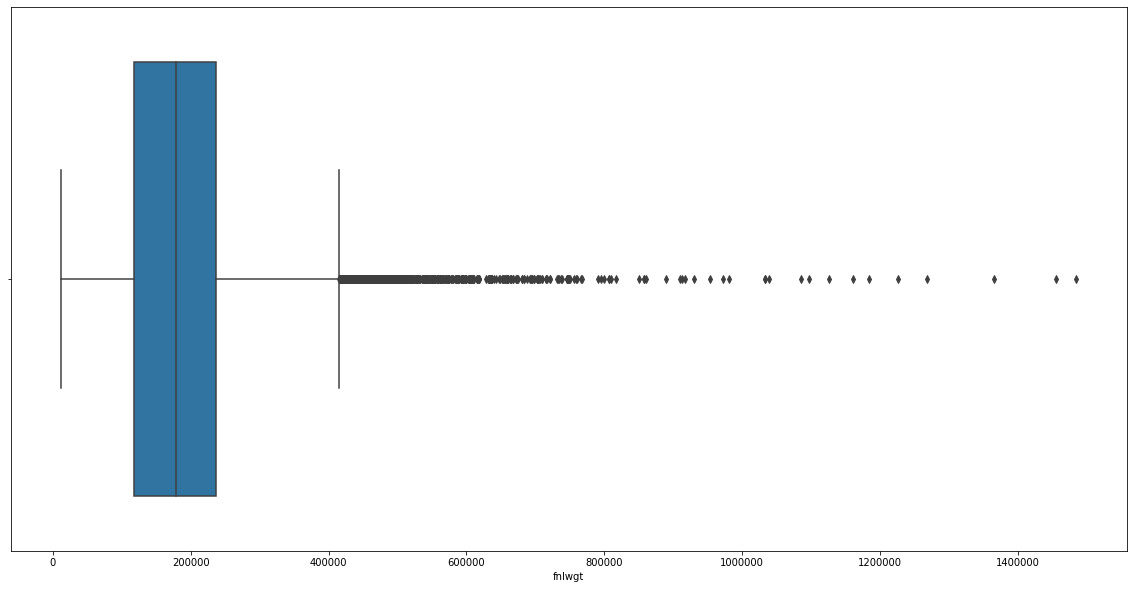

In [39]:
sns.boxplot(df.fnlwgt)

This variable represents how many people are similar to the individual, with regards to the dataset variables.

In [40]:
df.fnlwgt.sum()

6174899468

After summing all the values, we can see that it exceeds by far the total population of the USA.

This can be explained by two fact : 
    1- several observed individuals can have the same characteristics and therefore represent the same group of people.
    2- each observation represents a census of a given period of time.

This cancels the need of transforming the figures of the dataset by ponderation. It also potentially informs that this data doesn't add relevant information to the incoming prediction.

[Go back to the top](#start)

## 3- education <a name="education"></a>
Type : string.
Example : HS-grad

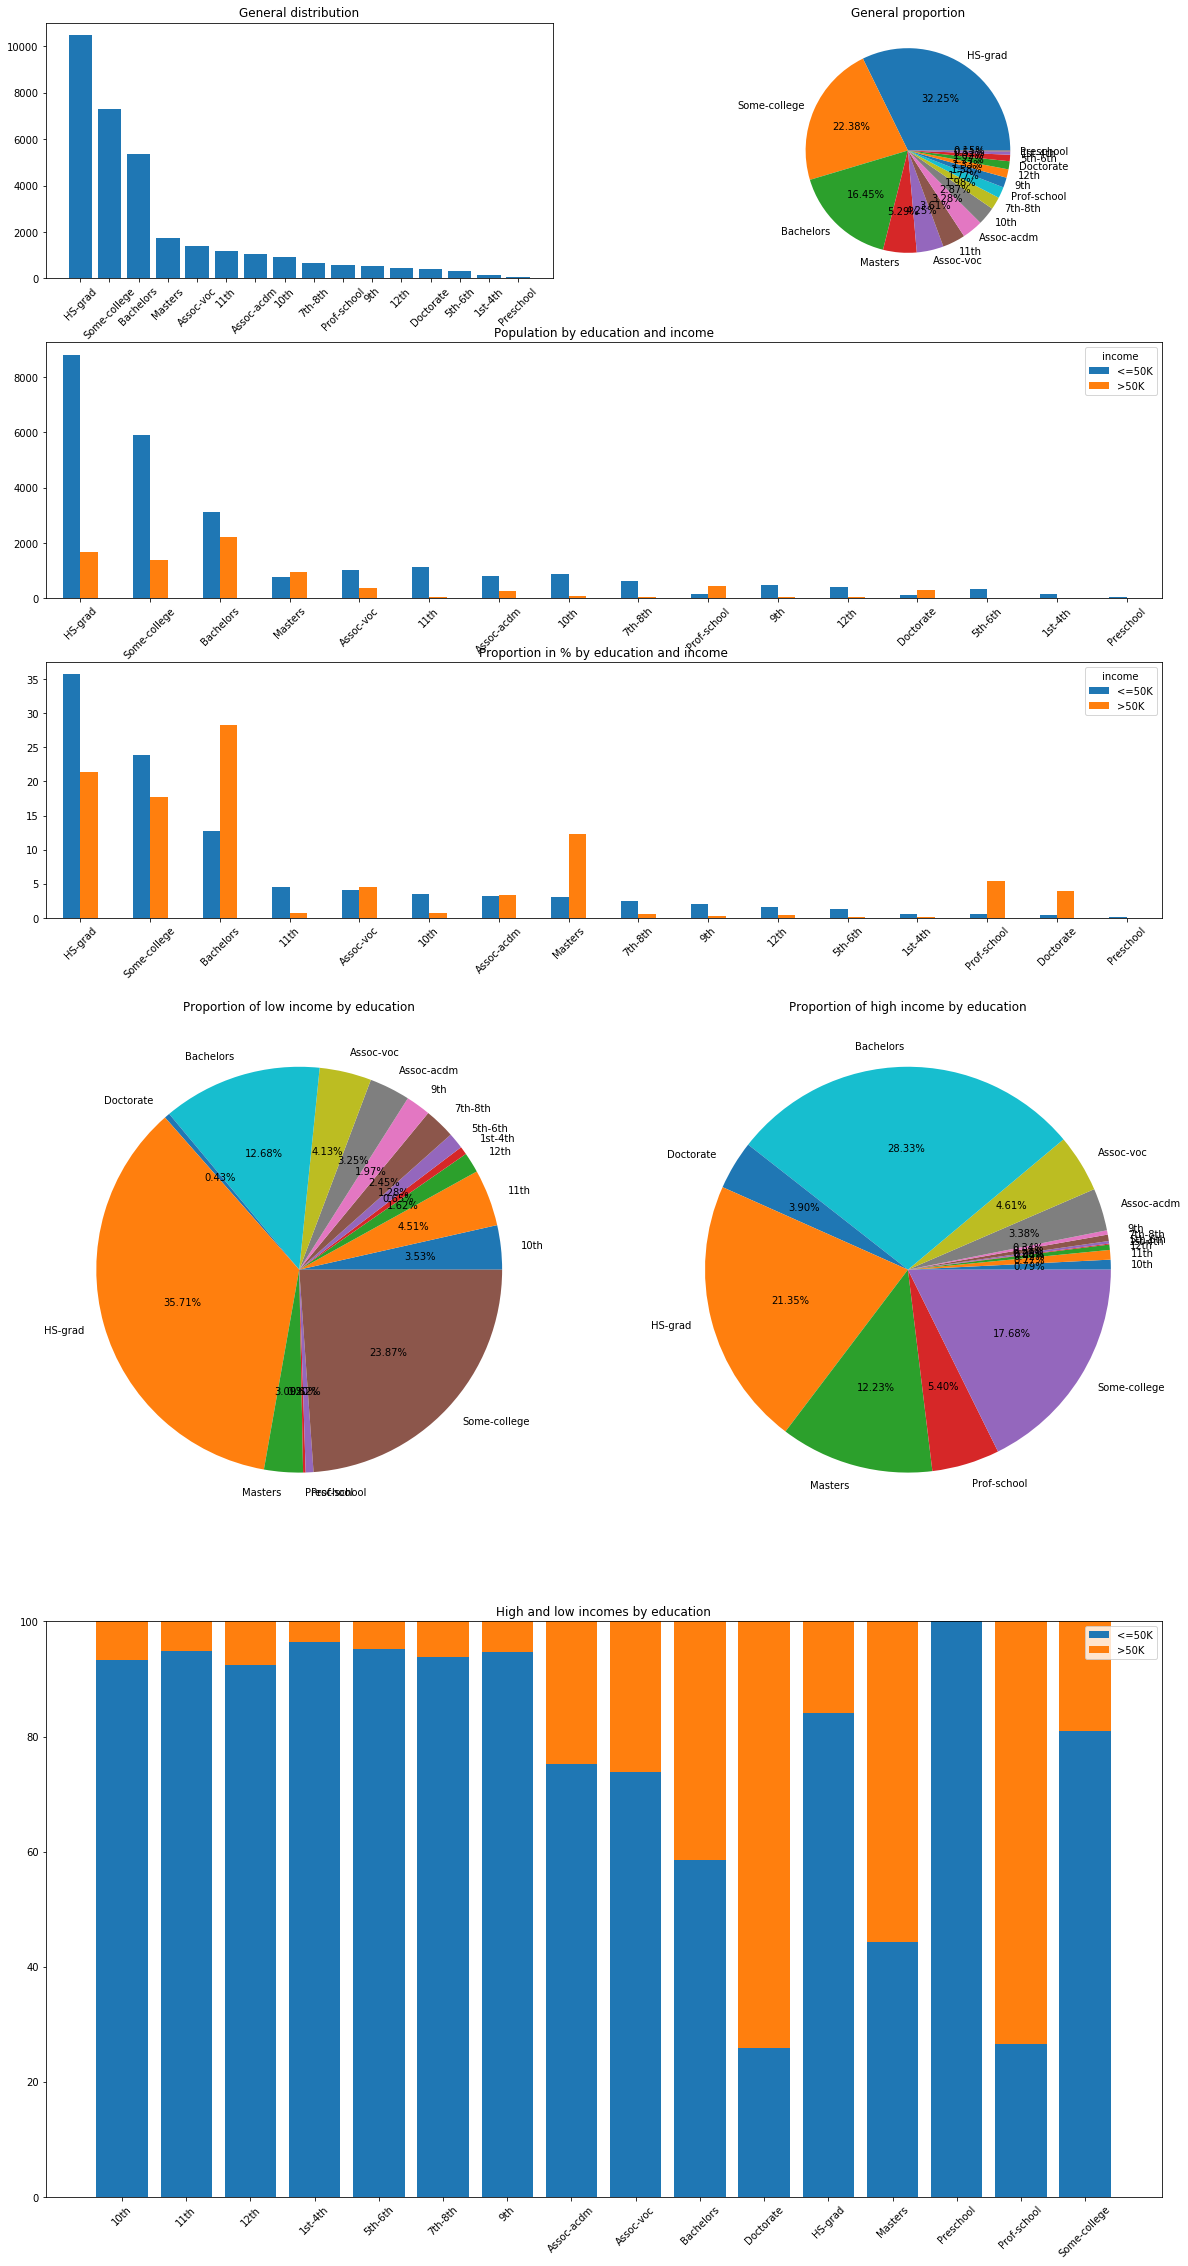

In [41]:
distri_analysis(df, "education")

Doctorate are prof_school are the most prevalent in the hgih income, followed by Masters.

[Go back to the top](#start)

## 4- education_num <a name="education_num"></a>
Type: int.
Example : 9.

It seems that each value of the previous variale gets an index in the current one. Let's check that out.

In [42]:
maximum_uniques = 0
for un in df.education.unique():
    values = df[df.education==un].education_num.unique()
    maximum_uniques = max(maximum_uniques, len(values))
    print("Education \"%s\" shows nums : [%s] (%d specific)"
         %(un, "".join(str(values)), len(values)))
print("\nThe max number of unique num per education is %d"%maximum_uniques)

Education "HS-grad" shows nums : [[9]] (1 specific)
Education "Some-college" shows nums : [[10]] (1 specific)
Education "7th-8th" shows nums : [[4]] (1 specific)
Education "10th" shows nums : [[6]] (1 specific)
Education "Doctorate" shows nums : [[16]] (1 specific)
Education "Prof-school" shows nums : [[15]] (1 specific)
Education "Bachelors" shows nums : [[13]] (1 specific)
Education "Masters" shows nums : [[14]] (1 specific)
Education "11th" shows nums : [[7]] (1 specific)
Education "Assoc-acdm" shows nums : [[12]] (1 specific)
Education "Assoc-voc" shows nums : [[11]] (1 specific)
Education "1st-4th" shows nums : [[2]] (1 specific)
Education "5th-6th" shows nums : [[3]] (1 specific)
Education "12th" shows nums : [[8]] (1 specific)
Education "9th" shows nums : [[5]] (1 specific)
Education "Preschool" shows nums : [[1]] (1 specific)

The max number of unique num per education is 1


This variable is therefore useless because it doesn't add any relevant information than the previous one. On the contrary, it could add an idea of value or order of modularities which don't have any, or at least not in the present order.

In [43]:
df.drop(columns="education_num", inplace=True)

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Go back to the top](#start)

## 5- marital_status <a name="marital_status"></a>
Type : String.
Example: "Widowed"

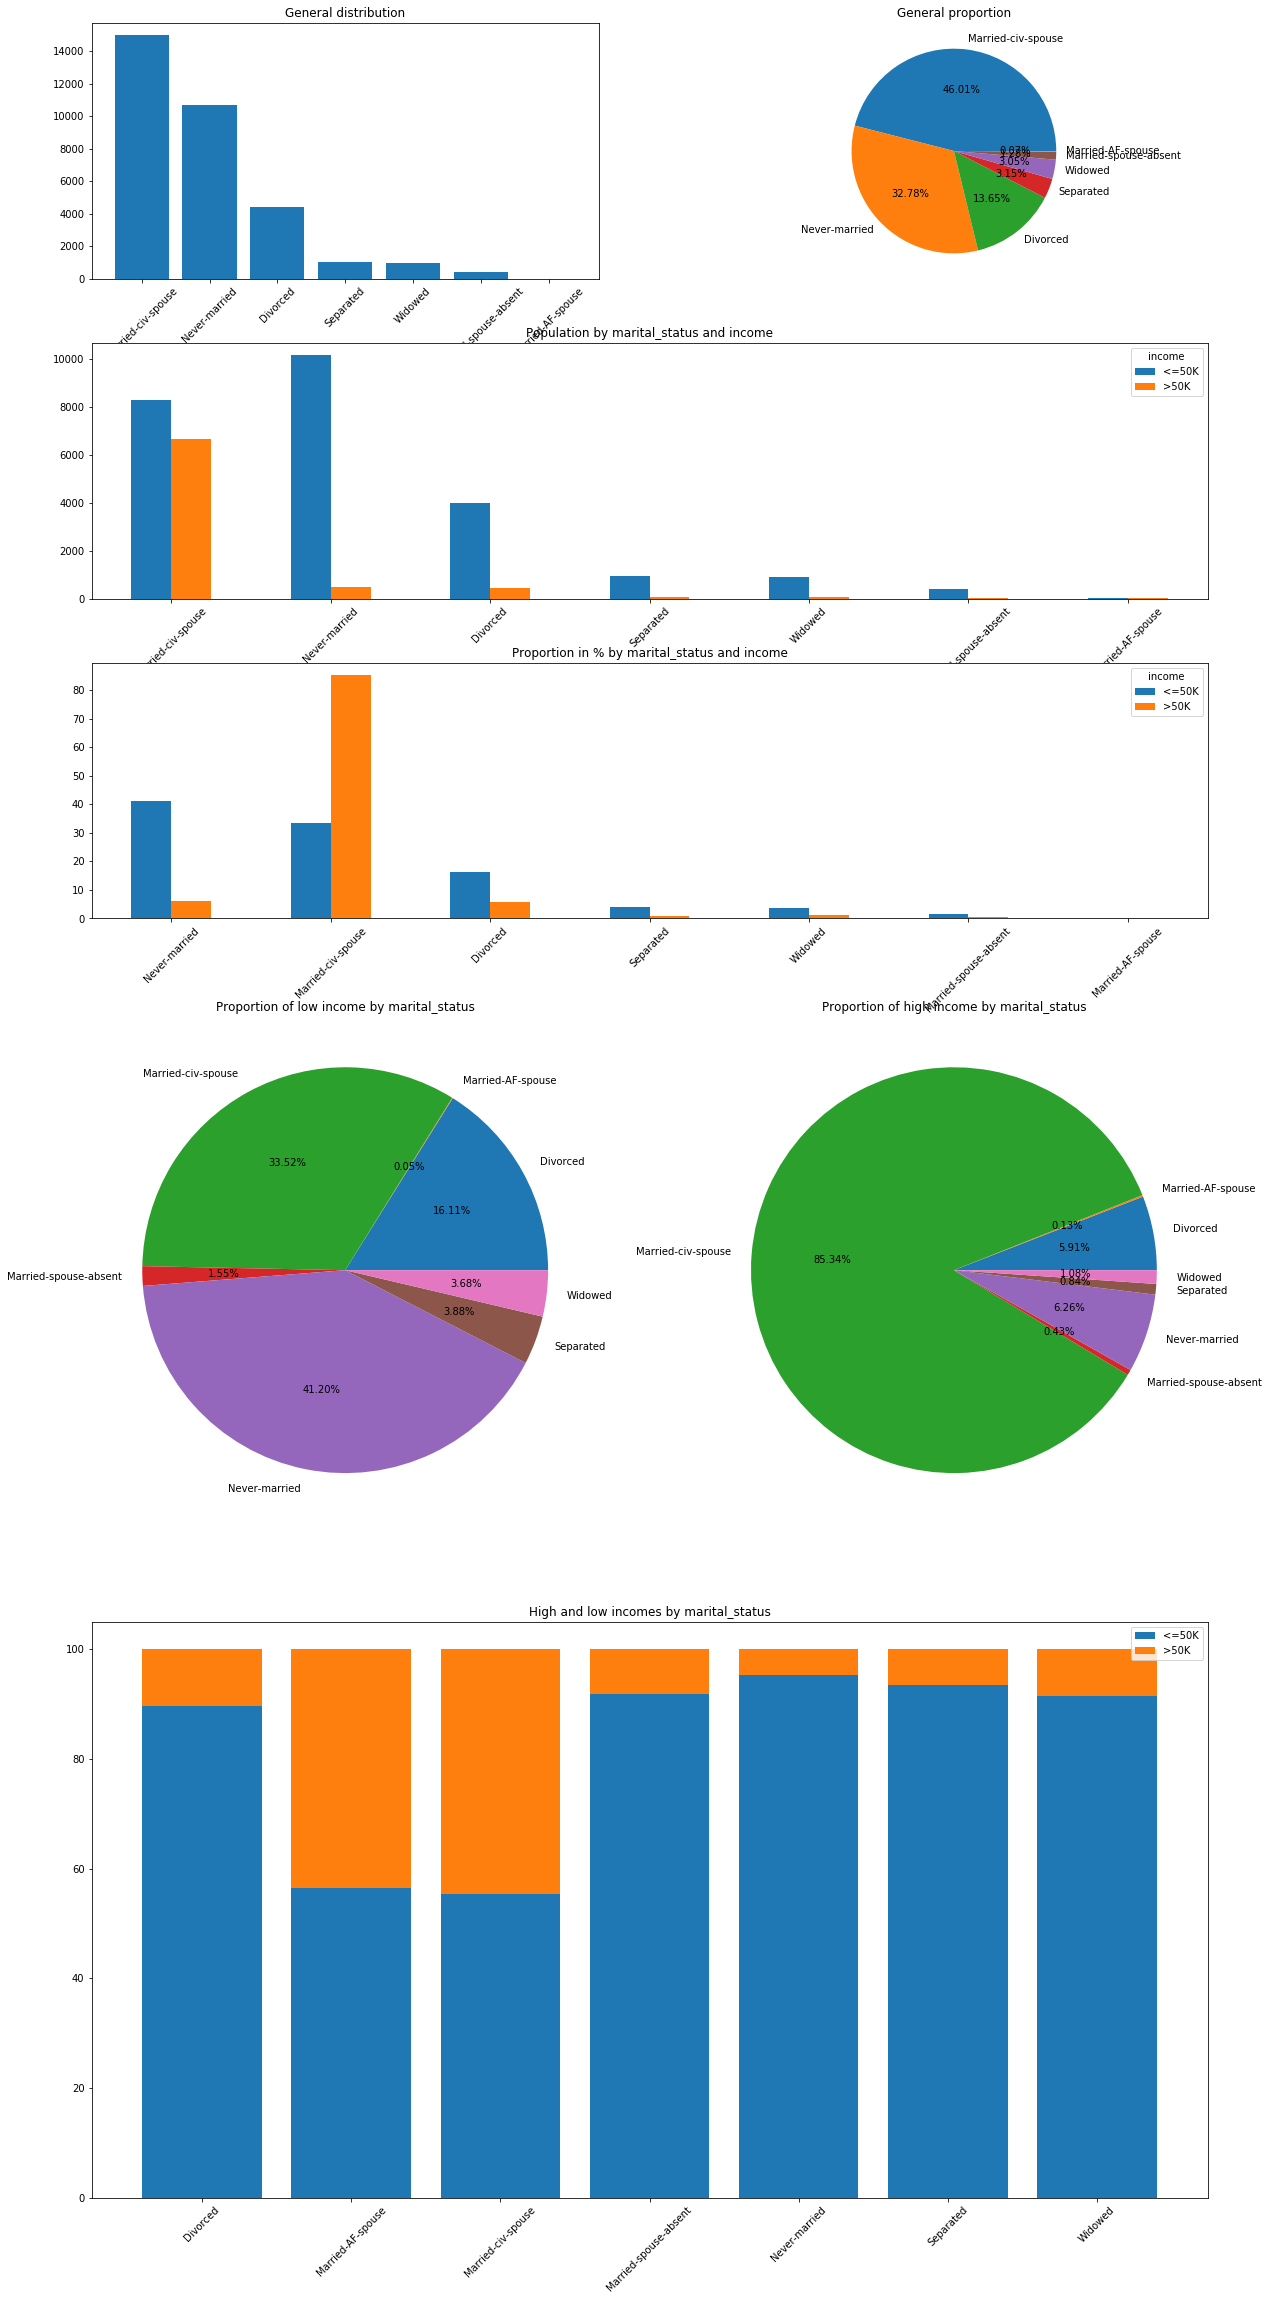

In [44]:
distri_analysis(df, "marital_status")

This variable is quite self-explanatory.

We can see that a larger part of high income people are married and that every other status is less present in term of proportion.

[Go back to the top](#start)

## 6- occupation <a name="occupation"></a>
Type : string.
Example : Exec-managerial

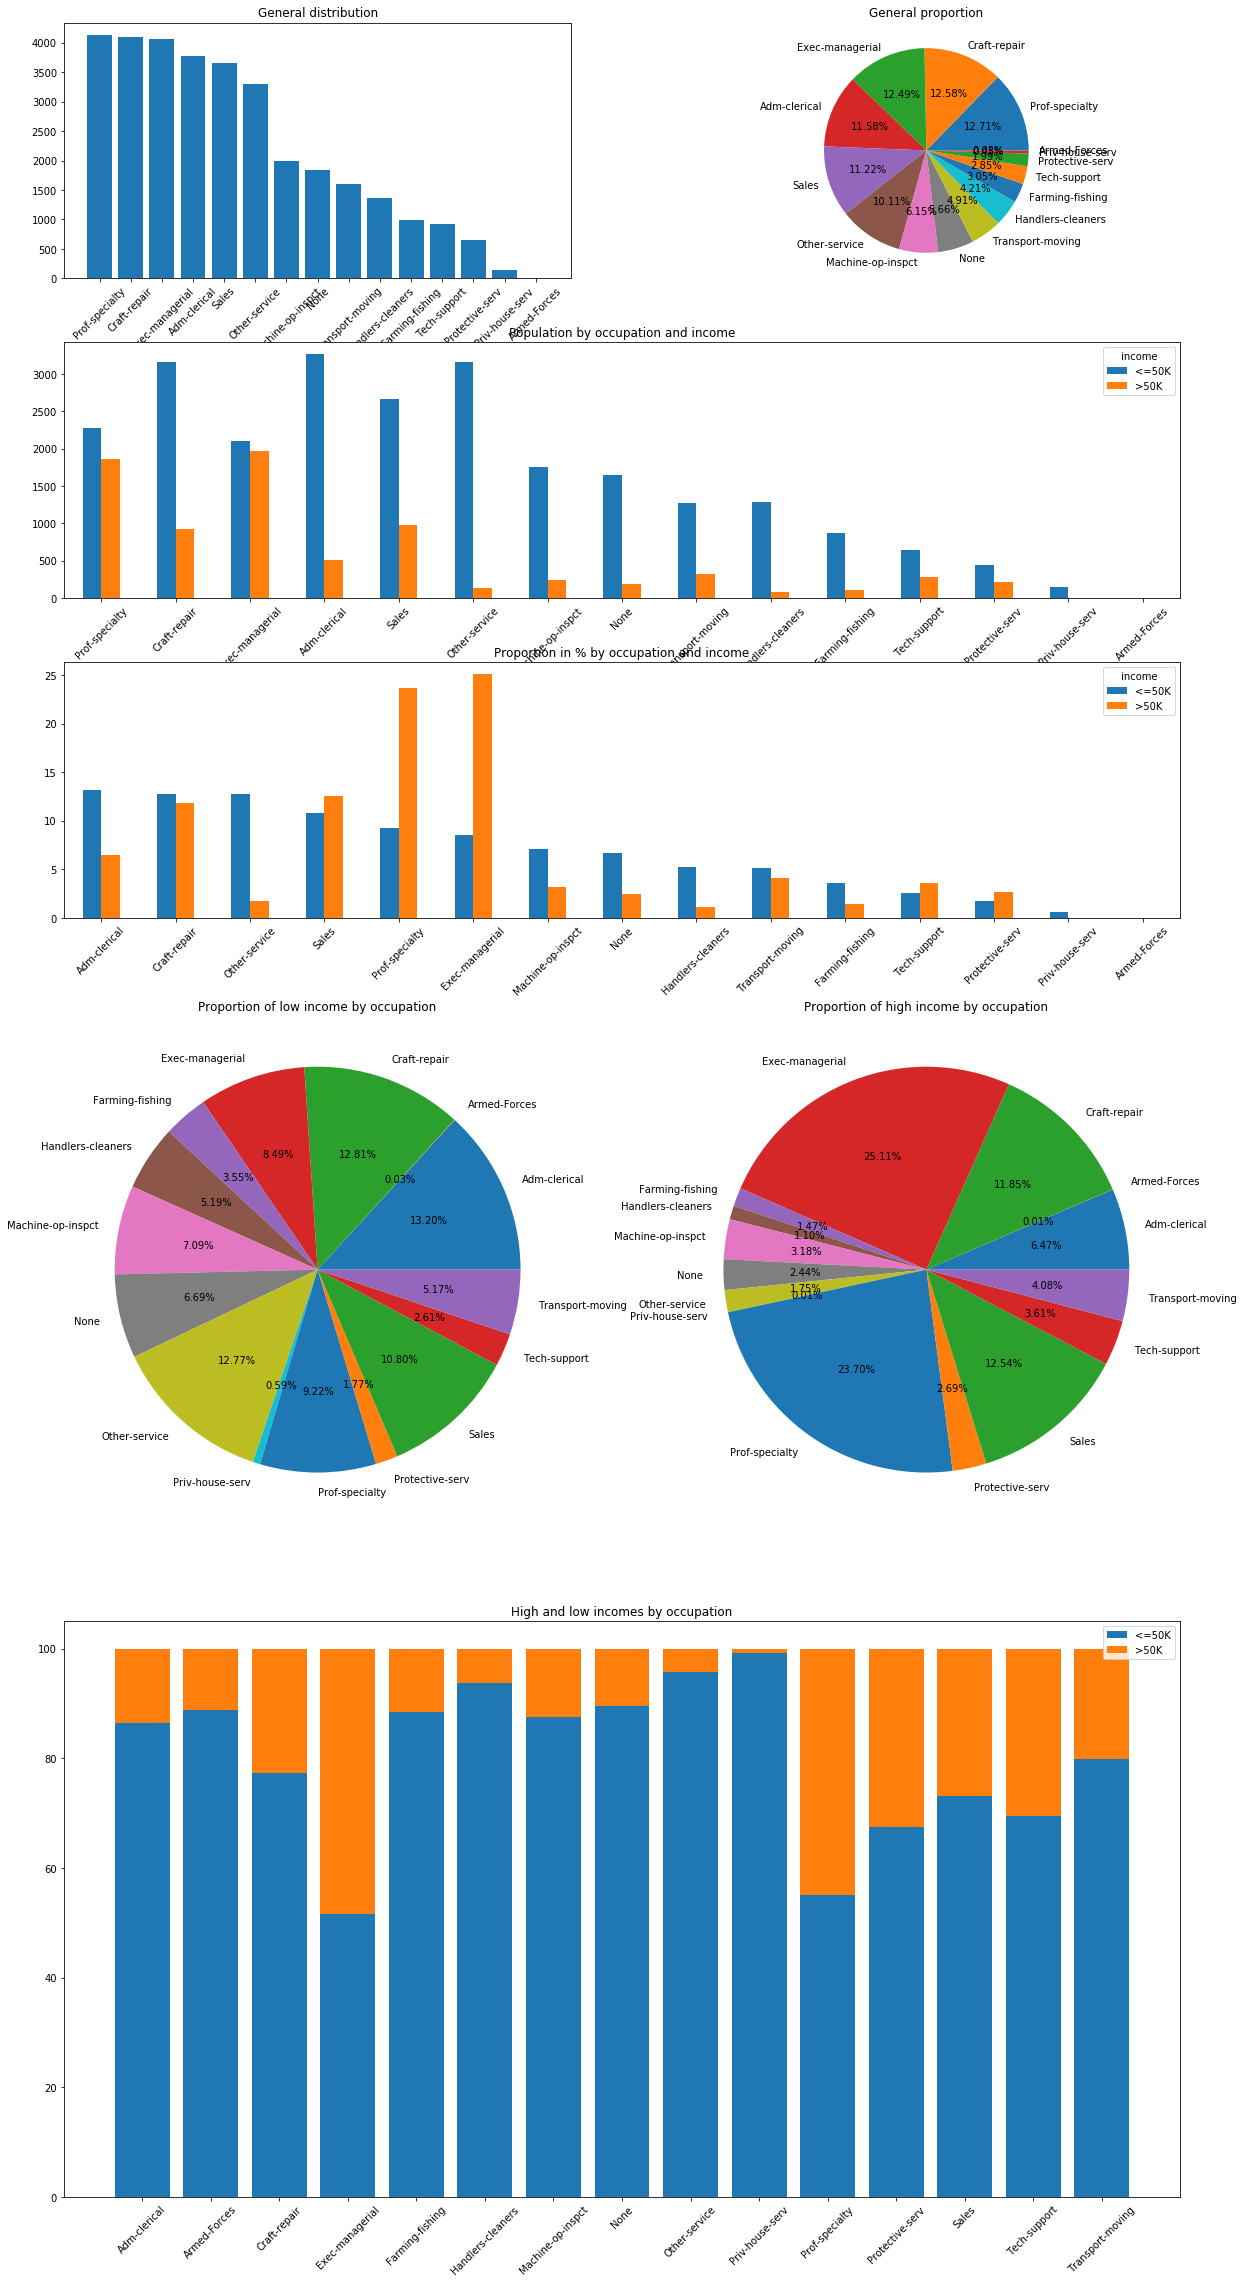

In [45]:
distri_analysis(df, "occupation")

This variable shows an almost homogenuous repartition of low income population throughout most work classes. When it comes to high income workers though, Exec-managerial and prof-speciality are highly advantaged.

Also, about 5.5% of the population show no information about their work class.

[Go back to the top](#start)

## 7- relationship <a name="relationship"></a>
Type : string.
Example : Not-in-family

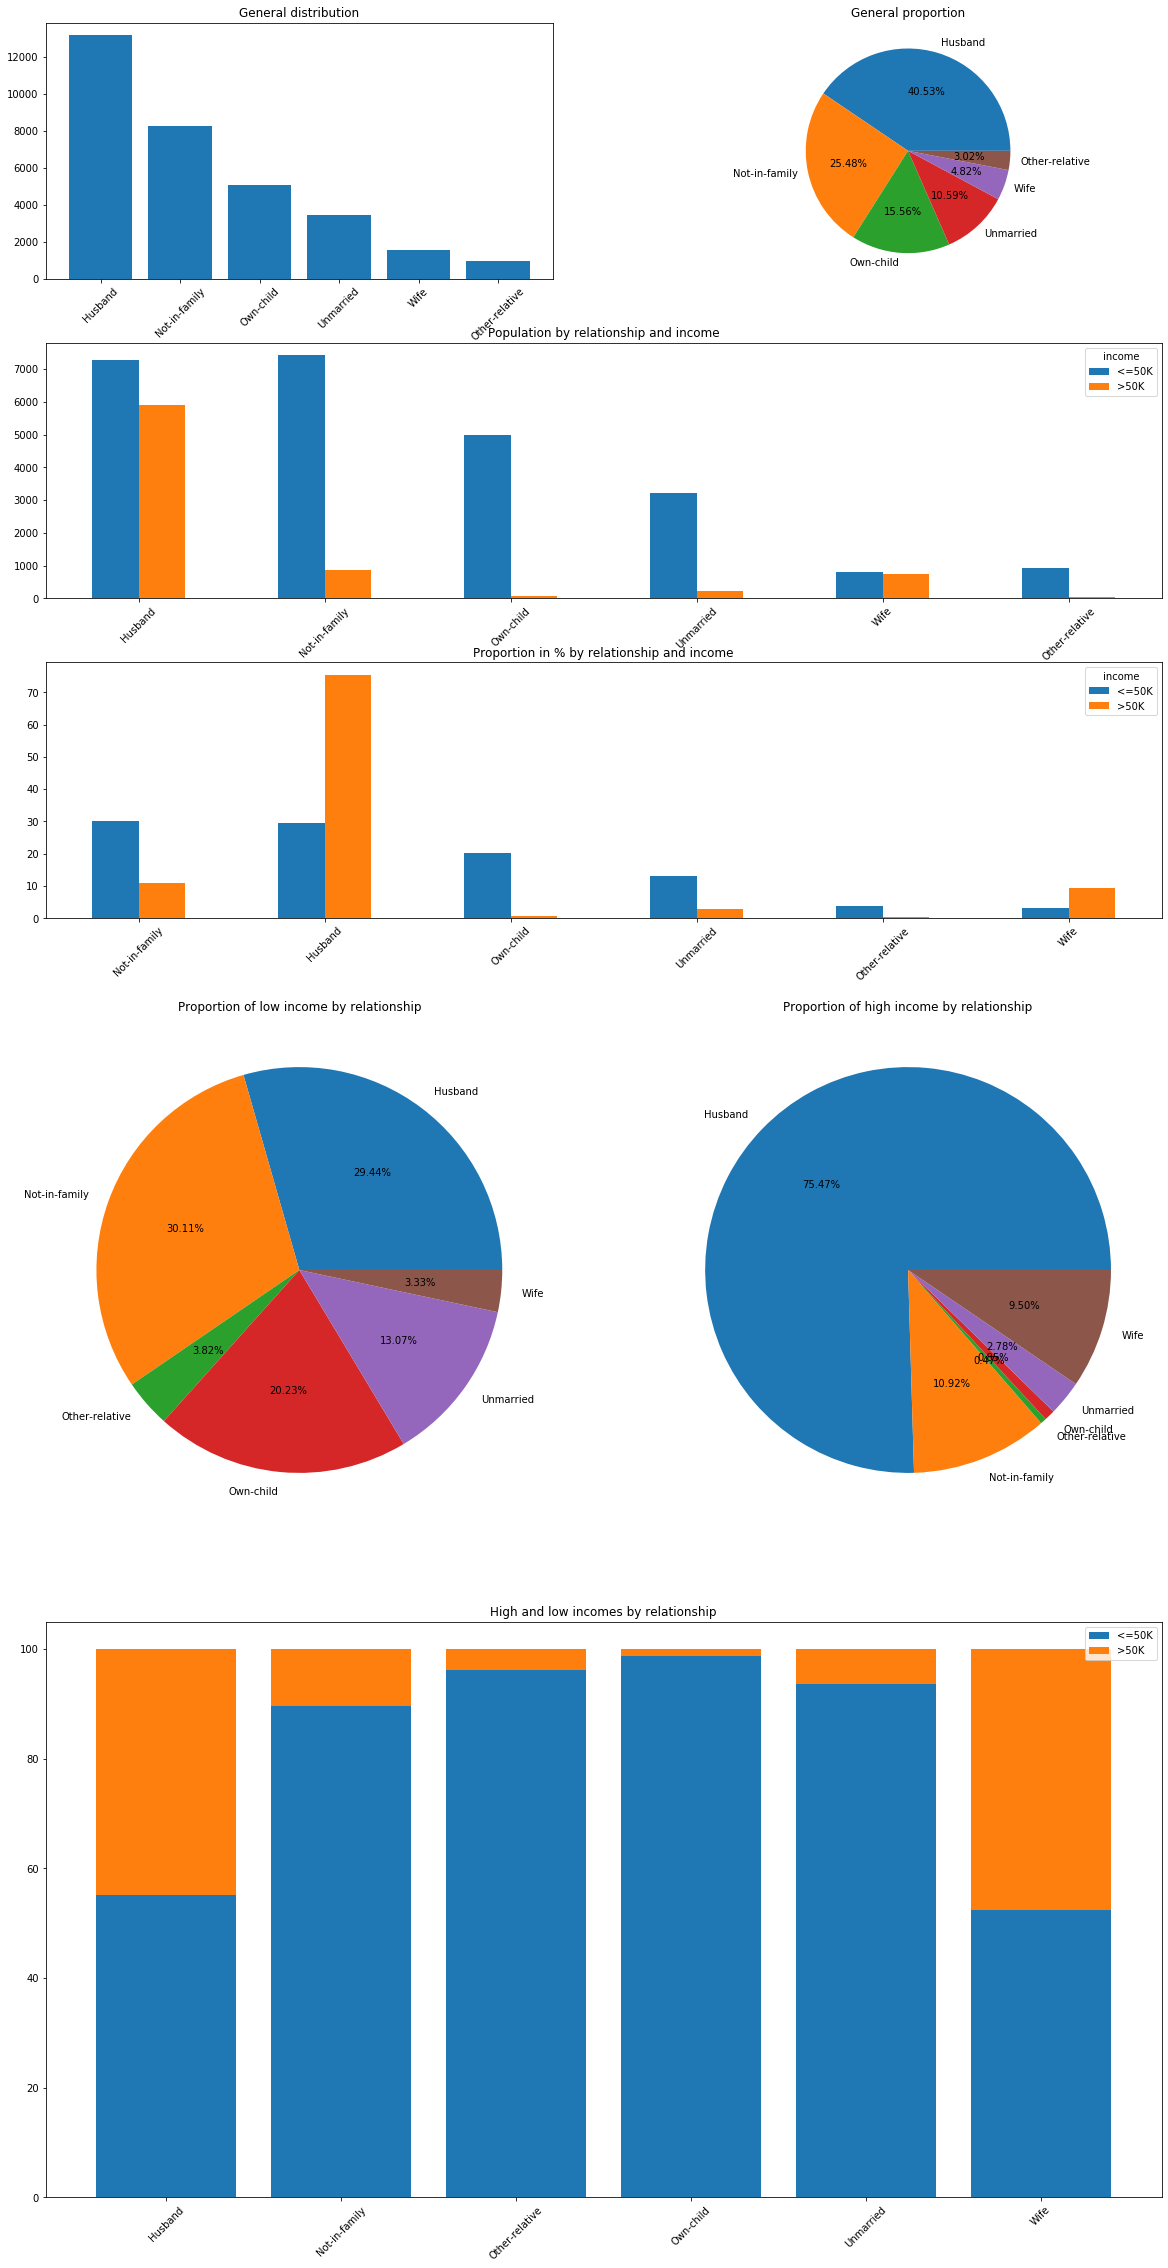

In [46]:
distri_analysis(df, "relationship")

This variable owns information about people genders, given that it discriminates husbands and wifes. We'll get to that in a following section of this analysis.

The most evident knowledge we can get from this variable is that married people are by far the most advantaged in terms of income.

[Go back to the top](#start)

### 8- race** <a name="race"></a>
Type : string.
Example : White

** which I will refer to as ethnicity.

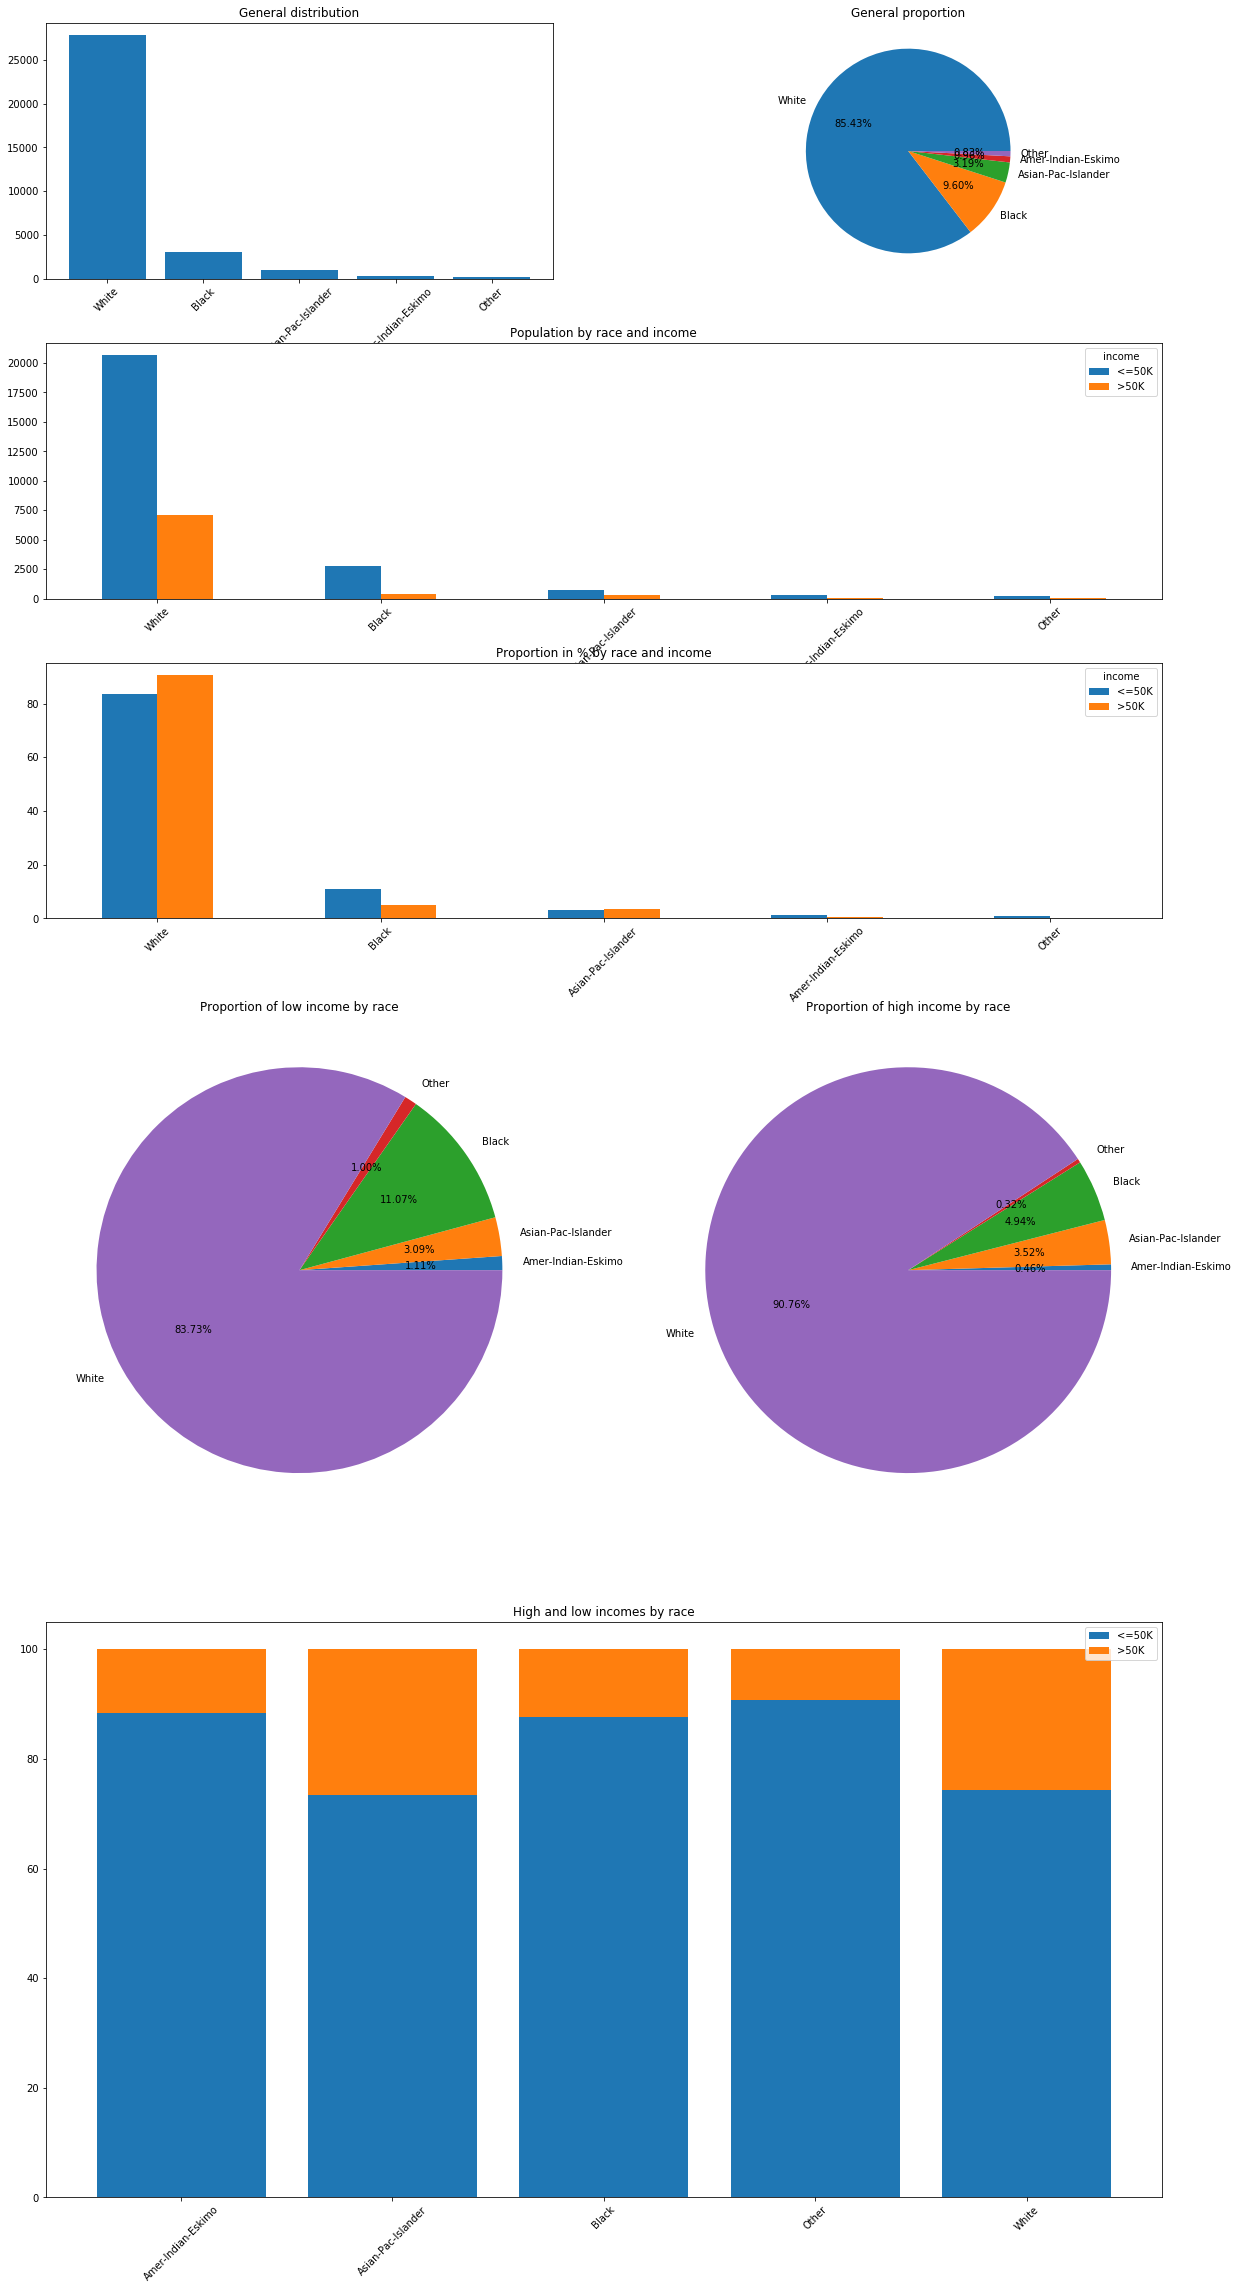

In [47]:
distri_analysis(df, "race")

The most represented ethnicity is caucasian.

All other ethnicities except Asian-Pacific-Islander show a lower proportion of high income.

[Go back to the top](#start)

## 9- sex <a name="sex"></a>
Type : string.
Example : Female.

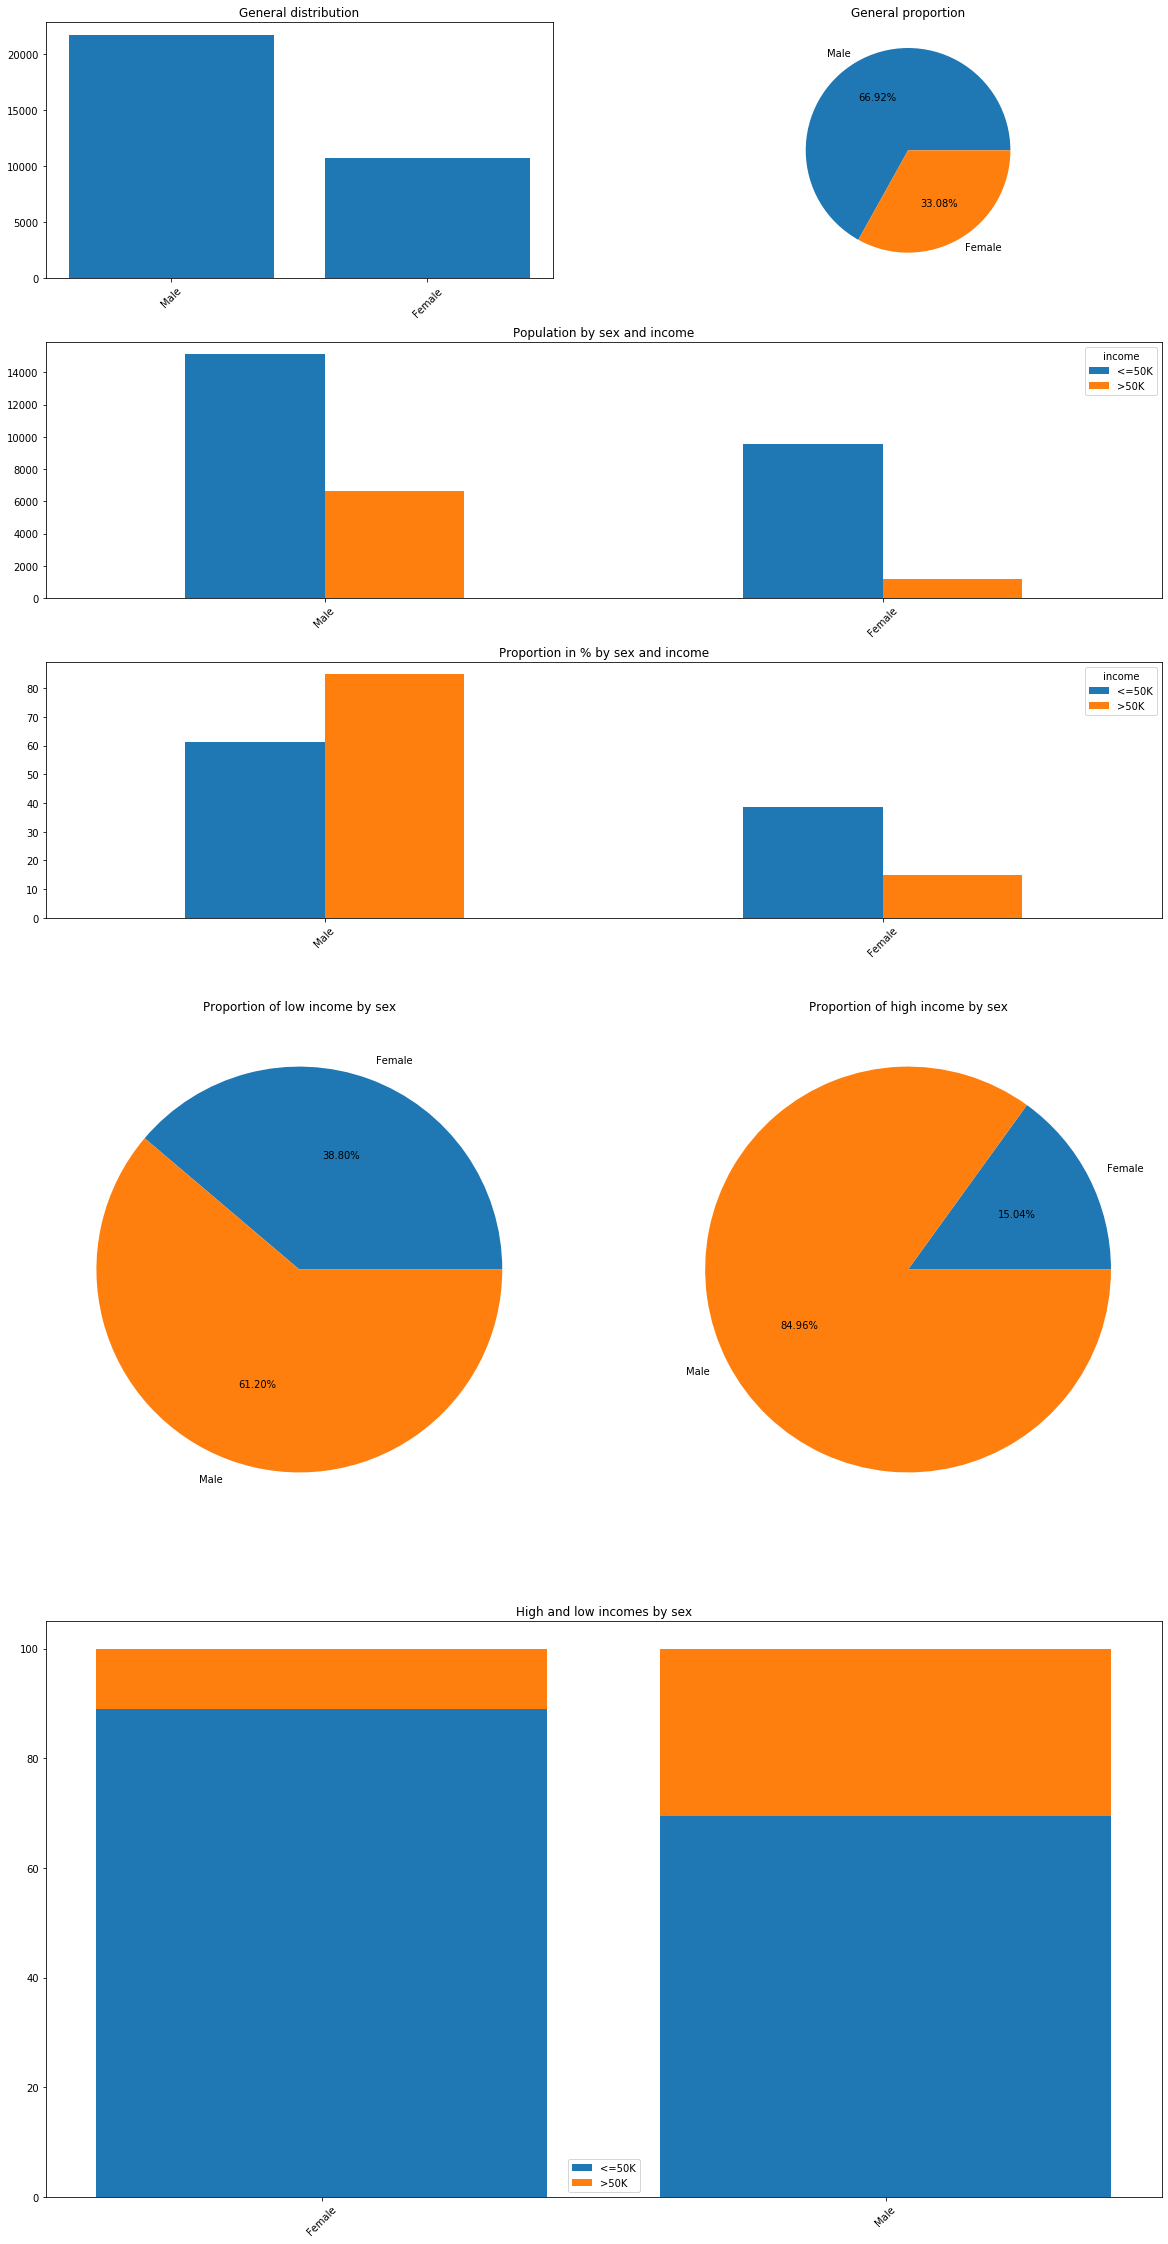

In [48]:
distri_analysis(df, "sex")

There are 61.2% of men while there is a greater proportion of husband than wives. Let's check if all husbands are men and wives are women.

In [49]:
sorted(df[df.sex=="Male"].relationship.unique())

['Husband',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife']

In [50]:
sorted(df[df.sex=="Female"].relationship.unique())

['Husband',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife']

It's not the case. Something fishy is going on here. Let's keep on the investigation.

In [51]:
gender_relationship = df.groupby(["sex","relationship"])

In [52]:
gender_relationship.age.count()

sex     relationship  
Female  Husband               1
        Not-in-family      3869
        Other-relative      430
        Own-child          2243
        Unmarried          2653
        Wife               1566
Male    Husband           13186
        Not-in-family      4423
        Other-relative      551
        Own-child          2821
        Unmarried           792
        Wife                  2
Name: age, dtype: int64

There is a female husband and twi male wives. Let's check how much people they are supposed to represent thanks to the 'fnlwgt' variable.''

In [53]:
gender_relationship.fnlwgt.sum()

sex     relationship  
Female  Husband               175878
        Not-in-family      710152071
        Other-relative      82834996
        Own-child          417004382
        Unmarried          503766360
        Wife               284715075
Male    Husband           2467212441
        Not-in-family      874333985
        Other-relative     118328689
        Own-child          561222128
        Unmarried          154728510
        Wife                  424953
Name: fnlwgt, dtype: int64

Male wifes and famale husbands are much less represented than any other combinations of gendered relationhip. It most certainly is a mistake.

In [54]:
display(gender_relationship.agg(["min","max","mean"]))
display(gender_relationship.agg(lambda x:x.value_counts().index[0]))

fnlwgt                         capital_gain         \
                          min      max           mean          min    max   
sex    relationship                                                         
Female Husband         175878   175878  175878.000000            0      0   
       Not-in-family    12285  1366120  183549.255880            0  99999   
       Other-relative   20057   595000  192639.525581            0  15831   
       Own-child        19752   860348  185913.679001            0  99999   
       Unmarried        19410  1484705  189885.548436            0  99999   
       Wife             19395   953588  181810.392720            0  99999   
Male   Husband          13769  1226583  187108.481799            0  99999   
       Not-in-family    18827  1455435  197678.947547            0  99999   
       Other-relative   23780   709445  214752.611615            0  41310   
       Own-child        20308  1268339  198944.391351            0  99999   
       Unmarried        21095   981628  195364.280303            0  99999   
       Wife             74791   350162  212476.500000            0      0   

                                   capital_loss                    \
                              mean          min   max        mean   
sex    relationship                                                 
Female Husband            0.000000            0     0    0.000000   
       Not-in-family    563.154045            0  4356   64.719566   
       Other-relative   209.097674            0  3683   64.476744   
       Own-child        155.002229            0  3900   42.820776   
       Unmarried        340.509612            0  4356   37.635130   
       Wife            1661.911239            0  2457  118.157088   
Male   Husband         1796.015168            0  2603  124.226831   
       Not-in-family    903.117793            0  2824   84.946869   
       Other-relative   334.611615            0  2444   41.074410   
       Own-child        156.395604            0  2339   36.936902   
       Unmarried        839.223485            0  3770   54.345960   
       Wife               0.000000            0     0    0.000000   

                      hours_per_week                 
                                 min max       mean  
sex    relationship                                  
Female Husband                    40  40  40.000000  
       Not-in-family               1  99  38.370897  
       Other-relative              1  99  35.093023  
       Own-child                   2  99  30.825234  
       Unmarried                   1  99  38.248775  
       Wife                        1  99  36.844828  
Male   Husband                     1  99  44.121720  
       Not-in-family               1  99  42.542392  
       Other-relative              1  99  38.499093  
       Own-child                   1  99  35.237150  
       Unmarried                   2  99  41.963384  
       Wife                       40  60  50.000000

capital_gain  capital_loss     education  fnlwgt  \
sex    relationship                                                       
Female Husband                    0             0       HS-grad  175878   
       Not-in-family              0             0       HS-grad  170230   
       Other-relative             0             0       HS-grad  112137   
       Own-child                  0             0  Some-college  107801   
       Unmarried                  0             0       HS-grad  160647   
       Wife                       0             0       HS-grad  134886   
Male   Husband                    0             0       HS-grad  121124   
       Not-in-family              0             0       HS-grad  287988   
       Other-relative             0             0       HS-grad  221955   
       Own-child                  0             0       HS-grad  138768   
       Unmarried                  0             0       HS-grad  111450   
       Wife                       0             0     Bachelors   74791   

                       hours_per_week income      marital_status  \
sex    relationship                                                
Female Husband                     40  <=50K  Married-civ-spouse   
       Not-in-family               40  <=50K       Never-married   
       Other-relative              40  <=50K       Never-married   
       Own-child                   40  <=50K       Never-married   
       Unmarried                   40  <=50K            Divorced   
       Wife                        40  <=50K  Married-civ-spouse   
Male   Husband                     40  <=50K  Married-civ-spouse   
       Not-in-family               40  <=50K       Never-married   
       Other-relative              40  <=50K       Never-married   
       Own-child                   40  <=50K       Never-married   
       Unmarried                   40  <=50K            Divorced   
       Wife                        60   >50K  Married-civ-spouse   

                      native_country     occupation   race workclass  
sex    relationship                                                   
Female Husband         United-States          Sales  White   Private  
       Not-in-family   United-States   Adm-clerical  White   Private  
       Other-relative  United-States  Other-service  White   Private  
       Own-child       United-States   Adm-clerical  White   Private  
       Unmarried       United-States   Adm-clerical  White   Private  
       Wife            United-States   Adm-clerical  White   Private  
Male   Husband         United-States   Craft-repair  White   Private  
       Not-in-family   United-States   Craft-repair  White   Private  
       Other-relative  United-States  Other-service  White   Private  
       Own-child       United-States  Other-service  White   Private  
       Unmarried       United-States   Craft-repair  White   Private  
       Wife            United-States          Sales  White   Private

Those three are not outliers with regards to the other variables. Let's therefore correct this mistake.
It is difficult here to evaluate which variable the mistake was made on ('sex' or 'relationshp').
I chose to drop those three rows.

In [55]:
df = df[(((df.relationship =='Husband')&(df.sex=="Female")) | (df.relationship =="Wife")&(df.sex=="Male")) == False]
df

age   workclass  fnlwgt     education      marital_status  \
0      (82, 90]  Unemployed   77053       HS-grad             Widowed   
1      (60, 82]     Private  132870       HS-grad             Widowed   
2      (60, 82]  Unemployed  186061  Some-college             Widowed   
3      (48, 60]     Private  140359       7th-8th            Divorced   
4      (32, 48]     Private  264663  Some-college           Separated   
...         ...         ...     ...           ...                 ...   
32556   (0, 24]     Private  310152  Some-college       Never-married   
32557  (24, 32]     Private  257302    Assoc-acdm  Married-civ-spouse   
32558  (32, 48]     Private  154374       HS-grad  Married-civ-spouse   
32559  (48, 60]     Private  151910       HS-grad             Widowed   
32560   (0, 24]     Private  201490       HS-grad       Never-married   

              occupation   relationship   race     sex  capital_gain  \
0                   None  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                   None      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital_loss  hours_per_week native_country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32534 rows x 14 columns]

[Go back to the top](#start)

## 10- capital_gain <a name="capital_gain"></a>
Type : int.
Example : 0.

In [56]:
df.capital_gain.describe()

count    32534.000000
mean      1078.543186
std       7388.290794
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

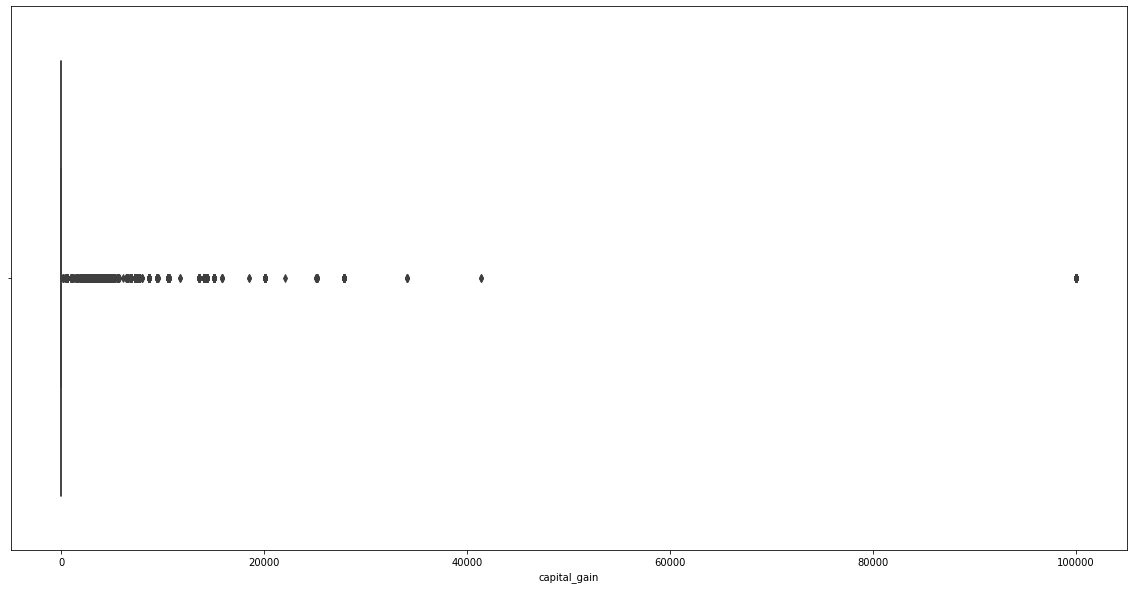

In [57]:
sns.boxplot(df.capital_gain)
plt.show()

Most people don't have capital gain.

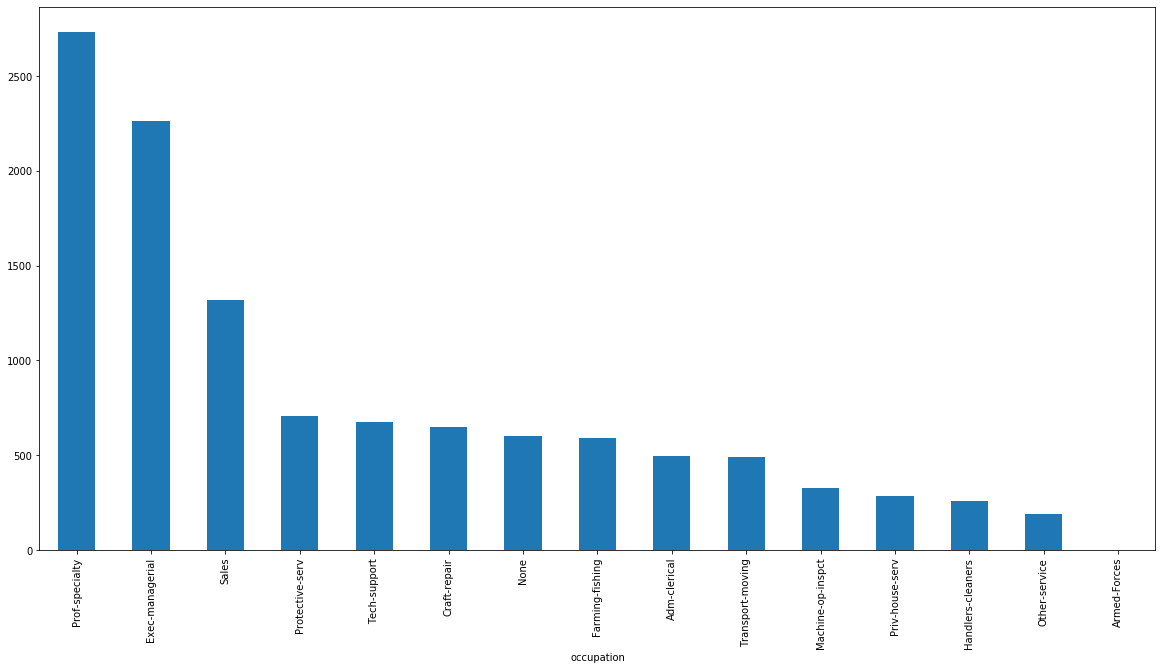

In [58]:
display(df.groupby("occupation").capital_gain.mean().sort_values(ascending=False).plot(kind="bar"))
plt.show()

We can see here the occupation of people that tends to get more capital gain.

Specialists, executives and salers stand at the top, the other classes are relatively close to each other.
The army shows zero.

capital_gain
income              
<=50K     148.897028
>50K     4007.675810

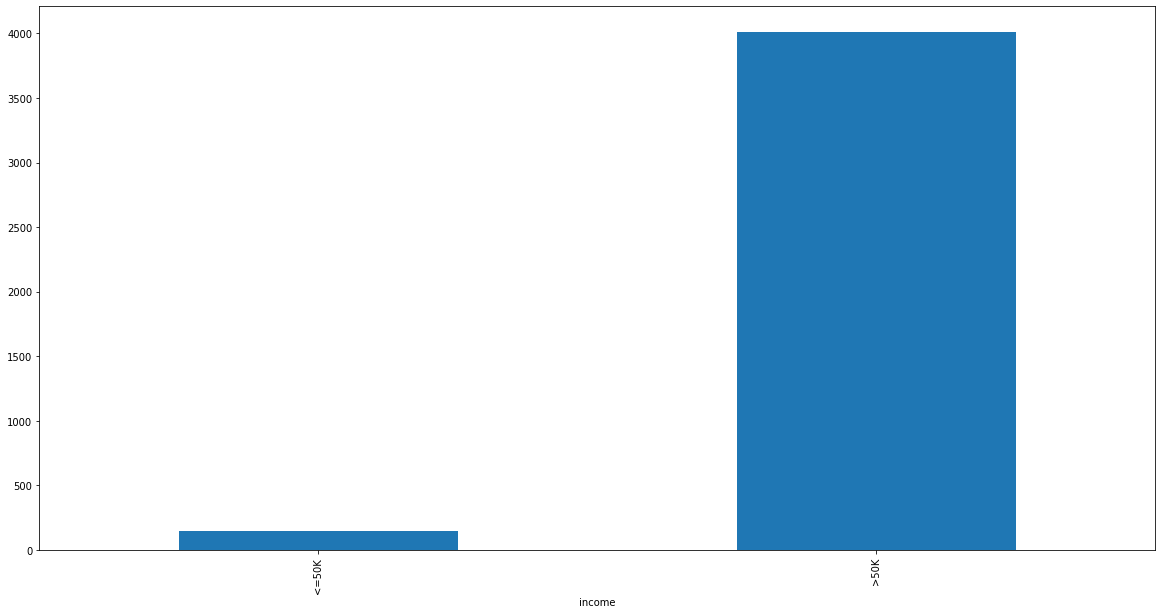

In [59]:
capital_mean_by_income = df.groupby("income").capital_gain.mean()
display(pd.DataFrame(capital_mean_by_income))
capital_mean_by_income.sort_values().plot(kind="bar")
plt.show()

In [60]:
pd.pivot_table(df, values="capital_gain", columns="income", aggfunc=["min","max","mean","median"])

min         max               mean             median     
income       <=50K >50K  <=50K   >50K       <=50K        >50K  <=50K >50K
capital_gain     0    0  41310  99999  148.897028  4007.67581      0    0

People with high income clearly have a high capital gain.

We can simulate a confusion matrix here to get a better idea of this last claim. Let's put the pivot on a capital gain of $150.

In [61]:
pivot = 150

In [62]:
def custom_accuracy_score(confusion_matrix):
    return (confusion_matrix.iloc[0,0]+confusion_matrix.iloc[1,1])/confusion_matrix.sum().sum()

In [63]:
by_capital_gain = pd.cut(df.capital_gain, [0, pivot,df.capital_gain.max()], include_lowest=True).rename("capital_class")
by_capital_gain

0        (-0.001, 150.0]
1        (-0.001, 150.0]
2        (-0.001, 150.0]
3        (-0.001, 150.0]
4        (-0.001, 150.0]
              ...       
32556    (-0.001, 150.0]
32557    (-0.001, 150.0]
32558    (-0.001, 150.0]
32559    (-0.001, 150.0]
32560    (-0.001, 150.0]
Name: capital_class, Length: 32534, dtype: category
Categories (2, interval[float64]): [(-0.001, 150.0] < (150.0, 99999.0]]

In [64]:
with_cap_sep = pd.concat([df.income, by_capital_gain], axis=1)
with_cap_sep

income    capital_class
0      <=50K  (-0.001, 150.0]
1      <=50K  (-0.001, 150.0]
2      <=50K  (-0.001, 150.0]
3      <=50K  (-0.001, 150.0]
4      <=50K  (-0.001, 150.0]
...      ...              ...
32556  <=50K  (-0.001, 150.0]
32557  <=50K  (-0.001, 150.0]
32558   >50K  (-0.001, 150.0]
32559  <=50K  (-0.001, 150.0]
32560  <=50K  (-0.001, 150.0]

[32534 rows x 2 columns]

In [65]:
income_capital_confusion_matrix = with_cap_sep.groupby(['income','capital_class']).size().unstack()
income_capital_confusion_matrix

capital_class  (-0.001, 150.0]  (150.0, 99999.0]
income                                          
<=50K                    23667              1029
>50K                      6161              1677

In [66]:
custom_accuracy_score(income_capital_confusion_matrix)

0.7790004303190509

$150 doesn't give use a good accuracy. We have to find the most discriminating capital gain value as the pivot.

In [67]:
def accuracy_analysis(dataframe, variable):
    duration = time.time()
    result=[]
    best_acc = 0
    best_pivot = 0
    possible_values = sorted(dataframe[variable].unique())[1:-1]
    maxi=possible_values[-1]
    for pivot_value in possible_values:
        by_sep = pd.cut(dataframe[variable], [0, pivot_value, dataframe[variable].max()], include_lowest=True).rename(variable+"_class")
        sep = pd.concat([dataframe.income, by_sep], axis=1)
        conf_mat = sep.groupby(['income',variable+'_class']).size().unstack()
        acc = custom_accuracy_score(conf_mat)
        result.append([pivot_value, acc])
        if acc>best_acc:
            best_conf_mat = conf_mat
            best_pivot = pivot_value
            best_acc=acc
    duration = time.time() - duration
    print("Done in  %f seconds"%duration)
    result_df = pd.DataFrame(result, columns=["pivot_value", "accuracy"])
    display(result_df.sort_values(by="accuracy",ascending=False))
    return {"result_df":result_df, "best_confusion_matrix":best_conf_mat, "best_accuracy":best_acc, "best_pivot":best_pivot}

In [68]:
cap_gain_accuracy = accuracy_analysis(df, "capital_gain")

Done in  1.508031 seconds


pivot_value  accuracy
77          5060  0.802545
76          5013  0.802514
70          4650  0.800854
89          6849  0.800854
71          4687  0.800762
..           ...       ...
112        25124  0.765138
113        25236  0.764800
116        41310  0.763970
115        34095  0.763909
114        27828  0.763755

[117 rows x 2 columns]

In [69]:
cap_gain_accuracy["best_confusion_matrix"]

capital_gain_class  (-0.001, 5060.0]  (5060.0, 99999.0]
income                                                 
<=50K                          24614                 82
>50K                            6342               1496

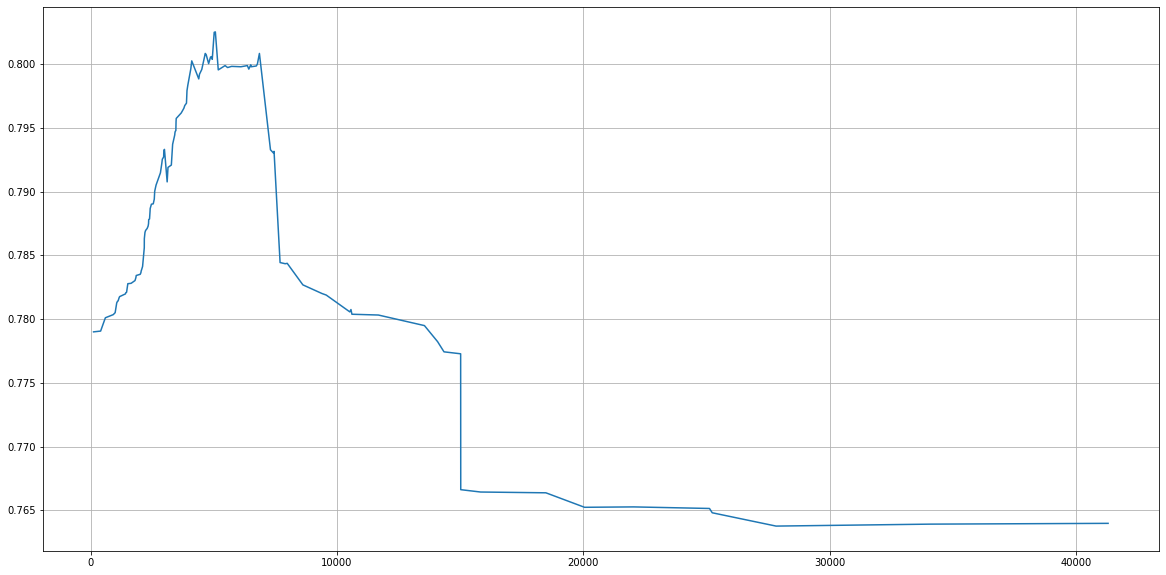

In [70]:
plt.plot(cap_gain_accuracy["result_df"].pivot_value, cap_gain_accuracy['result_df'].accuracy)
plt.grid()
plt.show()

It seems that the variable capital.gain has an influence on the income  until 35000 or so.

In [71]:
print("The best pivot value is %i with an accuracy of %f."%(cap_gain_accuracy["best_pivot"], cap_gain_accuracy["best_accuracy"]))

The best pivot value is 5060 with an accuracy of 0.802545.


Let's now use this value as our delimiter between two optimally spread classes.

In [72]:
df['capital_gain'] = pd.cut(df.capital_gain,  (0, cap_gain_accuracy["best_pivot"], df.capital_gain.max()), include_lowest=True, labels = ("<="+str(cap_gain_accuracy["best_pivot"]),">"+str(cap_gain_accuracy["best_pivot"])))
df

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


age   workclass  fnlwgt     education      marital_status  \
0      (82, 90]  Unemployed   77053       HS-grad             Widowed   
1      (60, 82]     Private  132870       HS-grad             Widowed   
2      (60, 82]  Unemployed  186061  Some-college             Widowed   
3      (48, 60]     Private  140359       7th-8th            Divorced   
4      (32, 48]     Private  264663  Some-college           Separated   
...         ...         ...     ...           ...                 ...   
32556   (0, 24]     Private  310152  Some-college       Never-married   
32557  (24, 32]     Private  257302    Assoc-acdm  Married-civ-spouse   
32558  (32, 48]     Private  154374       HS-grad  Married-civ-spouse   
32559  (48, 60]     Private  151910       HS-grad             Widowed   
32560   (0, 24]     Private  201490       HS-grad       Never-married   

              occupation   relationship   race     sex capital_gain  \
0                   None  Not-in-family  White  Female       <=5060   
1        Exec-managerial  Not-in-family  White  Female       <=5060   
2                   None      Unmarried  Black  Female       <=5060   
3      Machine-op-inspct      Unmarried  White  Female       <=5060   
4         Prof-specialty      Own-child  White  Female       <=5060   
...                  ...            ...    ...     ...          ...   
32556    Protective-serv  Not-in-family  White    Male       <=5060   
32557       Tech-support           Wife  White  Female       <=5060   
32558  Machine-op-inspct        Husband  White    Male       <=5060   
32559       Adm-clerical      Unmarried  White  Female       <=5060   
32560       Adm-clerical      Own-child  White    Male       <=5060   

       capital_loss  hours_per_week native_country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32534 rows x 14 columns]

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


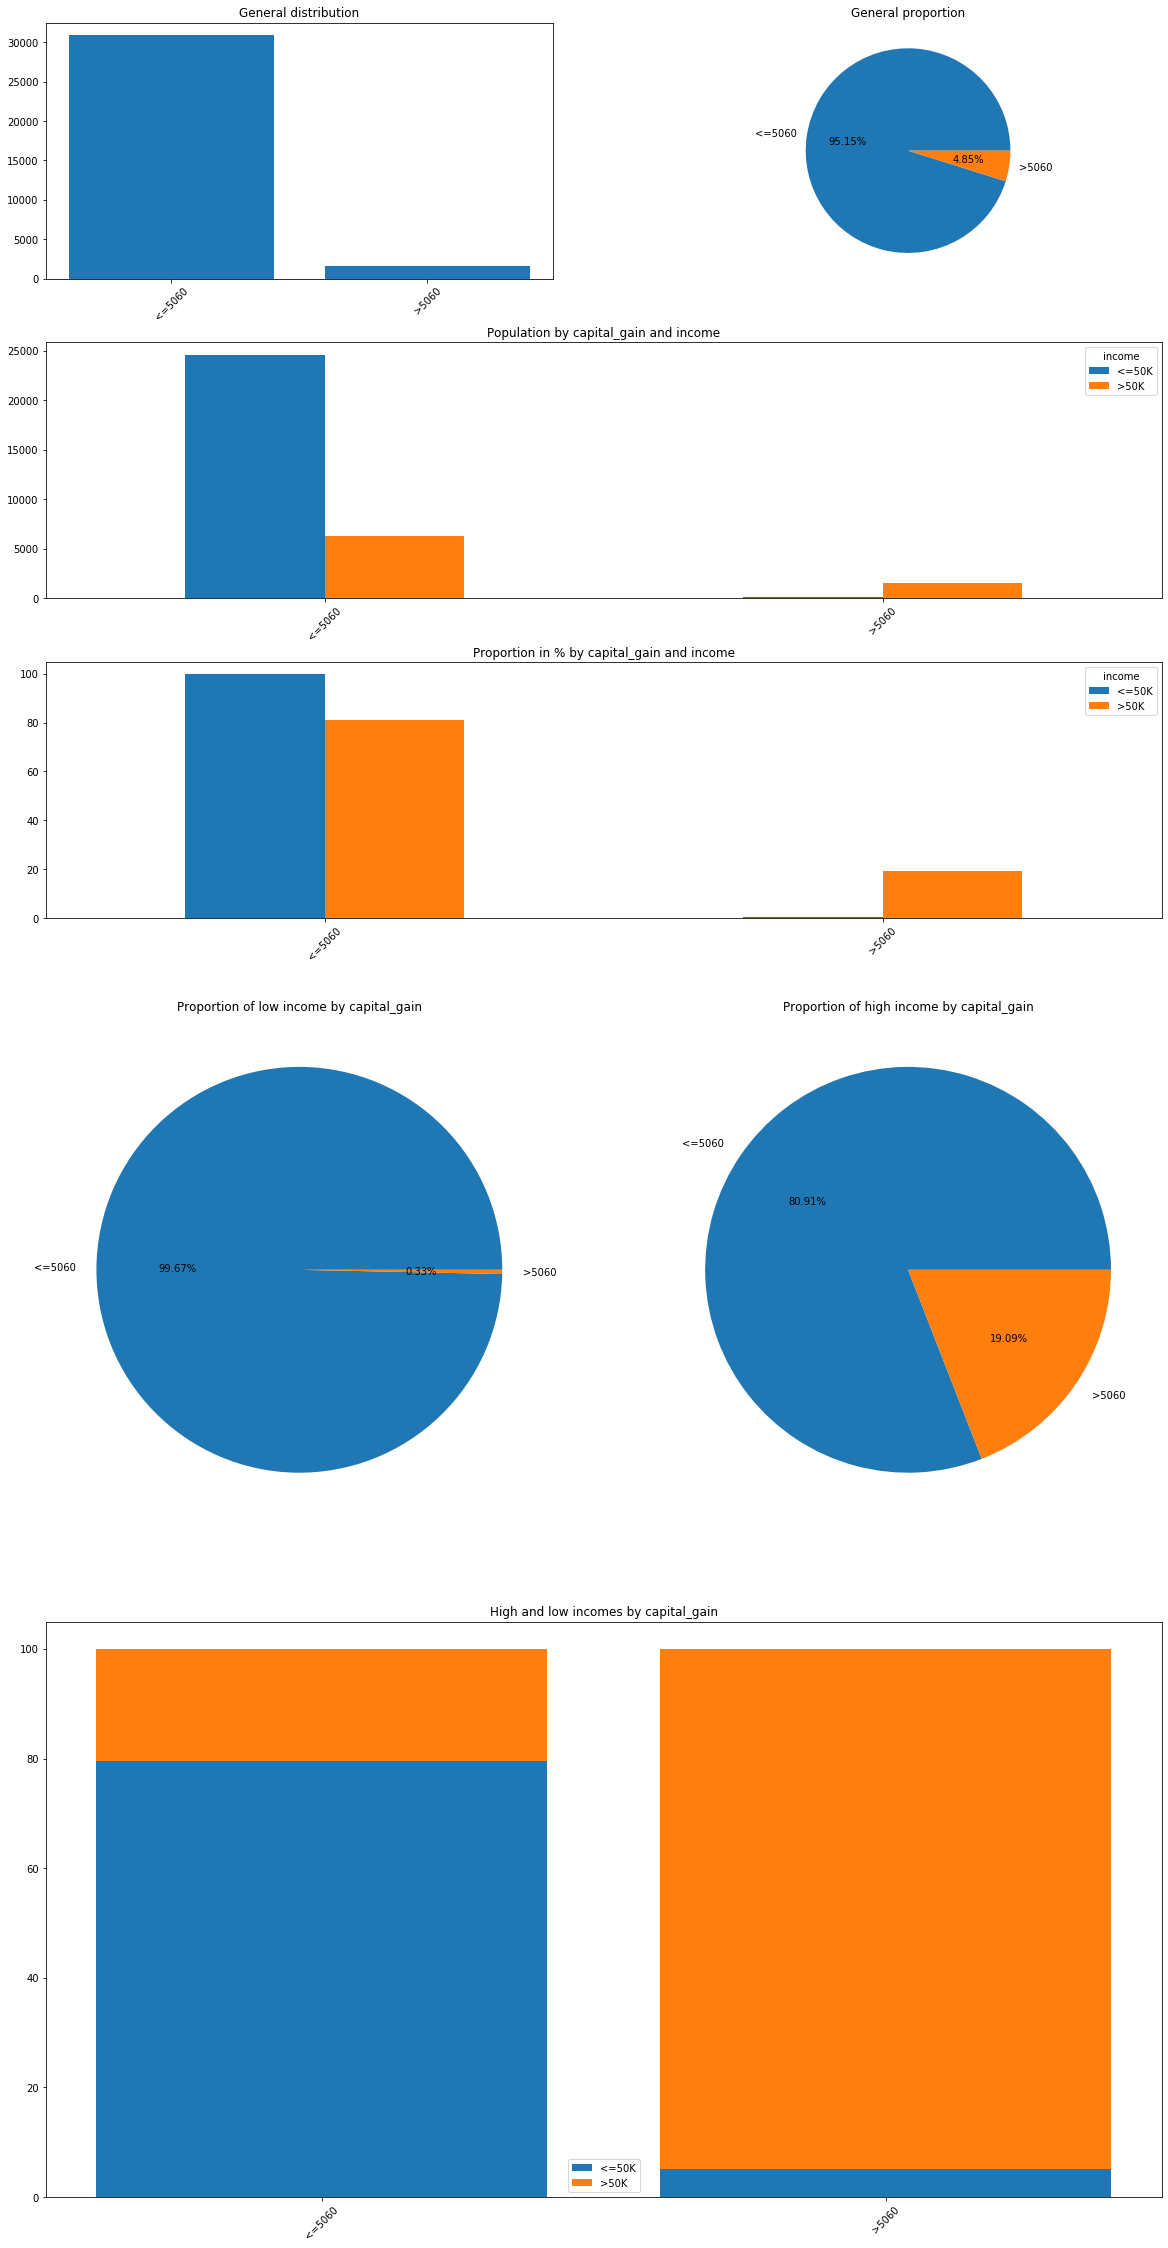

In [73]:
distri_analysis(df, "capital_gain")

[Go back to the top](#start)

## 11- capital_loss <a name="capital_loss"></a>
Type : int.
Example : 4356.

In [74]:
df.capital_loss.describe()

count    32534.000000
mean        87.376283
std        403.119545
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

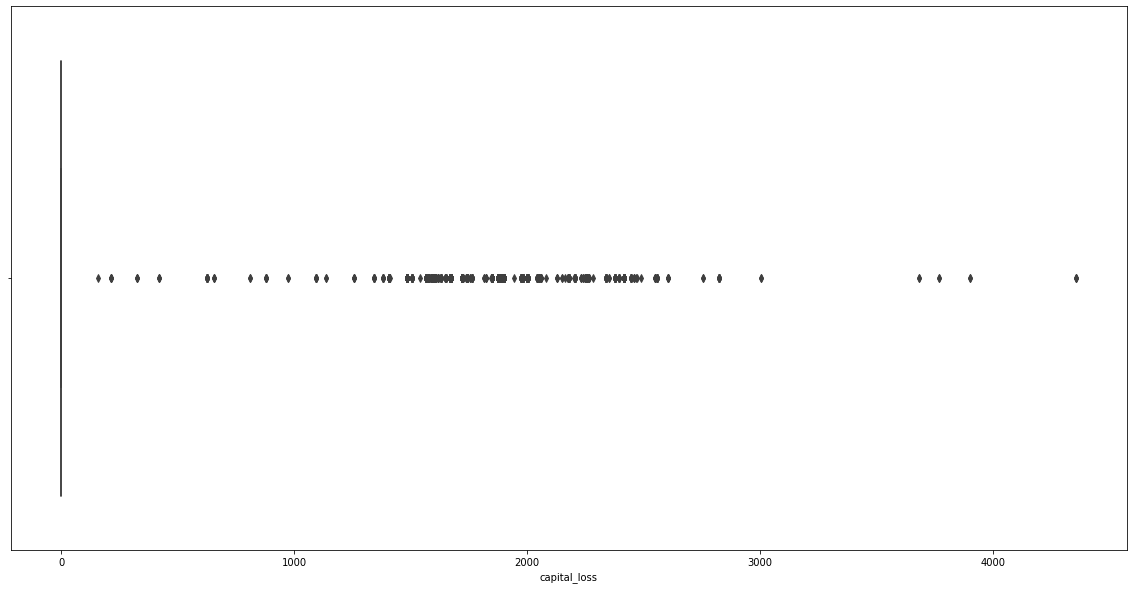

In [75]:
sns.boxplot(df.capital_loss)
plt.show()

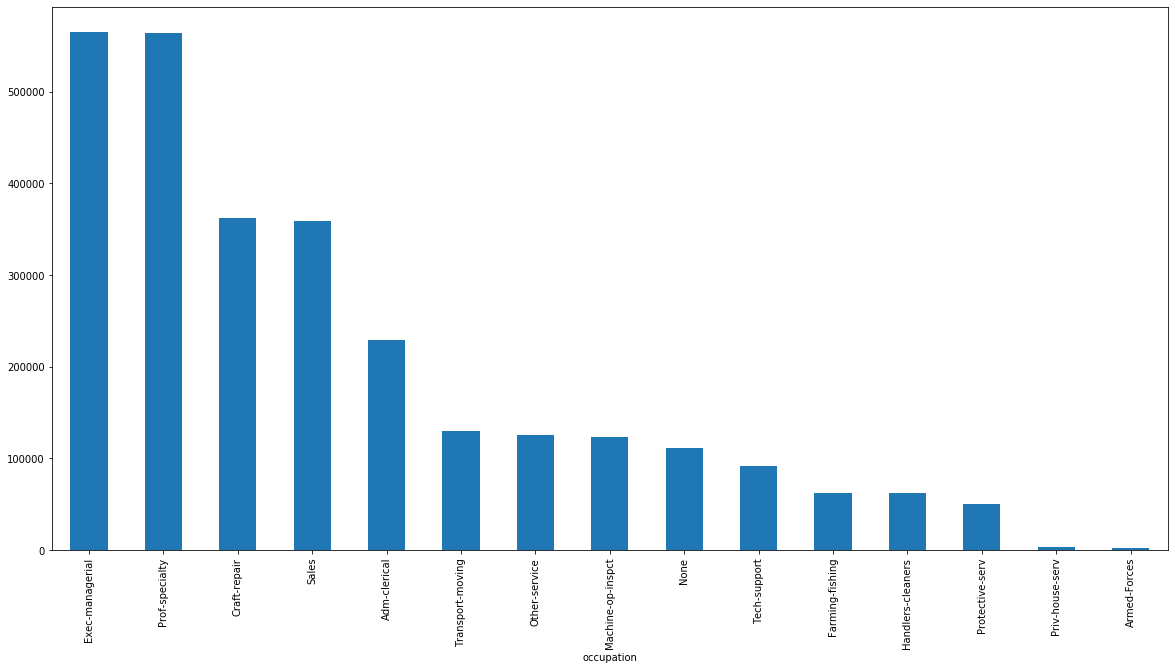

In [76]:
df.groupby("occupation").capital_loss.sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

We find a notable difference when it comes to the capital loss : craft and repair occupations show a higher capital loss than sales, this time

Let's apply the same method than capital gain to this variable, and check if we have about the same accuracy on our confusion matrix.

capital_loss
income              
<=50K      53.194566
>50K      195.076167

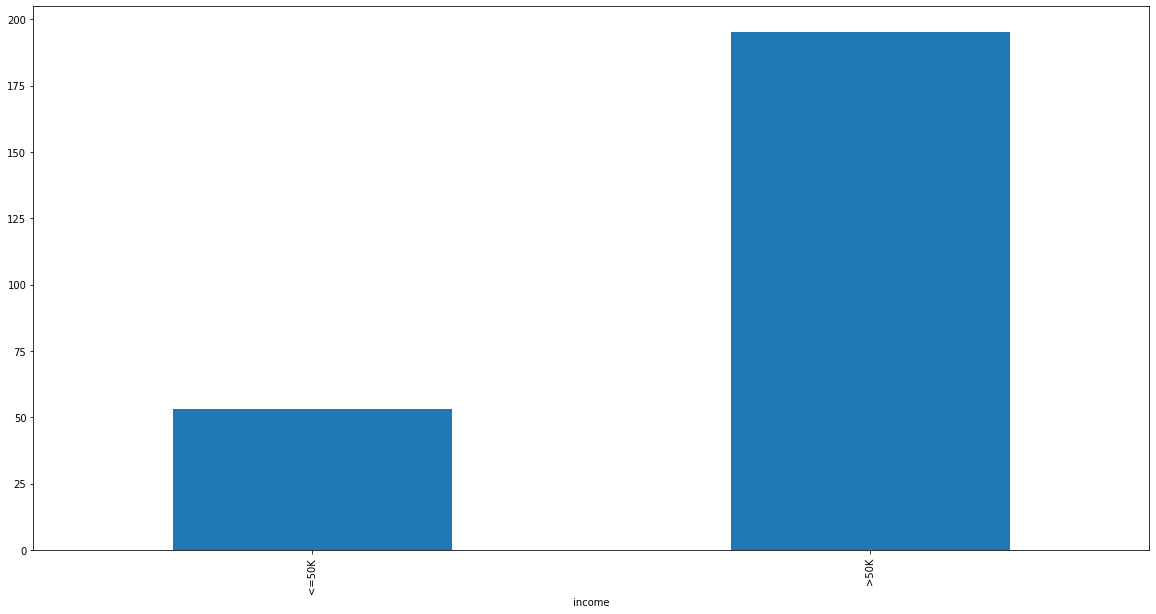

In [77]:
capital_loss_mean_by_income = df.groupby("income").capital_loss.mean()
display(pd.DataFrame(capital_loss_mean_by_income))
capital_loss_mean_by_income.sort_values().plot(kind="bar")
plt.show()

This variable already looks less discriminating.

In [78]:
cap_loss_accuracy = accuracy_analysis(df, "capital_loss")

Done in  0.923065 seconds


pivot_value  accuracy
40         1816  0.772453
39         1762  0.772392
42         1844  0.772361
41         1825  0.772330
37         1741  0.772023
..          ...       ...
50         1980  0.757823
49         1977  0.757116
87         3683       NaN
88         3770       NaN
89         3900       NaN

[90 rows x 2 columns]

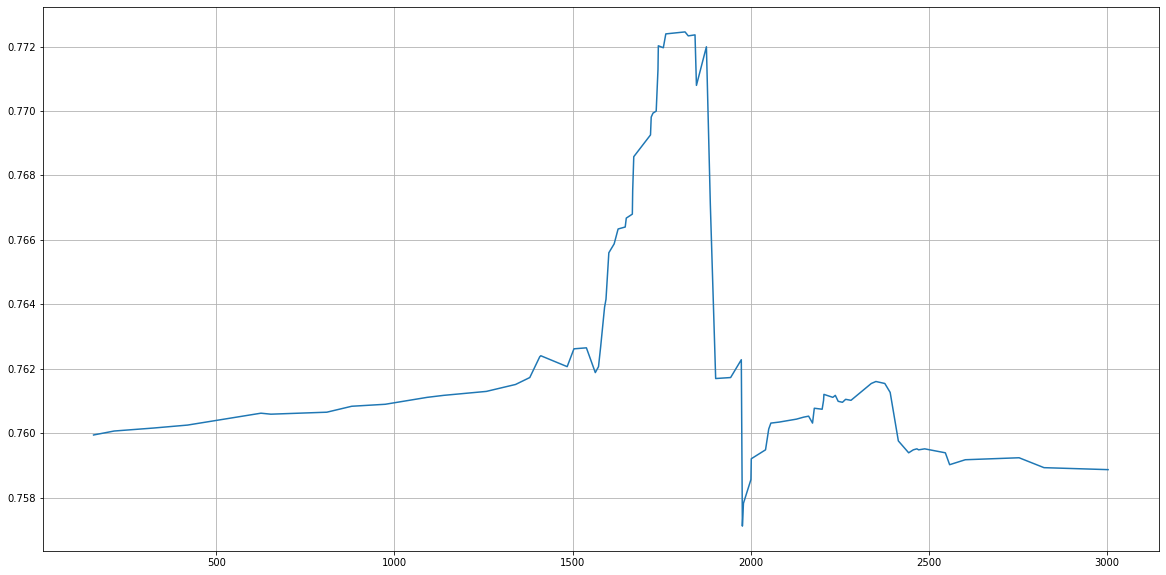

In [79]:
plt.plot(cap_loss_accuracy["result_df"].pivot_value, cap_loss_accuracy['result_df'].accuracy)
plt.grid()
plt.show()

In [80]:
print("The best pivot value is %i with an accuracy of %f."%(cap_loss_accuracy["best_pivot"], cap_loss_accuracy["best_accuracy"]))

The best pivot value is 1816 with an accuracy of 0.772453.


In [81]:
cap_loss_accuracy["best_confusion_matrix"]

capital_loss_class  (-0.001, 1816.0]  (1816.0, 4356.0]
income                                                
<=50K                          24418               278
>50K                            7125               713

In [82]:
df['capital_loss'] = pd.cut(df.capital_loss,  (0, cap_loss_accuracy["best_pivot"], df.capital_loss.max()), include_lowest=True, labels = ("<="+str(cap_loss_accuracy["best_pivot"]),">"+str(cap_loss_accuracy["best_pivot"])))
df

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


age   workclass  fnlwgt     education      marital_status  \
0      (82, 90]  Unemployed   77053       HS-grad             Widowed   
1      (60, 82]     Private  132870       HS-grad             Widowed   
2      (60, 82]  Unemployed  186061  Some-college             Widowed   
3      (48, 60]     Private  140359       7th-8th            Divorced   
4      (32, 48]     Private  264663  Some-college           Separated   
...         ...         ...     ...           ...                 ...   
32556   (0, 24]     Private  310152  Some-college       Never-married   
32557  (24, 32]     Private  257302    Assoc-acdm  Married-civ-spouse   
32558  (32, 48]     Private  154374       HS-grad  Married-civ-spouse   
32559  (48, 60]     Private  151910       HS-grad             Widowed   
32560   (0, 24]     Private  201490       HS-grad       Never-married   

              occupation   relationship   race     sex capital_gain  \
0                   None  Not-in-family  White  Female       <=5060   
1        Exec-managerial  Not-in-family  White  Female       <=5060   
2                   None      Unmarried  Black  Female       <=5060   
3      Machine-op-inspct      Unmarried  White  Female       <=5060   
4         Prof-specialty      Own-child  White  Female       <=5060   
...                  ...            ...    ...     ...          ...   
32556    Protective-serv  Not-in-family  White    Male       <=5060   
32557       Tech-support           Wife  White  Female       <=5060   
32558  Machine-op-inspct        Husband  White    Male       <=5060   
32559       Adm-clerical      Unmarried  White  Female       <=5060   
32560       Adm-clerical      Own-child  White    Male       <=5060   

      capital_loss  hours_per_week native_country income  
0            >1816              40  United-States  <=50K  
1            >1816              18  United-States  <=50K  
2            >1816              40  United-States  <=50K  
3            >1816              40  United-States  <=50K  
4            >1816              40  United-States  <=50K  
...            ...             ...            ...    ...  
32556       <=1816              40  United-States  <=50K  
32557       <=1816              38  United-States  <=50K  
32558       <=1816              40  United-States   >50K  
32559       <=1816              40  United-States  <=50K  
32560       <=1816              20  United-States  <=50K  

[32534 rows x 14 columns]

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


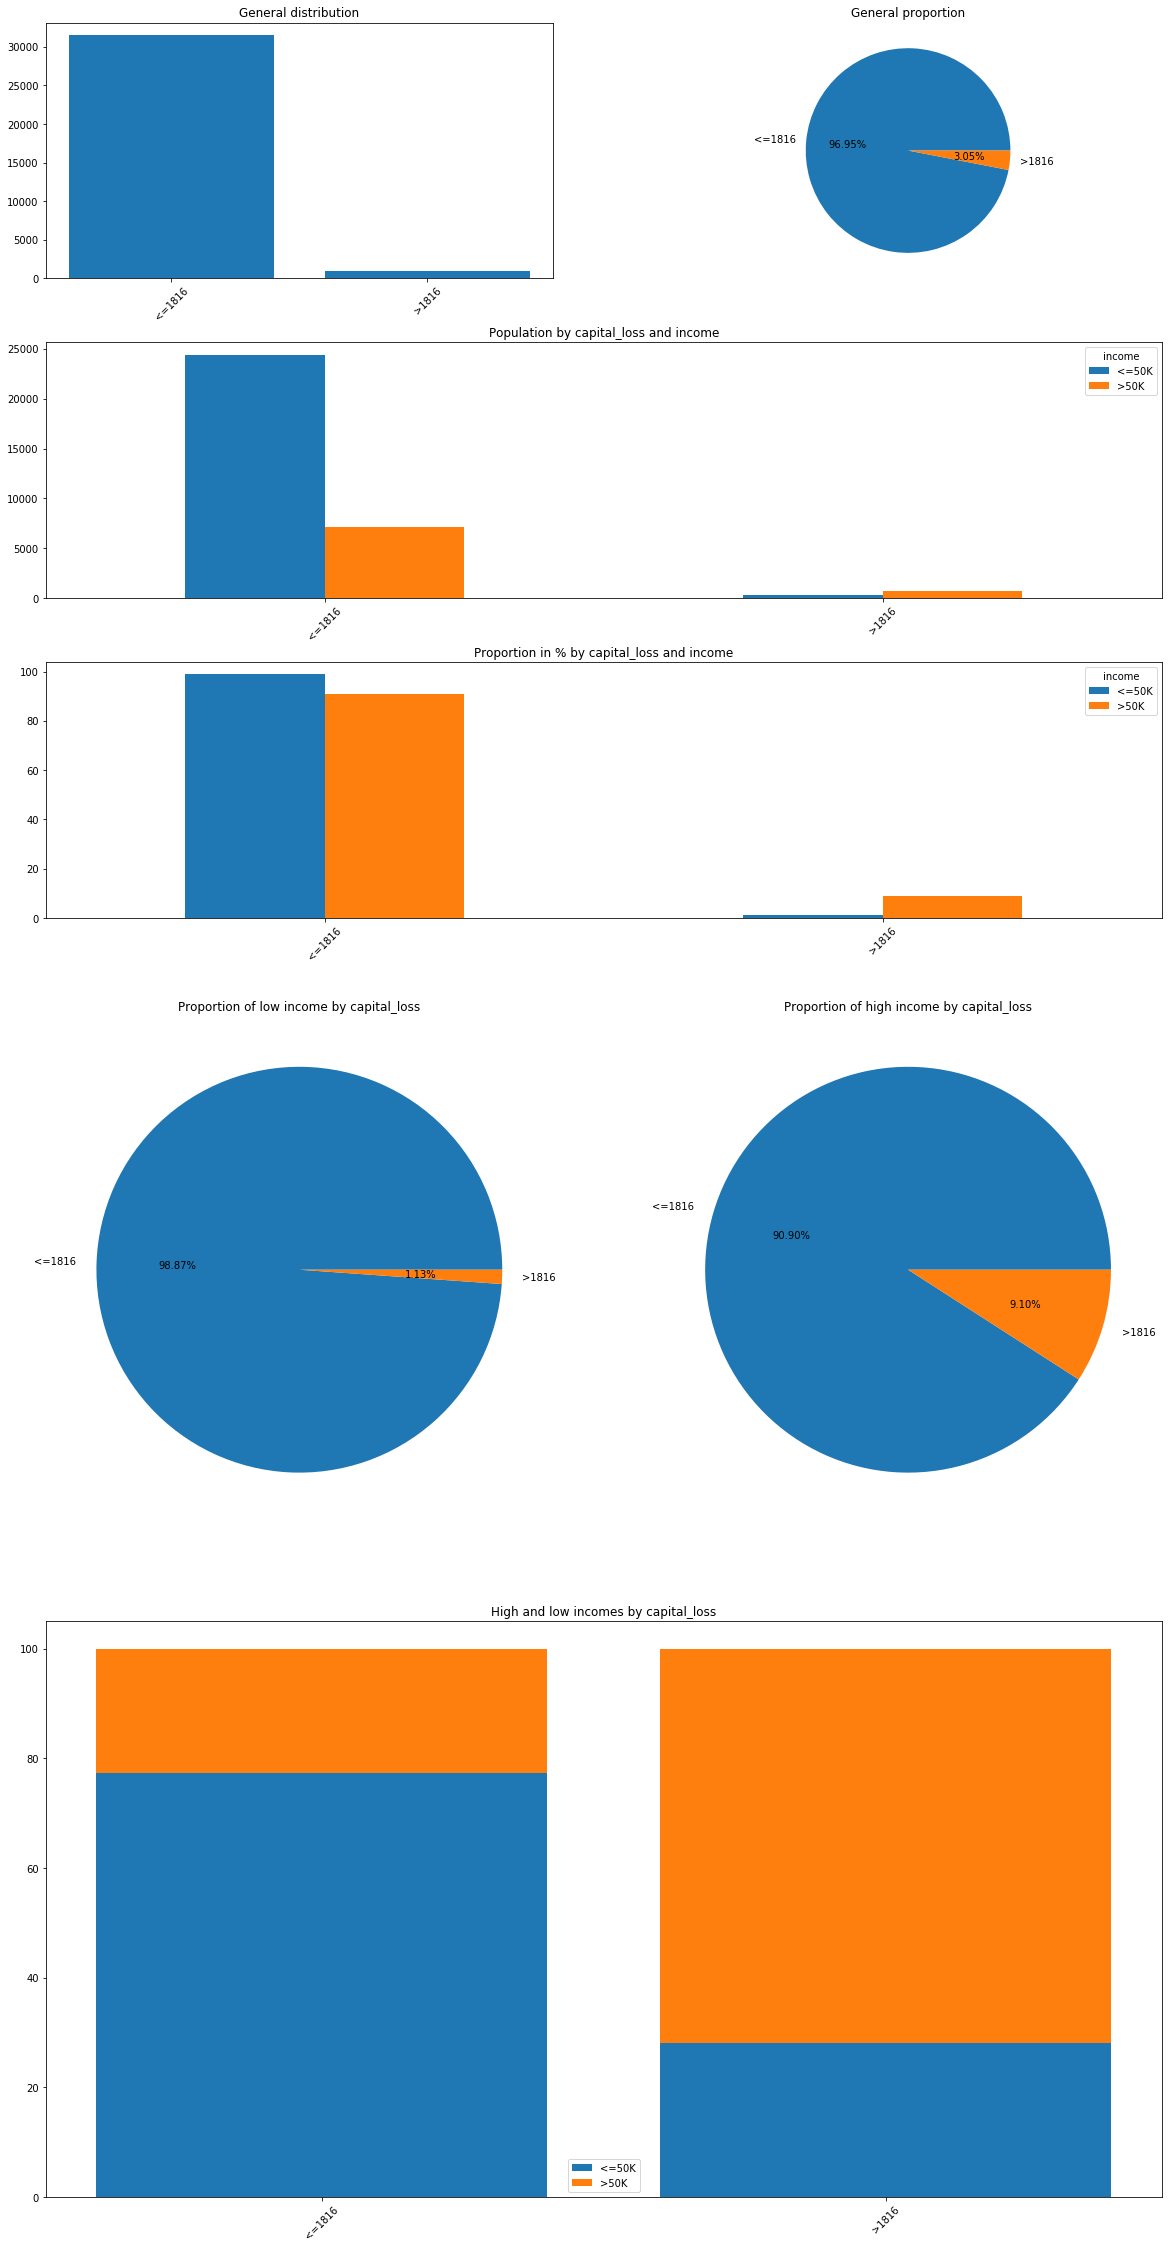

In [83]:
distri_analysis(df, "capital_loss")

[Go back to the top](#start)

## 12- hours_per_week <a name="hours_per_week"></a>
Type : int.
Exemple : 40

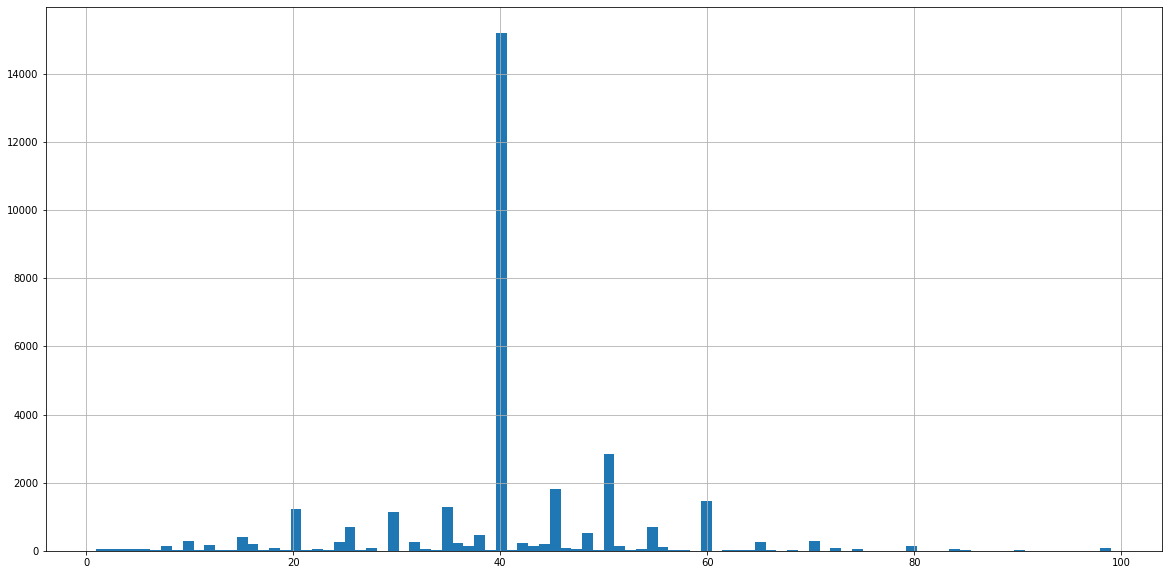

In [84]:
df.hours_per_week.hist(bins=df.hours_per_week.nunique())
plt.show()

In [85]:
hours = df.groupby("hours_per_week").age.count()

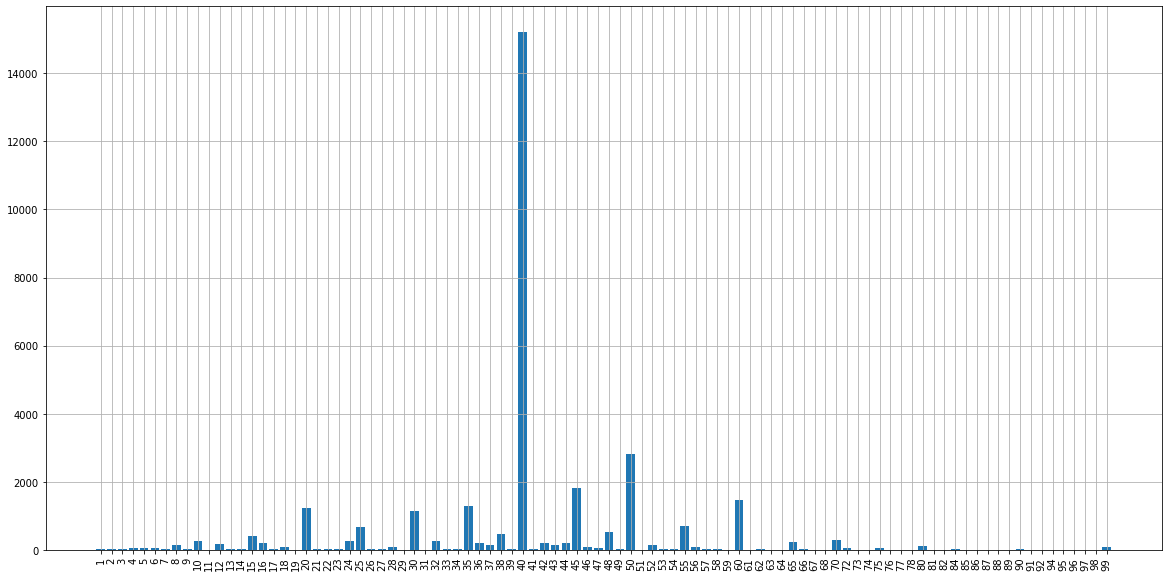

In [86]:
plt.bar(list(hours.index.astype(str)),hours)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [87]:
hours_grouped = df.groupby(pd.cut(df.hours_per_week, np.arange(0,105,5))).age.count().sort_values(ascending=False)

<BarContainer object of 20 artists>

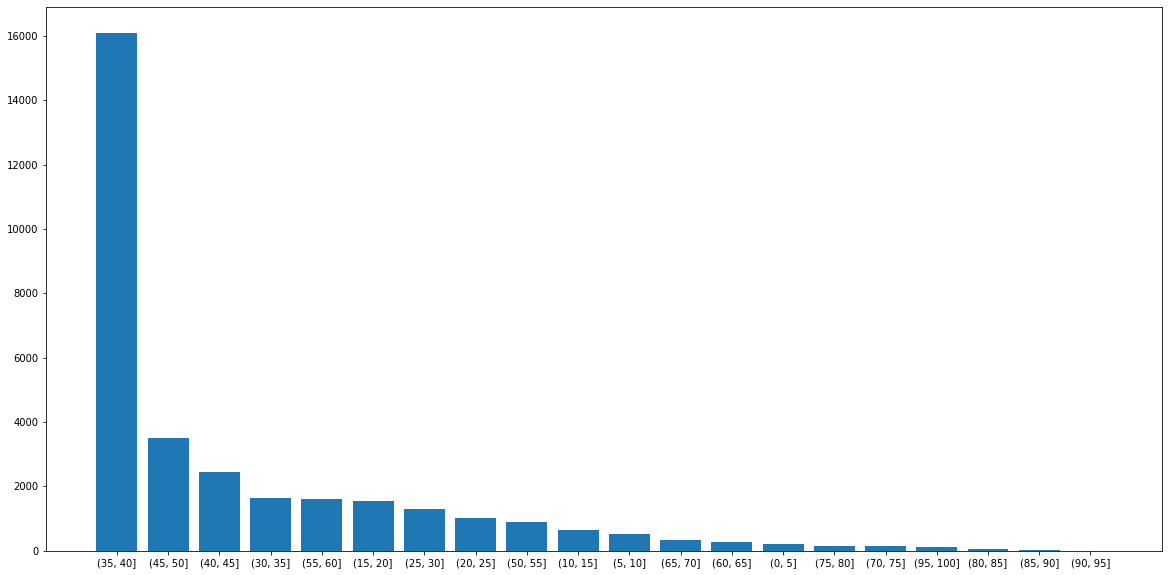

In [88]:
plt.bar(list(hours_grouped.index.astype(str)),hours_grouped)

In [89]:
hard_worker_count_total = (df.hours_per_week>35).sum()
print("%i of the %i people work in average more 35 hours or more, which is about %.2f%%."%(hard_worker_count_total,len(df),hard_worker_count_total*100/len(df)))

25660 of the 32534 people work in average more 35 hours or more, which is about 78.87%.


In [90]:
df_emp = df[df.occupation!="None"]
hard_worker_count_workers = (df_emp.hours_per_week>35).sum()
print("%i of the %i workers work in average more 35 hours or more, which is about %.2f%%."%(hard_worker_count_workers,len(df_emp),hard_worker_count_workers*100/len(df_emp)))

24730 of the 30691 workers work in average more 35 hours or more, which is about 80.58%.


In [91]:
hours_low_income = df[inf].groupby("hours_per_week").age.count()*100/len(df[inf])
hours_high_income = df[~inf].groupby("hours_per_week").age.count()*100/len(df[~inf])

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


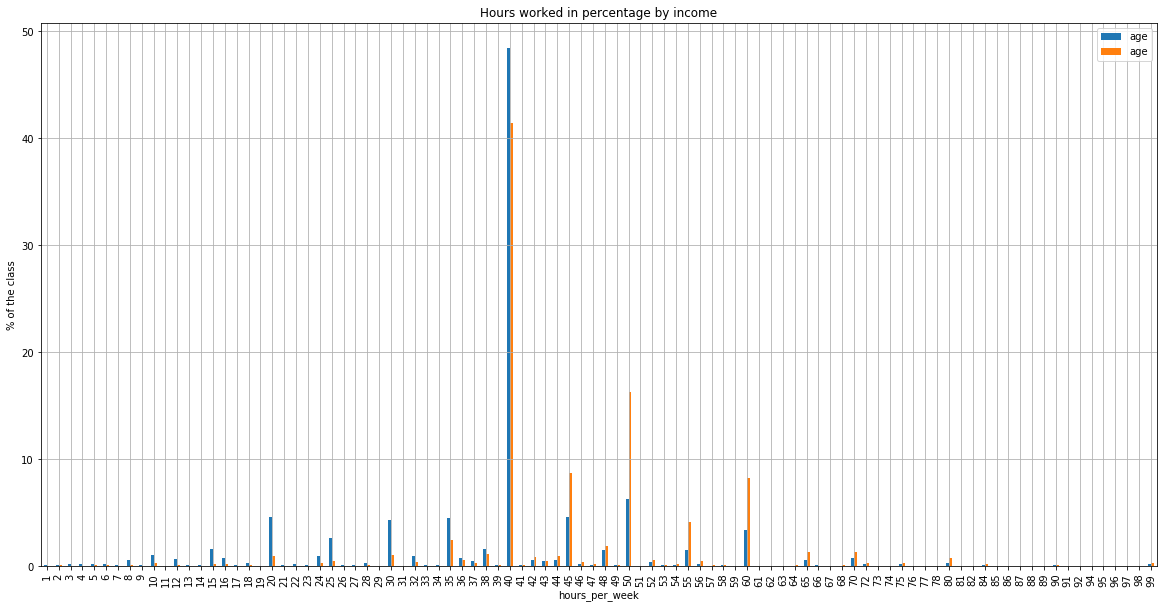

In [92]:
pd.concat([hours_low_income, hours_high_income], axis=1).plot.bar()
plt.xticks(rotation=90)
plt.grid()
plt.ylabel("% of the class")
plt.title("Hours worked in percentage by income")
plt.legend()
plt.show()

High and low incomes most frequently work 40 hours a week.

Nevertheless, high incomes show a higher proportion of people working more than 40 hours a week, whereas low incomes show a higher proportion in work hours inferior to 40 hours.

Not only 40 hours a week is the most prevalent regime here, but it is also the pivot value between both classes.

[Go back to the top](#start)

## 13- native_country <a name="native_country"></a>
Type : string.
Exemple : United-states

In [93]:
df.native_country.unique()

array(['United-States', None, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

The None were previously interrogation marks. Let's reset it as "Unknown".


In [94]:
df.native_country.fillna("Unknown", inplace=True)

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


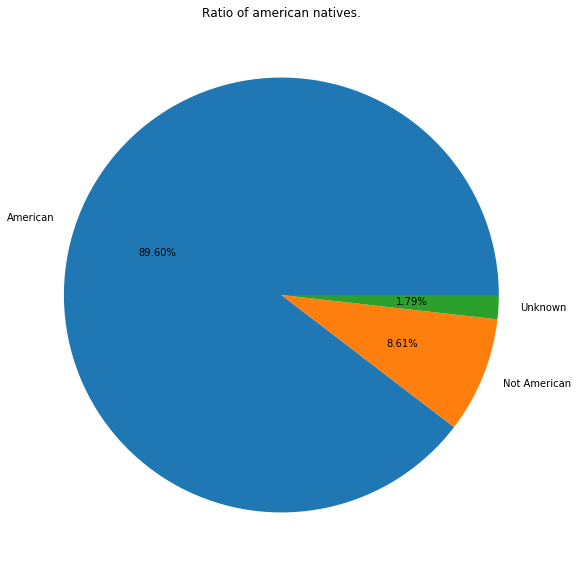

In [95]:
is_us = df["native_country"]=='United-States'
is_us = ["American" if x =="United-States" else x if x=="Unknown" else "Not American" for x in df.native_country.values]
group = df.groupby(is_us).age.count().sort_values(ascending=False)
plt.pie(group.values, labels=group.index, autopct='%.2f%%')
plt.title('Ratio of american natives.')
plt.show()

In [96]:
print("%.2f%% of the people checked are native of the USA."%((df["native_country"]=='United-States').sum()*100/len(df)))

89.60% of the people checked are native of the USA.


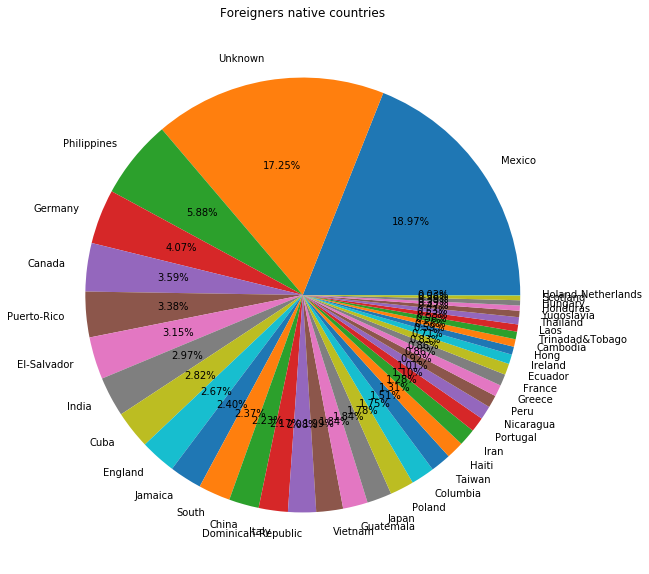

In [97]:
df_foreign = df[(df.native_country != "United-States")&((df.native_country != 'Outlying-US(Guam-USVI-etc)'))]
group = df_foreign.groupby("native_country").age.count().sort_values(ascending=False)
plt.pie(group.values, labels = group.index, autopct='%.2f%%')
plt.title('Foreigners native countries')
plt.show()

To make our analysis more understandable, since there are too many modularities in this variable, we can regroup countries by continent.

In [98]:
continent_dict = {
    "Native" : ["United-States", 'Outlying-US(Guam-USVI-etc)'],
    "North_America" : ["Mexico", 'Canada', 'Puerto-Rico','Honduras', 'Cuba',
                      'Nicaragua', 'Dominican-Republic', 'Haiti', 'El-Salvador',
                      'Guatemala', 'Jamaica'],
    "South_America" : ['Trinadad&Tobago', 'South', 'Peru', 'Columbia', 'Ecuador'],
    "Europe" : ["Greece", 'Holand-Netherlands', 'Poland', 'England',
               'Germany', 'Italy', 'Ireland', 'Hungary','France', 'Yugoslavia',
                'Scotland', 'Portugal'],
    "Asia" : ["Vietnam", 'China', 'Taiwan', 'India', 'Philippines', 'Iran',
             'Japan', 'Hong', 'Cambodia', 'Laos', 'Thailand'],
    "Unknown":["Unknown"]
}

In [99]:
continent_dict = {country : continent for continent in continent_dict.keys() for country in continent_dict[continent] }

In [100]:
df_foreign["native_continent"] = df_foreign['native_country'].apply(lambda x: continent_dict[x])

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


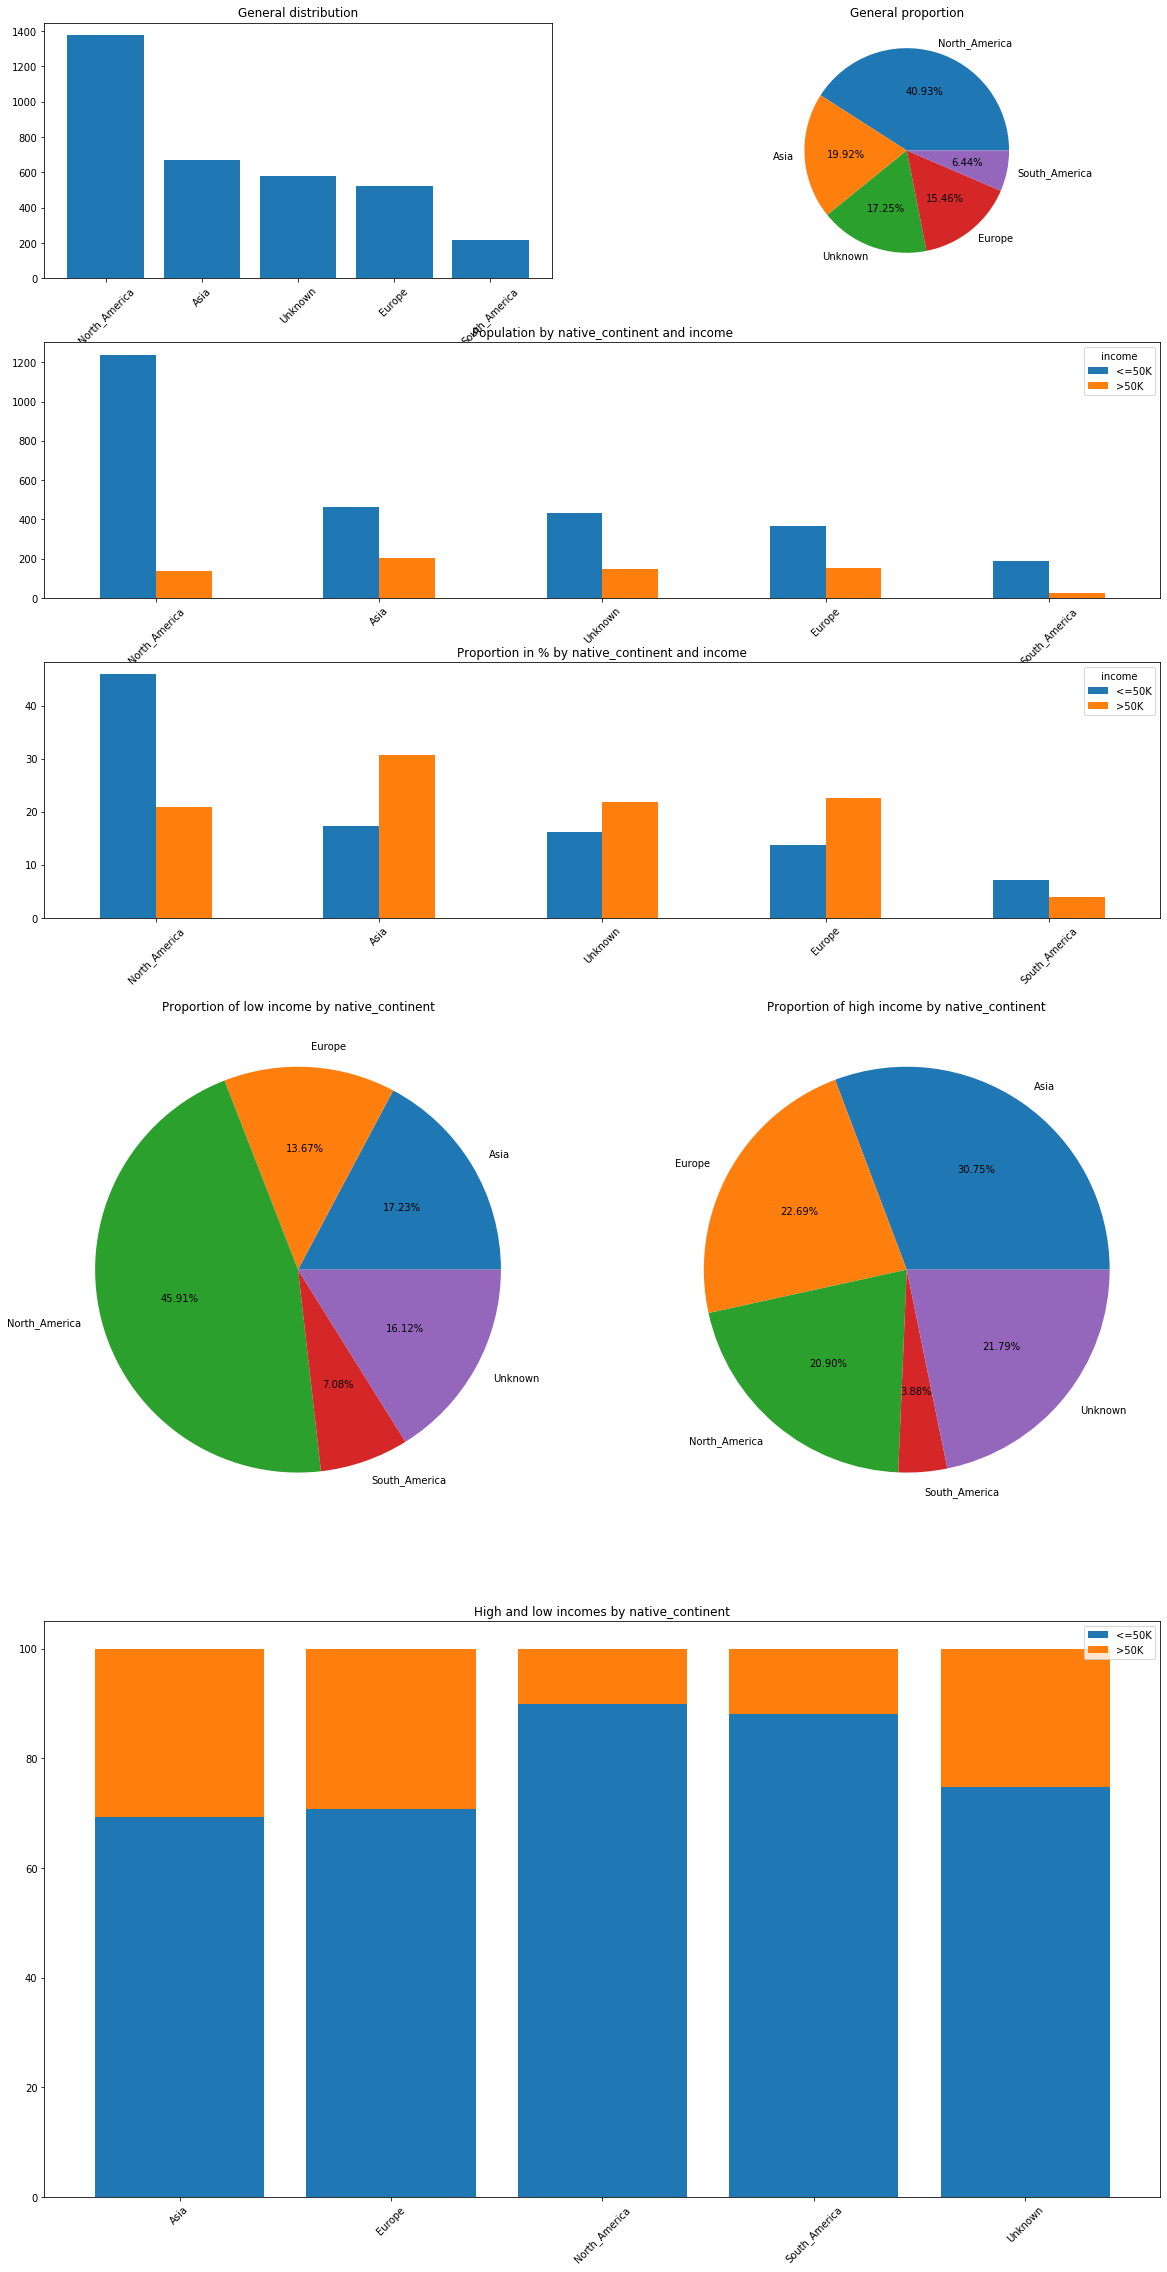

In [101]:
distri_analysis(df_foreign, "native_continent")

Let's try the same method for the whole dataset, this time.

In [102]:
df["native_continent"] = df['native_country'].apply(lambda x: continent_dict[x])

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


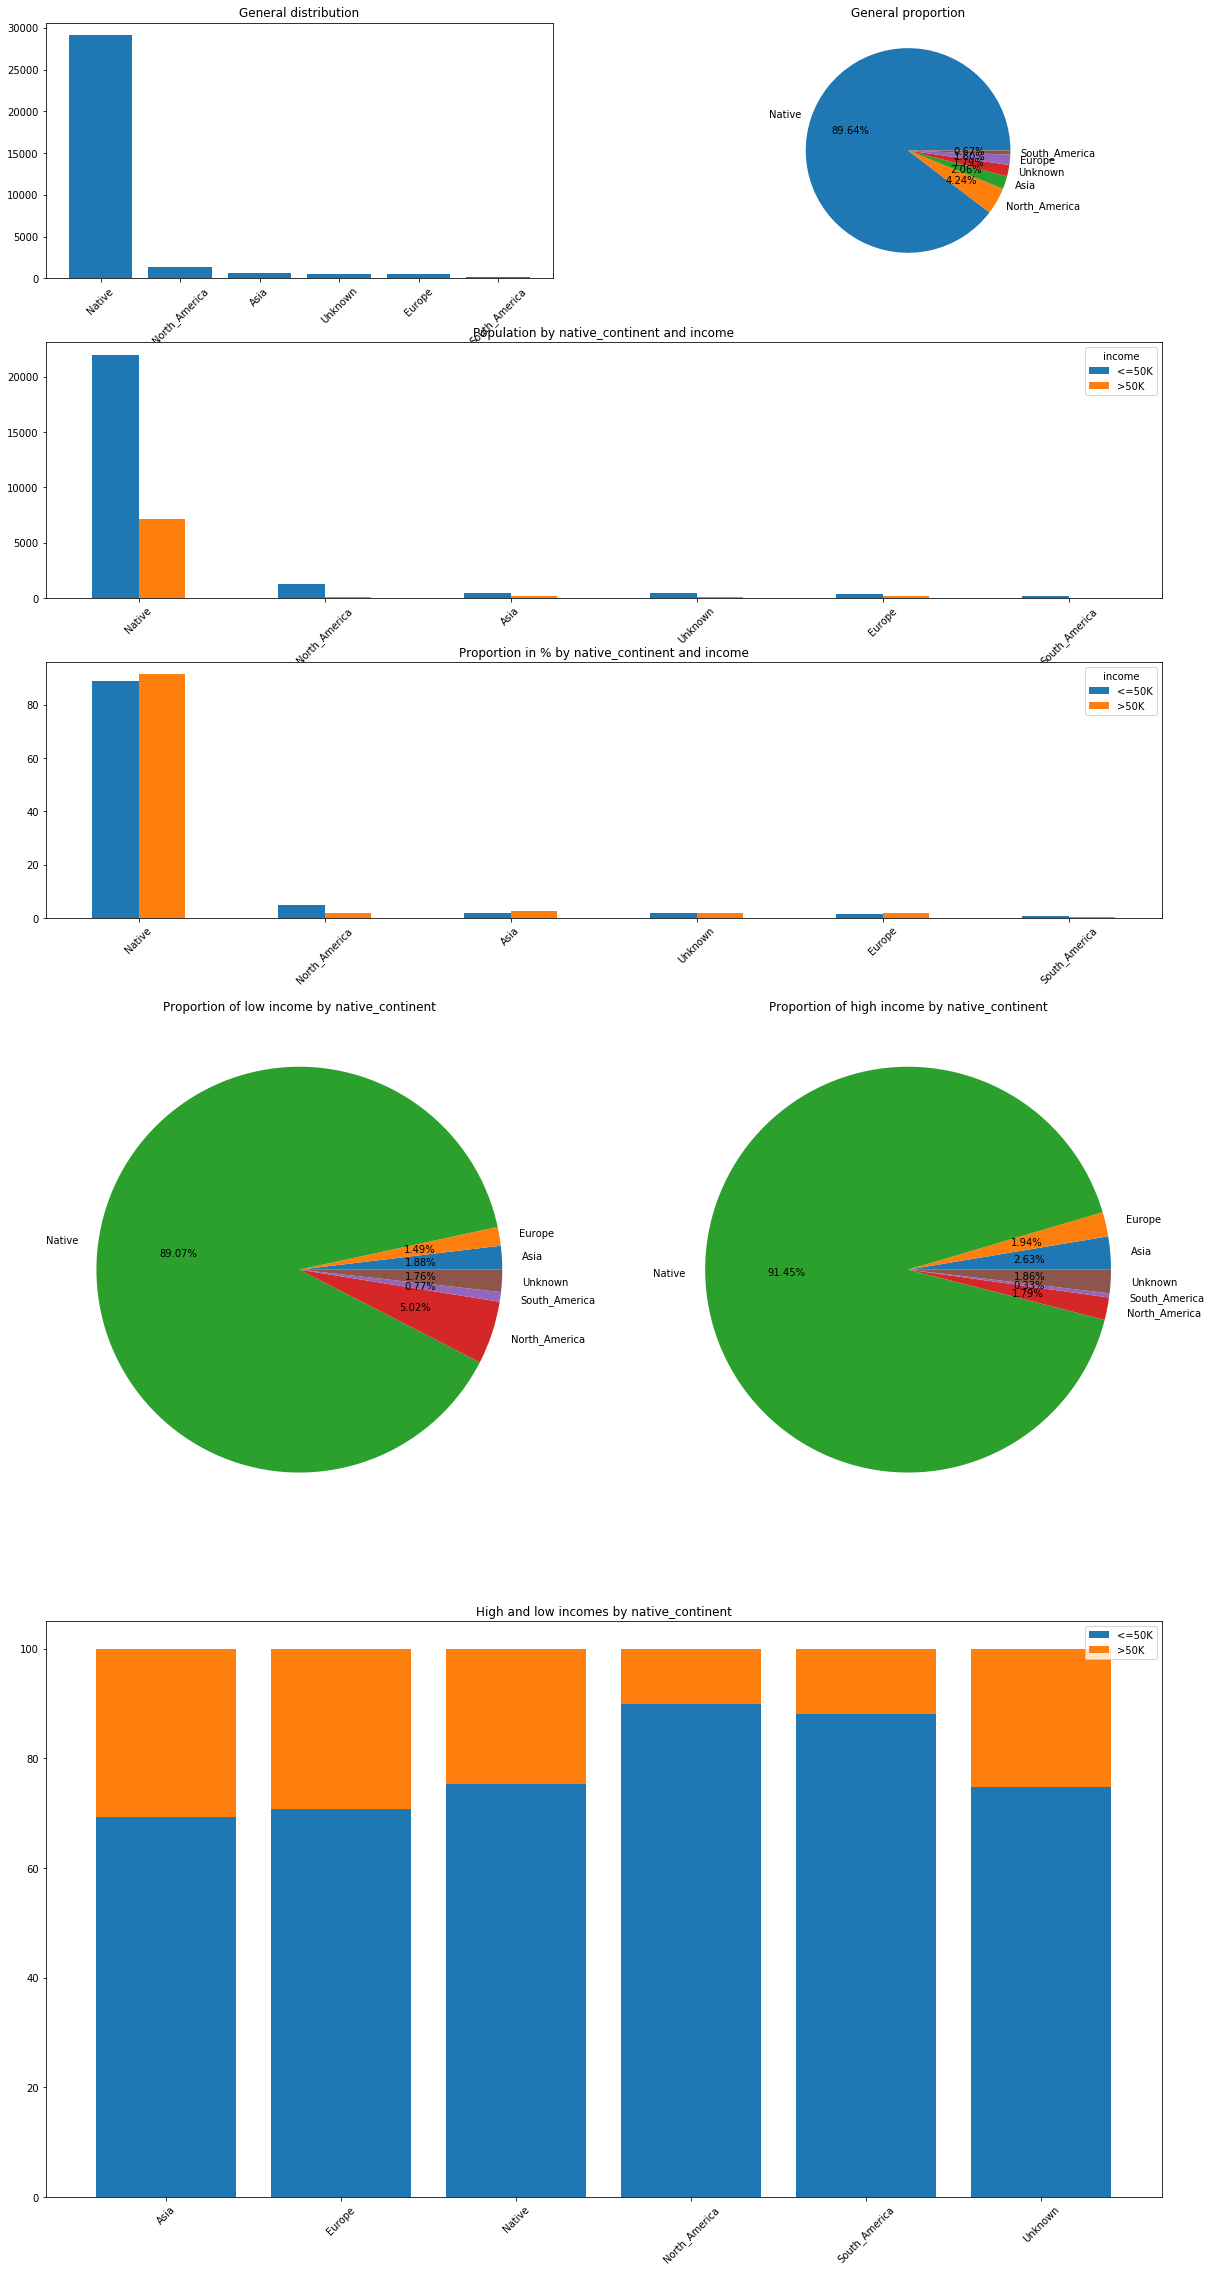

In [103]:
distri_analysis(df, "native_continent")

Us natives, Europeans, Asians and unknown nativities are privileged for high income.

[Go back to the top](#start)

## 14- income <a name="income"></a>
Type : string.
Example : <=50K

Now, it's about our main target.

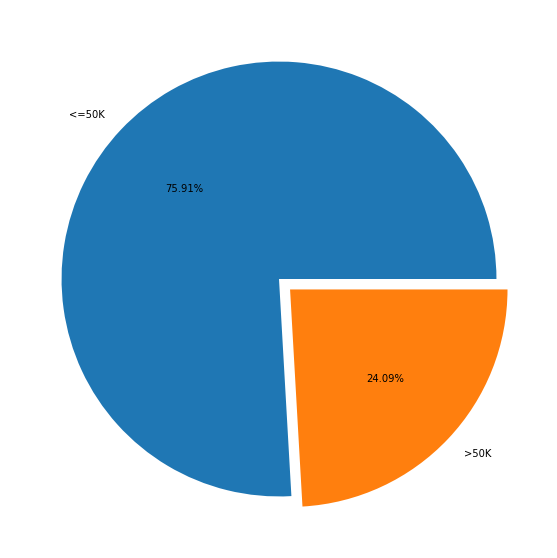

In [104]:
income_group = df.groupby("income").income.size()
plt.pie(income_group, labels=income_group.index, autopct="%.2f%%", explode=(0, 0.07))
plt.show()

[Go back to the top](#start)

# Exploratory Data Analysis <a name="exploration"></a>

## Capital gain vs capital loss <a name="capital_comparison"></a>

### All incomes <a name="all_incomes"></a>

In [105]:
pd.pivot_table(df, "income", "capital_gain", "capital_loss", aggfunc='size').fillna(0)

capital_loss   <=1816  >1816
capital_gain                
<=5060        29965.0  991.0
>5060          1578.0    0.0

In [106]:
df[(df.capital_gain==">5060")&(df.capital_loss==">1816")]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income, native_continent]
Index: []

In [107]:
custom_accuracy_score(pd.pivot_table(df, "income", "capital_gain", "capital_loss", aggfunc='size').fillna(0))

0.9210364541710211

Not a single person in this dataset has a high capital loss and a high capital gain.

### Low income <a name="low_income"></a>

In [108]:
pd.pivot_table(df[inf], "income", "capital_gain", "capital_loss", aggfunc='size').fillna(0)

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


capital_loss   <=1816  >1816
capital_gain                
<=5060        24336.0  278.0
>5060            82.0    0.0

In [109]:
custom_accuracy_score(pd.pivot_table(df[inf], "income", "capital_gain", "capital_loss", aggfunc='size').fillna(0))

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.9854227405247813

### High income <a name="high_income"></a>

In [110]:
pd.pivot_table(df[inf==False], "income", "capital_gain", "capital_loss", aggfunc='size').fillna(0)

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


capital_loss  <=1816  >1816
capital_gain               
<=5060        5629.0  713.0
>5060         1496.0    0.0

In [111]:
custom_accuracy_score(pd.pivot_table(df[inf==False], "income", "capital_gain", "capital_loss", aggfunc='size').fillna(0))

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.7181678999744833

We already have a very high accuracy for low income. We are 98.54% confident that people with capital gain lower than 5060 and capital loss lower than 1816 have a low income.

[Go back to the top](#start)

## Gender is a key feature <a name="gender_key"></a>

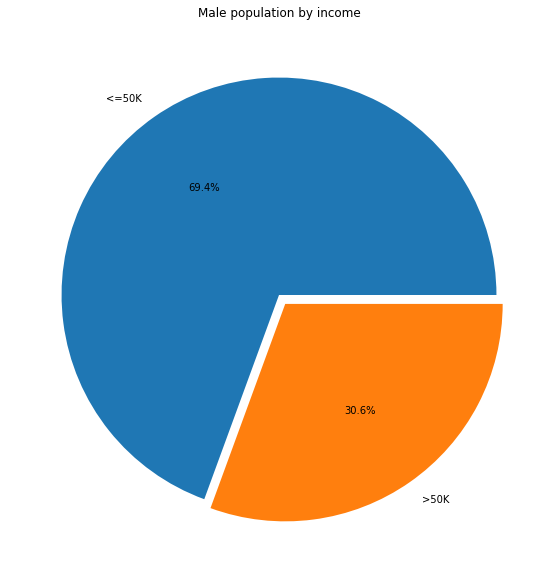

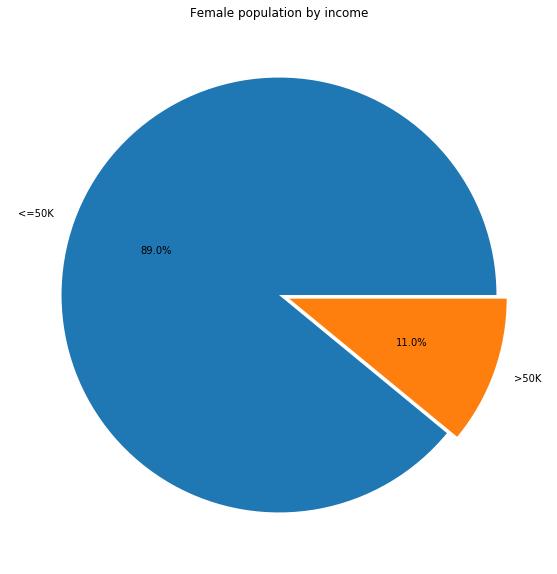

In [112]:
for gender in ["Male","Female"]:
    plt.pie(df[df.sex==gender].groupby("income").income.count().sort_values(ascending=False), autopct="%1.1f%%", labels=["<=50K",">50K"], explode=[0,0.05])
    plt.title("%s population by income"%gender)
    plt.show()

Men are way more likely to have more incomes than women.

[Go back to the top](#start)

## Education level broad analysis <a name="education_broad"></a>

### Set-up <a name="setup"></a>

As always, we are going to use a pre-defined function so we don't overload this notebook by repeting lines of code.

In [113]:
def compare_education(dataframe, column, ascending=False, show_pies=None, n_first=None, first_largest=True):
    """
    Calculates percentages of each education in every class of a given variable in a pandas DataFrame.
    Show it and returns it. 
    :param dataframe: The pandas DataFrame to work with.
    :param column: The column name to analyse.
    :param ascending: Sorts the classes. [default:False]
    [{False}] Sorts from most represented to least represented in size. 
    [{True}] Sorts from least represented to most represented in size. 
    :param show_pies: If True, shows a pie chart for each class. [default:None]
    [{None}]: Will show the pie charts if the number of classes is 5 or less.
    [{True}]: Will show the pie chart of every class.
    [{False}]: Won't show any pie chart.
    :param n_first: Select a subset of the available classes in the column. [default:None]
    [{None}]: Doesn't subset the column and analyses all of its classes. 
    [int]: Analyses only a certain number of classes.
    [float <= 1.0]: Analyses a portion of all available classes in the column. The value {1.0} means all classes.
    :param first_largest: If True, the subset will be the most represented classes in the column. [default:True]
    If False, the least represented only will be selected.
    Is ignored if n_first is {None}.
    """
    
    uniques = dataframe.groupby(column).education.size().sort_values(ascending=False)
    if n_first is not None:
        if isinstance(n_first, float):
            n_first=math.ceil(len(uniques)*n_first)
        if first_largest:
            uniques=uniques[0:n_first]
        else:
            uniques=uniques[-n_first:]
    if ascending==True:
        uniques=uniques.sort_values(ascending=True)
    show_pies = show_pies if show_pies is not None else len(uniques) <=5
    
    mods = {}
    for modularity in uniques.index:
        edu_mod = dataframe[dataframe[column]==modularity].groupby("education").fnlwgt.size().sort_values(ascending=False)
        if show_pies:
            plt.pie(edu_mod, labels = edu_mod.index, autopct="%1.2f%%", explode = np.arange(0,2,2/len(edu_mod)))
            plt.title("Education level of %s %s"%(column, modularity))
            plt.legend()
            plt.show()
        mods[modularity] = edu_mod*100/edu_mod.sum()
    df_comp = pd.DataFrame(mods).T.fillna(0)
    display(df_comp)
    df_comp.plot.bar()
    plt.ylabel("Percents of each class of %s"%column)
    plt.xlabel(column)
    
    title="%s classes by education level"%(column.capitalize() if n_first is None else (str(n_first)+(" most " if first_largest else " least ")+"represented"))
    
    plt.title(title)
    
    plt.gca().yaxis.grid(True, linestyle=":")
    plt.legend()
    return mods

We won't analyse the variable fnlwgt in this section.

[Go back to the top](#start)

## Age influence<a name="edu_age"></a>

10th      11th      12th   1st-4th   5th-6th   7th-8th  \
(32, 48]  1.766337  2.201980  0.823762  0.419802  0.847525  1.251485   
(24, 32]  2.428848  2.726866  1.057965  0.342721  0.908955  1.251676   
(0, 24]   4.836390  9.043510  3.308163  0.251708  0.773103  1.024811   
(48, 60]  3.430726  2.544769  0.980207  0.867107  1.376060  3.298775   
(60, 82]  4.150110  3.267108  0.971302  1.280353  2.030905  7.373068   
(82, 90]  3.030303  3.030303  0.000000  1.515152  3.030303  6.060606   

               9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate    HS-grad  \
(32, 48]  1.219802    3.968317   5.116832  18.867327   1.489109  32.166337   
(24, 32]  1.370884    4.067948   5.111012  21.203993   0.566235  33.124721   
(0, 24]   1.636102    2.319310   2.445164   8.558073   0.017979  29.090255   
(48, 60]  2.016965    2.469369   3.524976  14.514609   2.299717  34.081056   
(60, 82]  3.046358    1.412804   3.046358  12.715232   2.825607  33.509934   
(82, 90]  1.515152    1.515152   1.515152  18.181818   0.000000  36.363636   

           Masters  Preschool  Prof-school  Some-college  
(32, 48]  7.144554   0.118812     2.447525     20.150495  
(24, 32]  3.606020   0.119207     1.311280     20.801669  
(0, 24]   0.377562   0.125854     0.000000     36.192017  
(48, 60]  8.162111   0.226202     2.148916     18.058435  
(60, 82]  5.209713   0.353201     2.737307     16.070640  
(82, 90]  9.090909   0.000000     4.545455     10.606061

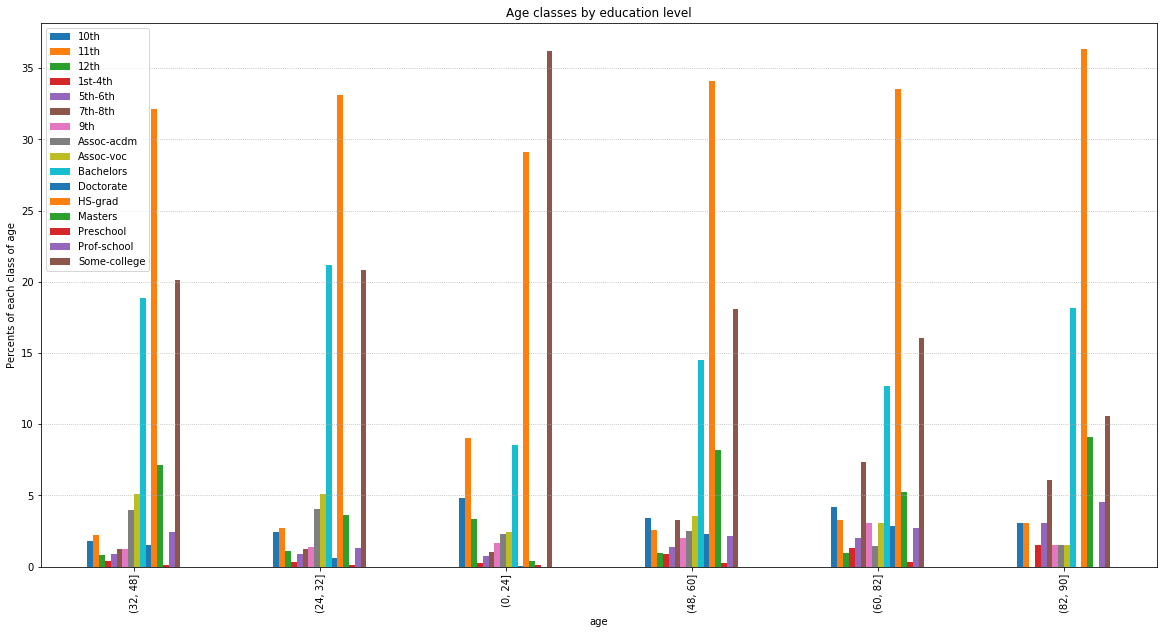

In [114]:
age_comp=compare_education(df, "age")

It is logical to see no PHD owners in the younger age class, but the proportion of 11th grahder 11th grader is very static trhoughout the ages.

The older class seems to go against the trend of bachelors proportion decreasing with age.

Apart from that, there is nothing worth more attention in this graph.

[Go back to the top](#start)

### Workclass influence <a name="edu_workclass"></a>

10th       11th      12th   1st-4th   5th-6th  \
Private            3.065726   4.071460  1.468902  0.591090  1.168946   
Self-emp-not-inc   2.637795   2.362205  0.748031  0.511811  0.748031   
Local-gov          1.481128   1.720019  0.907788  0.191113  0.430005   
Unemployed         5.446623   6.427015  2.178649  0.653595  1.633987   
State-gov          1.001541   1.078582  0.770416  0.077042  0.308166   
Self-emp-inc       1.702509   1.254480  0.627240  0.179211  0.358423   
Federal-gov        0.625000   0.937500  0.520833  0.000000  0.104167   
Without-pay        0.000000   0.000000  0.000000  0.000000  0.000000   
Never-worked      28.571429  14.285714  0.000000  0.000000  0.000000   

                    7th-8th       9th  Assoc-acdm  Assoc-voc  Bachelors  \
Private            1.865902  1.707102    3.215704   4.433172  15.646228   
Self-emp-not-inc   3.700787  1.338583    2.795276   4.251969  15.708661   
Local-gov          1.337793  1.098901    4.204491   4.108935  22.790253   
Unemployed         3.921569  2.777778    2.559913   3.322440   9.422658   
State-gov          0.770416  0.462250    3.158706   3.543914  20.801233   
Self-emp-inc       1.254480  0.896057    3.136201   3.405018  24.462366   
Federal-gov        0.208333  0.312500    5.729167   3.958333  22.083333   
Without-pay        7.142857  0.000000    7.142857   0.000000   0.000000   
Never-worked      14.285714  0.000000    0.000000   0.000000   0.000000   

                  Doctorate    HS-grad    Masters  Preschool  Prof-school  \
Private            0.798412  34.283194   3.939127   0.176445     1.133657   
Self-emp-not-inc   1.968504  34.094488   4.881890   0.000000     5.157480   
Local-gov          1.290014  24.032489  16.340182   0.191113     1.385571   
Unemployed         0.816993  28.976035   2.614379   0.272331     0.980392   
State-gov          6.856703  20.647149  13.020031   0.077042     2.388290   
Self-emp-inc       3.136201  25.000000   7.078853   0.000000     7.258065   
Federal-gov        1.666667  27.395833   6.979167   0.000000     3.020833   
Without-pay        0.000000  64.285714   0.000000   0.000000     0.000000   
Never-worked       0.000000  14.285714   0.000000   0.000000     0.000000   

                  Some-college  
Private              22.434936  
Self-emp-not-inc     19.094488  
Local-gov            18.490205  
Unemployed           27.995643  
State-gov            25.038521  
Self-emp-inc         20.250896  
Federal-gov          26.458333  
Without-pay          21.428571  
Never-worked         28.571429

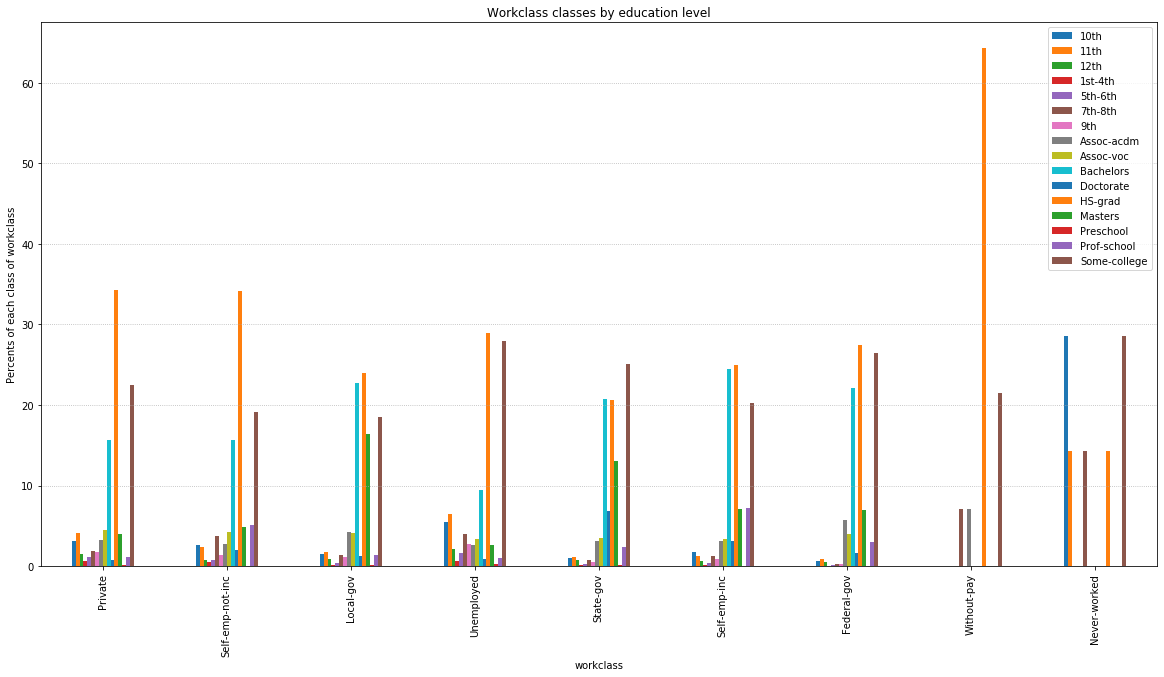

In [115]:
workclass_compare=compare_education(df, "workclass")

Here we can see that the wlass which never worked show a comparatively very high percentage of 10th graders.
It also shares with the "withou-pay" and "unemployed" a significatnly lower proportion of bachelors.

Governement workers have a high proportion of Masters.

11th graders and "some college" classes seem to have the least predictible employment outcome.

[Go back to the top](#start)

### Marital status influence <a name="edu_status"></a>

10th      11th      12th   1st-4th   5th-6th  \
Married-civ-spouse     2.331797  2.365203  0.868578  0.541191  1.149195   
Never-married          3.384269  5.493578  2.174932  0.346864  0.824974   
Divorced               2.702094  2.927269  0.878181  0.225175  0.450349   
Separated              4.780488  4.682927  1.365854  0.878049  1.756098   
Widowed                3.927492  3.826788  1.007049  1.711984  1.409869   
Married-spouse-absent  3.588517  4.545455  1.913876  2.870813  4.784689   
Married-AF-spouse      0.000000  0.000000  0.000000  0.000000  0.000000   

                        7th-8th       9th  Assoc-acdm  Assoc-voc  Bachelors  \
Married-civ-spouse     2.391929  1.536714    3.073428   4.603461  18.480657   
Never-married          1.059342  1.453080    3.159276   3.393644  16.808850   
Divorced               1.643774  1.441117    4.571043   5.269084  12.294528   
Separated              2.243902  3.219512    2.926829   4.097561   8.975610   
Widowed                6.445116  2.316213    2.316213   4.128902   8.257805   
Married-spouse-absent  3.349282  2.153110    2.870813   3.110048  16.267943   
Married-AF-spouse      0.000000  0.000000    8.695652   4.347826  17.391304   

                       Doctorate    HS-grad   Masters  Preschool  Prof-school  \
Married-civ-spouse      1.910871  32.344491  6.701410   0.133627     2.752723   
Never-married           0.684354  28.930346  3.778007   0.196869     0.871848   
Divorced                0.743076  36.298131  5.246566   0.022517     1.238460   
Separated               0.682927  39.609756  2.439024   0.097561     0.780488   
Widowed                 0.704935  41.691843  4.128902   0.302115     0.503525   
Married-spouse-absent   1.674641  28.947368  4.066986   0.956938     0.717703   
Married-AF-spouse       0.000000  56.521739  0.000000   0.000000     0.000000   

                       Some-college  
Married-civ-spouse        18.814726  
Never-married             27.439768  
Divorced                  24.048638  
Separated                 21.463415  
Widowed                   17.321249  
Married-spouse-absent     18.181818  
Married-AF-spouse         13.043478

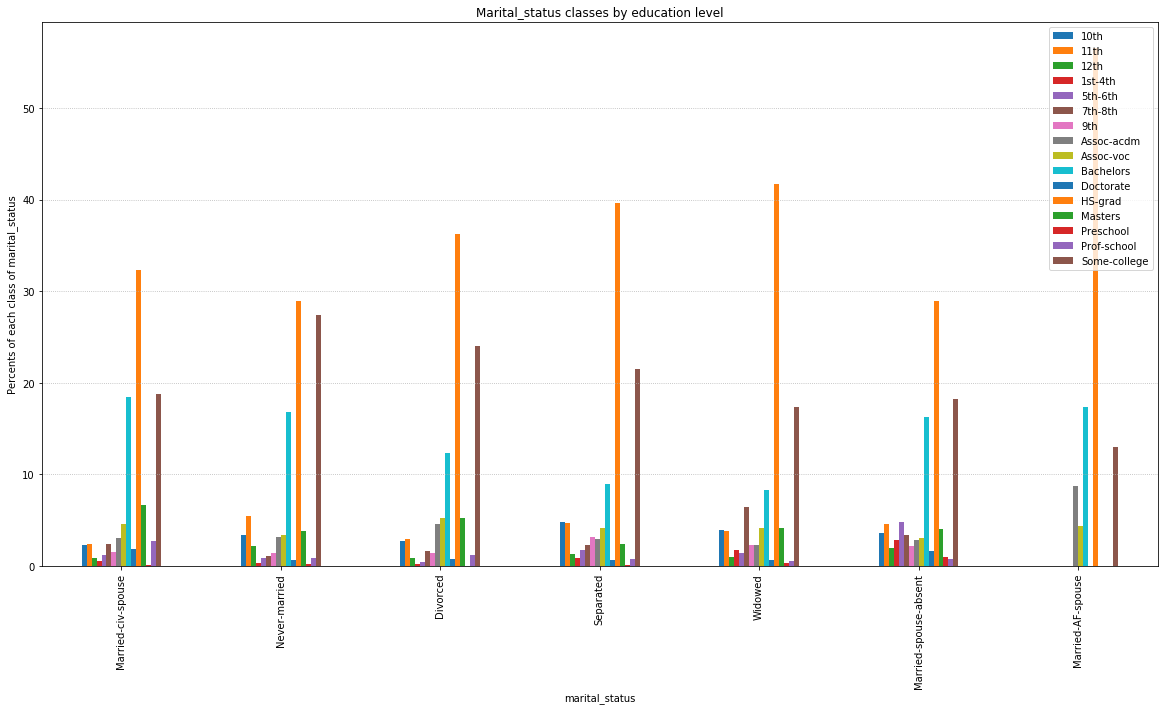

In [116]:
status_compare=compare_education(df, "marital_status")

Married-af-spouse class miss lacks of the education level available in this dataset.

[Go back to the top](#start)

### Occupation influence <a name="edu_occupation"></a>

10th      11th       12th   1st-4th   5th-6th  \
Prof-specialty     0.217602  0.483559   0.241779  0.096712  0.024178   
Craft-repair       4.152418  4.274548   1.416707  0.561798  1.050318   
Exec-managerial    0.590551  0.836614   0.319882  0.098425  0.024606   
Adm-clerical       1.008493  1.778132   1.008493  0.000000  0.159236   
Sales              2.220395  3.947368   1.288377  0.219298  0.328947   
Other-service      5.894865  7.231844   2.582802  1.215436  1.944698   
Machine-op-inspct  5.050000  4.950000   1.750000  1.150000  2.800000   
None               5.534455  6.456864   2.170374  0.651112  1.627781   
Transport-moving   5.259862  5.760802   2.442079  0.500939  1.753287   
Handlers-cleaners  5.186267  8.984660   2.775749  1.168736  2.848795   
Farming-fishing    4.435484  3.729839   1.612903  1.814516  3.629032   
Tech-support       0.323625  0.647249   0.323625  0.000000  0.107875   
Protective-serv    0.924499  1.078582   0.924499  0.154083  0.154083   
Priv-house-serv    4.081633  9.523810   2.721088  6.122449  9.523810   
Armed-Forces       0.000000  0.000000  11.111111  0.000000  0.000000   

                    7th-8th       9th  Assoc-acdm  Assoc-voc  Bachelors  \
Prof-specialty     0.217602  0.072534    3.336557   4.110251  36.121857   
Craft-repair       2.808989  2.344895    2.808989   6.155349   5.495848   
Exec-managerial    0.467520  0.319882    3.567913   3.690945  33.661417   
Adm-clerical       0.291932  0.371550    5.122081   4.432059  13.428875   
Sales              0.794956  0.877193    3.947368   2.905702  22.149123   
Other-service      2.977818  3.068976    2.370100   3.494379   5.499848   
Machine-op-inspct  4.650000  3.800000    1.650000   3.150000   3.450000   
None               3.960933  2.767227    2.550190   3.309821   9.386869   
Transport-moving   3.757044  2.191609    1.690670   2.504696   3.882279   
Handlers-cleaners  3.360117  3.579255    1.753104   2.045289   3.652301   
Farming-fishing    7.056452  2.822581    1.411290   5.241935   7.762097   
Tech-support       0.539374  0.215750    7.874865  13.592233  24.811219   
Protective-serv    1.386749  0.616333    5.238829   7.395994  15.408320   
Priv-house-serv    5.442177  6.802721    1.360544   2.721088   4.761905   
Armed-Forces       0.000000  0.000000    0.000000   0.000000  11.111111   

                   Doctorate    HS-grad    Masters  Preschool  Prof-school  \
Prof-specialty      7.761122   5.633462  20.382012   0.024178    10.928433   
Craft-repair        0.048852  46.897899   0.537372   0.097704     0.170982   
Exec-managerial     1.353346  19.857283  12.327756   0.000000     1.279528   
Adm-clerical        0.132696  36.226115   1.804671   0.053079     0.238854   
Sales               0.219298  29.276316   3.673246   0.000000     0.493421   
Other-service       0.030386  38.863567   0.577332   0.455789     0.121544   
Machine-op-inspct   0.050000  51.050000   0.400000   0.550000     0.050000   
None                0.813890  28.920239   2.604449   0.271297     0.976668   
Transport-moving    0.062617  51.659361   0.626174   0.000000     0.187852   
Handlers-cleaners   0.000000  44.631118   0.365230   0.146092     0.000000   
Farming-fishing     0.100806  40.625000   1.008065   0.806452     0.403226   
Tech-support        0.323625  17.152104   3.991370   0.000000     0.755124   
Protective-serv     0.000000  33.127889   2.311248   0.000000     0.154083   
Priv-house-serv     0.000000  34.013605   0.680272   1.360544     0.000000   
Armed-Forces        0.000000  44.444444  11.111111   0.000000     0.000000   

                   Some-college  
Prof-specialty        10.348162  
Craft-repair          21.177333  
Exec-managerial       21.604331  
Adm-clerical          33.943737  
Sales                 27.658991  
Other-service         23.670617  
Machine-op-inspct     15.500000  
None                  27.997830  
Transport-moving      17.720726  
Handlers-cleaners     19.503287  
Farming-fishing       17.540323  
Tech-support

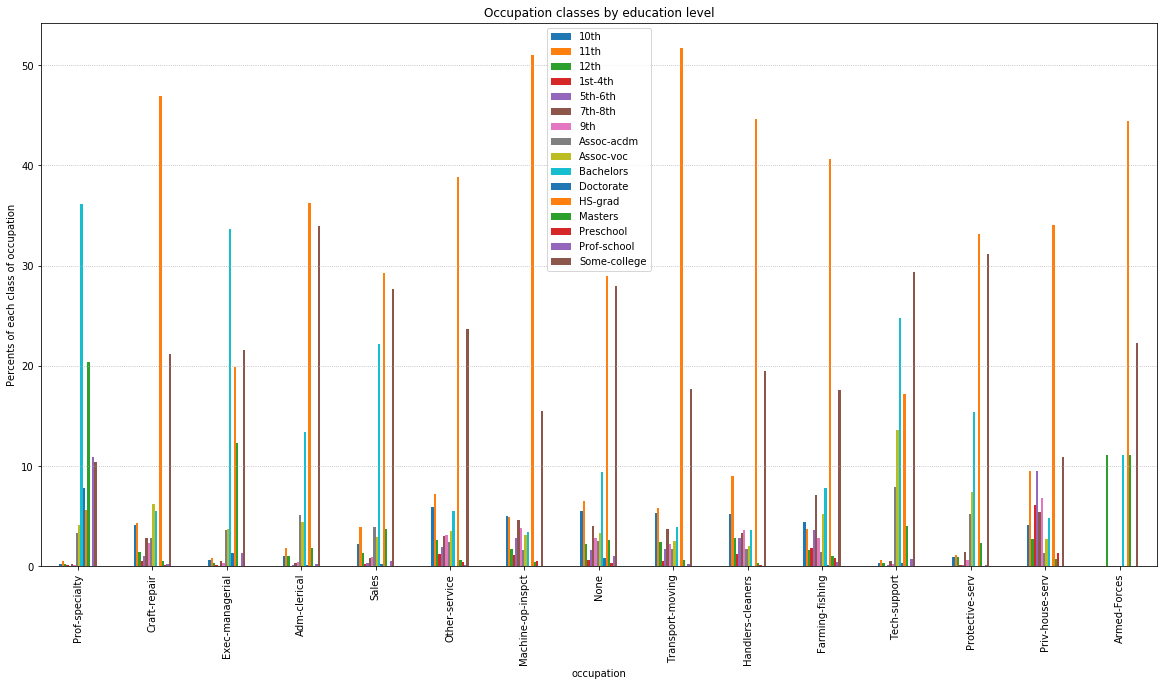

In [117]:
occupation_compare=compare_education(df, "occupation")

Transport sectors, machine operators and craft reparators show high percentage of HS-grad.

Professors and executives have the highest percentage of bachelors.

[Go back to the top](#start)

### Relationship influence <a name="edu_relationship"></a>

10th      11th      12th   1st-4th   5th-6th   7th-8th  \
Husband         2.373730  2.358562  0.781132  0.530866  1.129986  2.517822   
Not-in-family   2.532562  2.544621  1.169802  0.578871  0.832127  1.664255   
Own-child       4.443128  8.412322  3.041074  0.177725  0.296209  0.967615   
Unmarried       3.280116  4.005806  1.103048  0.551524  1.306241  2.119013   
Wife            1.851852  1.915709  1.149425  0.255428  0.893997  1.277139   
Other-relative  4.383282  6.014271  2.344546  1.630989  4.077472  3.363914   

                     9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  \
Husband         1.531928    2.881844   4.519945  18.451388   2.009707   
Not-in-family   1.338640    3.991799   4.232996  20.055475   1.157742   
Own-child       1.579779    2.586888   2.843602  10.327804   0.138231   
Unmarried       2.031930    3.889695   5.341074   9.927431   0.638607   
Wife            1.340996    4.853129   5.300128  19.348659   1.277139   
Other-relative  3.058104    1.529052   2.446483   8.868502   0.305810   

                  HS-grad   Masters  Preschool  Prof-school  Some-college  
Husband         32.420749  6.719248   0.106173     2.919763     18.747156  
Not-in-family   30.306319  6.222865   0.241196     1.483357     21.647371  
Own-child       29.699842  1.105845   0.118483     0.276461     33.984992  
Unmarried       38.084180  4.092888   0.058055     0.696662     22.873730  
Wife            31.800766  7.151980   0.191571     1.660281     19.731801  
Other-relative  39.857288  1.121305   0.509684     0.407747     20.081549

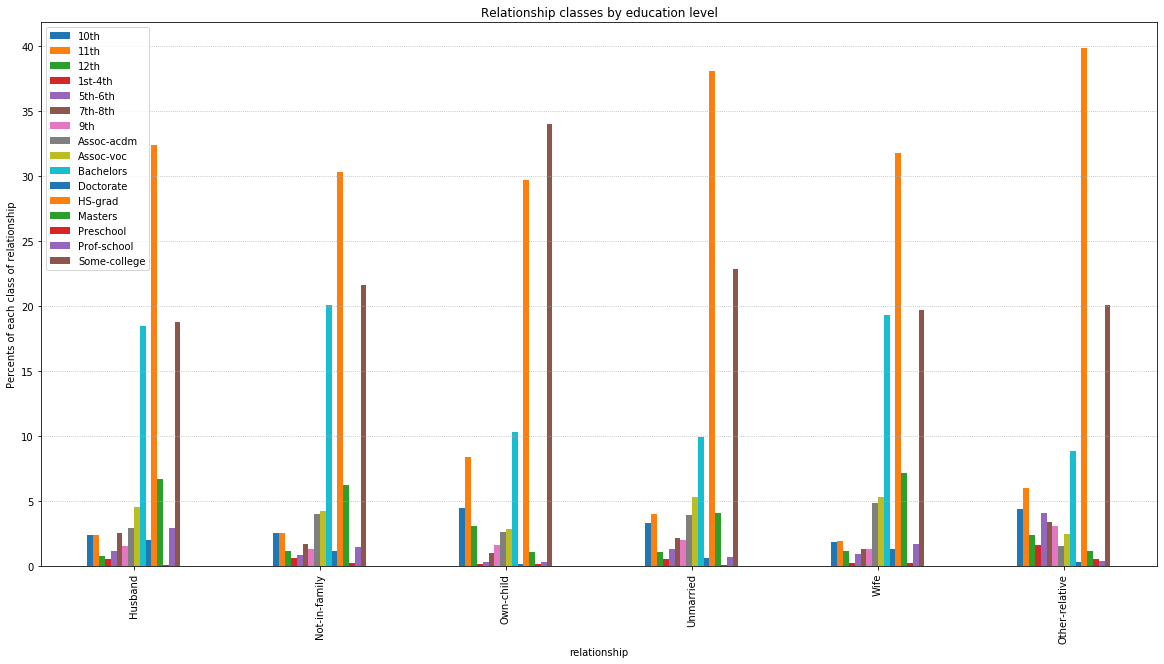

In [118]:
relationship_compire=compare_education(df, "relationship")

Husband and wives are very similar in education, although wives tends to be more often from association background than husbands.

Unmarried child owners have a higher tendency to have some college education..

Unmarried and single people don't show as a high percentage of bachelors.

[Go back to the top](#start)

### Ethinicity influence <a name="edu_ethnicity"></a>

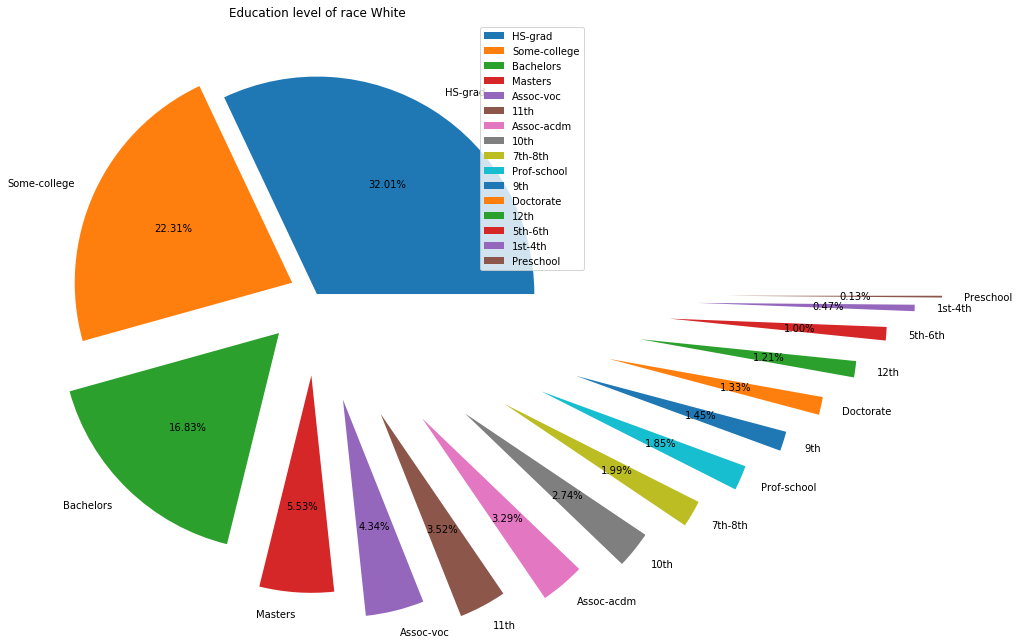

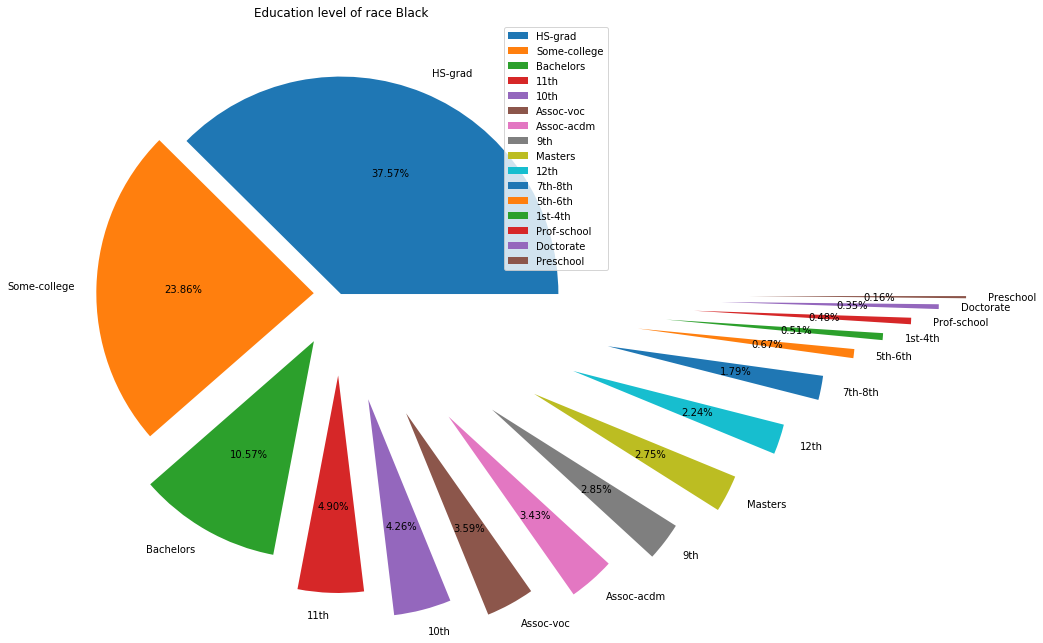

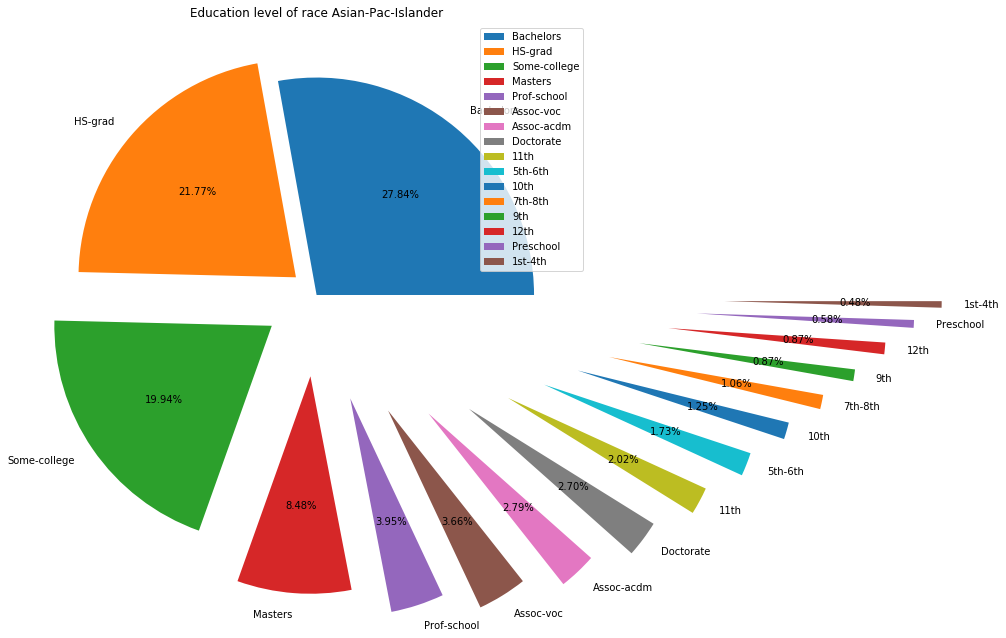

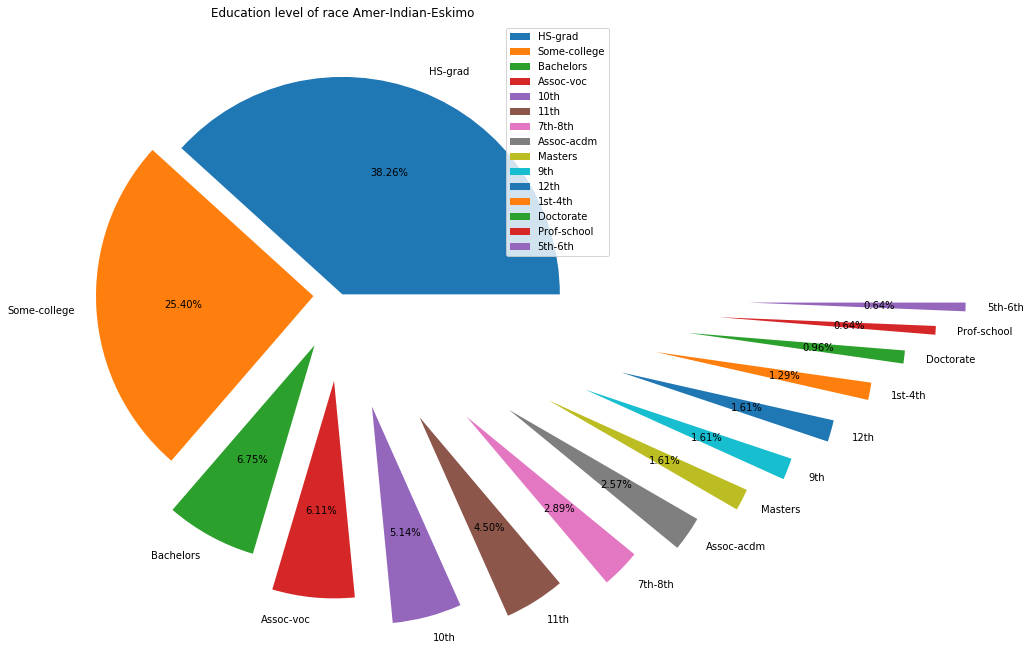

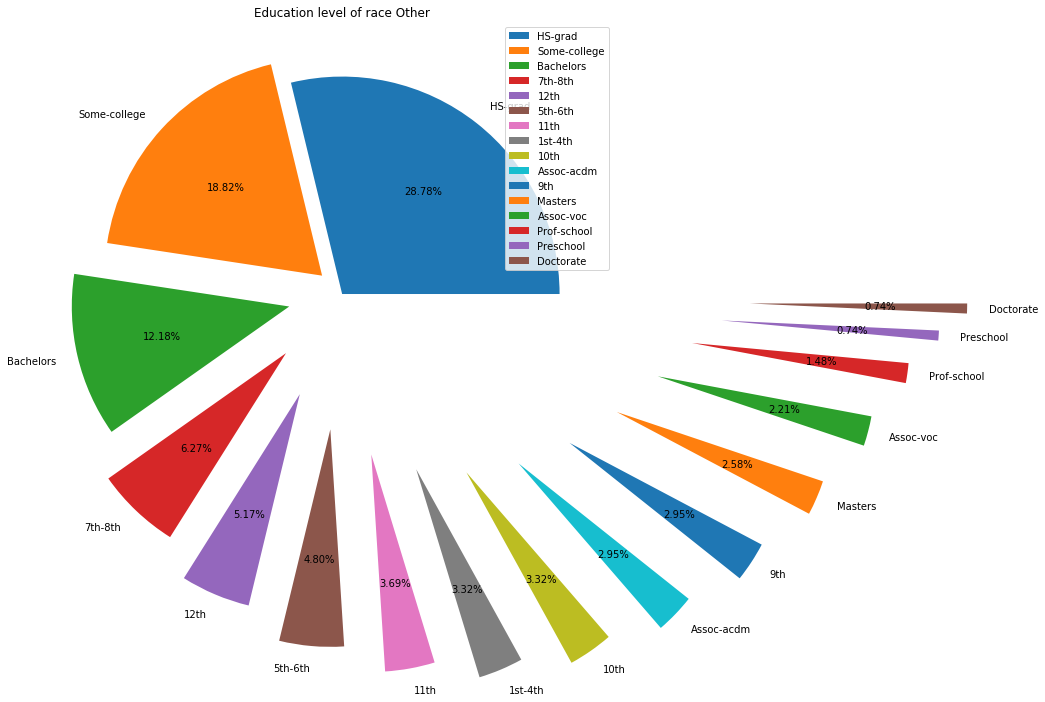

10th      11th      12th   1st-4th   5th-6th  \
White               2.741796  3.515400  1.205383  0.474957  1.000288   
Black               4.260090  4.900705  2.242152  0.512492  0.672646   
Asian-Pac-Islander  1.252408  2.023121  0.867052  0.481696  1.734104   
Amer-Indian-Eskimo  5.144695  4.501608  1.607717  1.286174  0.643087   
Other               3.321033  3.690037  5.166052  3.321033  4.797048   

                     7th-8th       9th  Assoc-acdm  Assoc-voc  Bachelors  \
White               1.986183  1.450058    3.292314   4.342976  16.832182   
Black               1.793722  2.850737    3.427290   3.587444  10.570147   
Asian-Pac-Islander  1.059730  0.867052    2.793834   3.660886  27.842004   
Amer-Indian-Eskimo  2.893891  1.607717    2.572347   6.109325   6.752412   
Other               6.273063  2.952030    2.952030   2.214022  12.177122   

                    Doctorate    HS-grad   Masters  Preschool  Prof-school  \
White                1.327720  32.012809  5.526770   0.133132     1.849453   
Black                0.352338  37.572069  2.754644   0.160154     0.480461   
Asian-Pac-Islander   2.697495  21.772640  8.477842   0.578035     3.949904   
Amer-Indian-Eskimo   0.964630  38.263666  1.607717   0.000000     0.643087   
Other                0.738007  28.782288  2.583026   0.738007     1.476015   

                    Some-college  
White                  22.308578  
Black                  23.862908  
Asian-Pac-Islander     19.942197  
Amer-Indian-Eskimo     25.401929  
Other                  18.819188

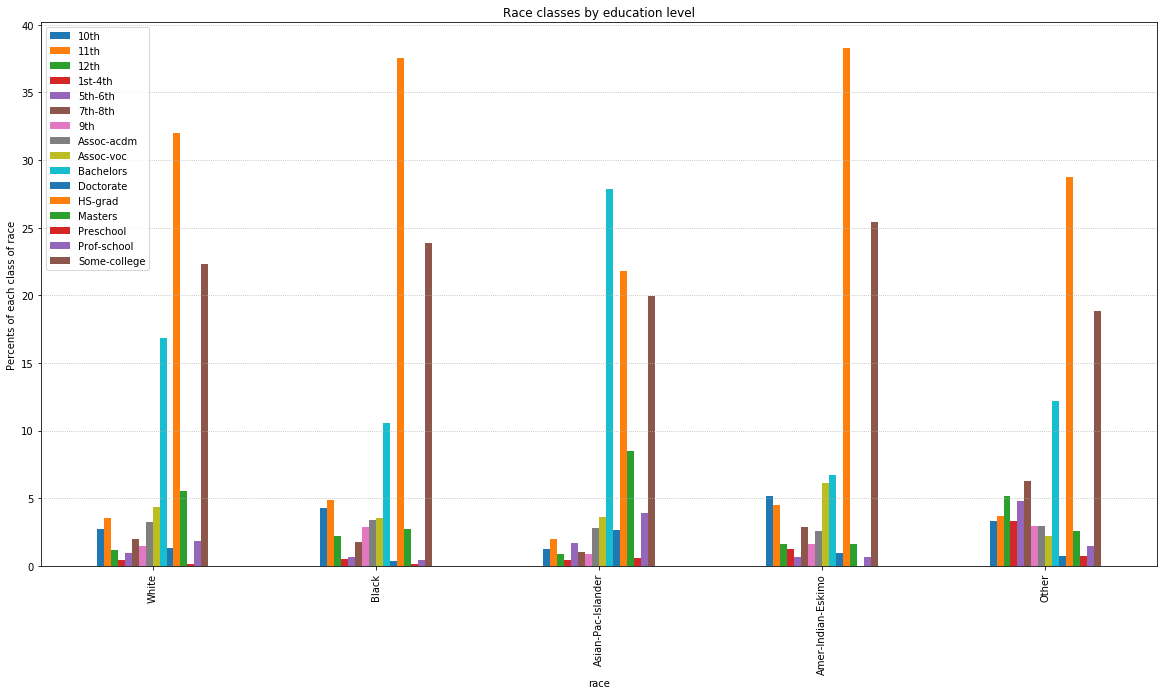

In [119]:
race_compare=compare_education(df, "race")

Asian and pacific islanders in the US more significantly own the highest level degrees.

[Go back to the top](#start)

### Gender influence <a name="edu_gender"></a>

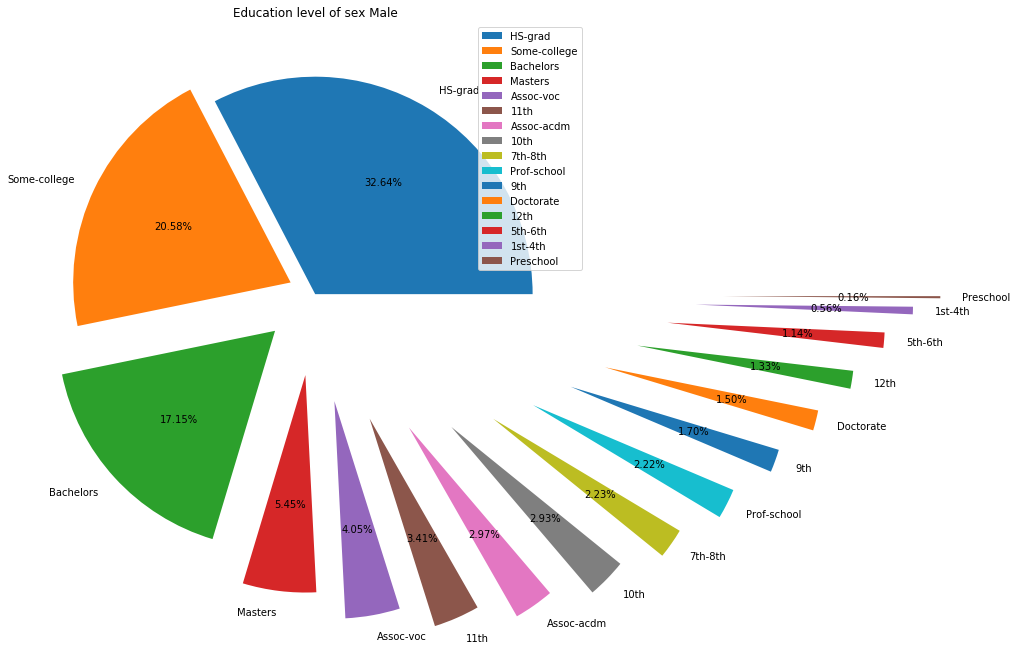

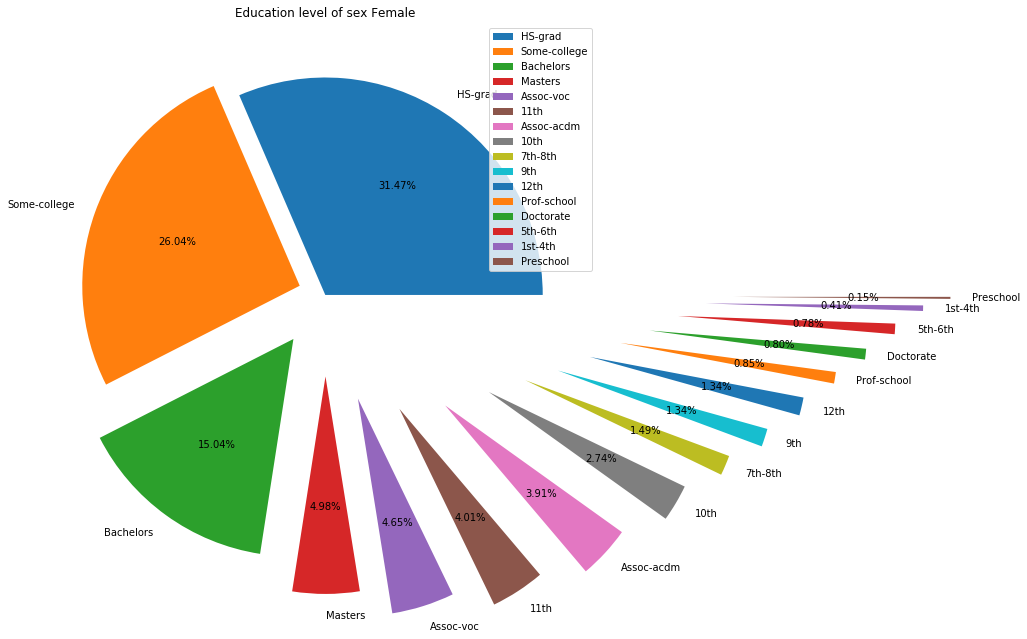

10th      11th      12th   1st-4th   5th-6th   7th-8th       9th  \
Male    2.930235  3.412483  1.327332  0.560327  1.139025  2.227530  1.699352   
Female  2.741381  4.014497  1.338166  0.408884  0.780597  1.486851  1.338166   

        Assoc-acdm  Assoc-voc  Bachelors  Doctorate    HS-grad   Masters  \
Male      2.966977   4.050889  17.145088   1.501860  32.636752  5.447113   
Female    3.912276   4.646408  15.035777   0.799182  31.474770  4.980950   

        Preschool  Prof-school  Some-college  
Male     0.156157     2.222937     20.575943  
Female   0.148685     0.854939     26.038472

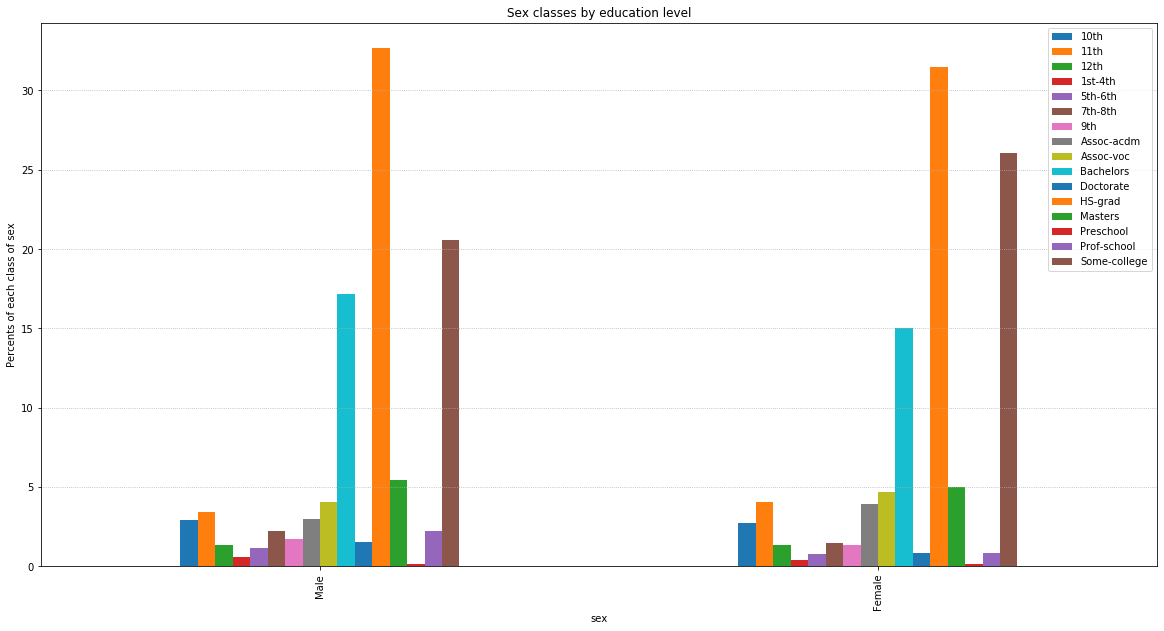

In [120]:
sex_compare=compare_education(df, "sex")

The education levels of both genders are very similar.

[Go back to the top](#start)

### Capital gain influence <a name="edu_cap_gain"></a>

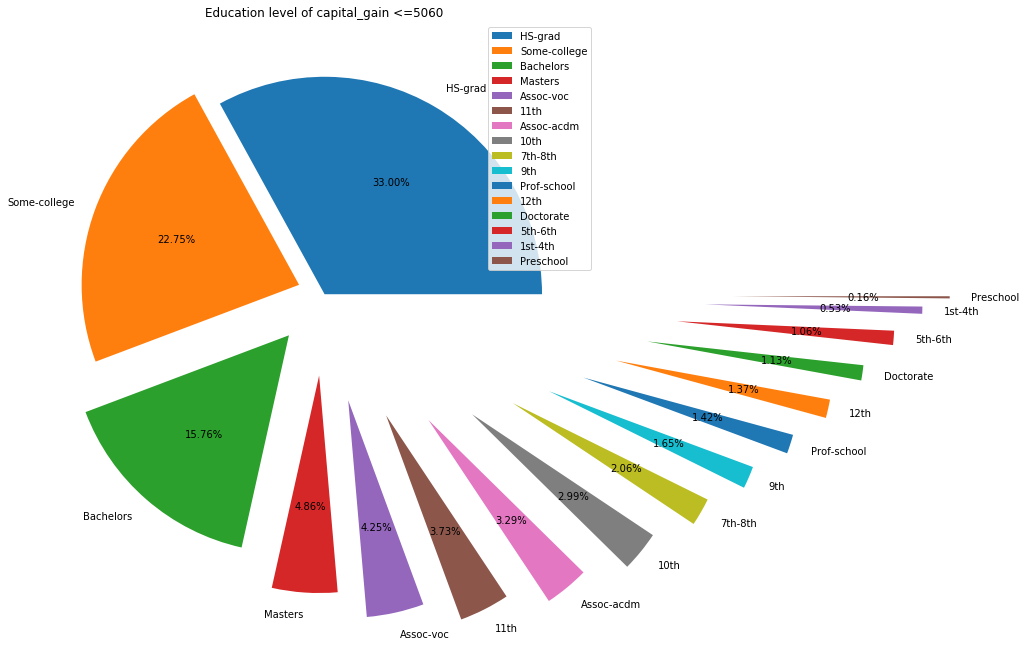

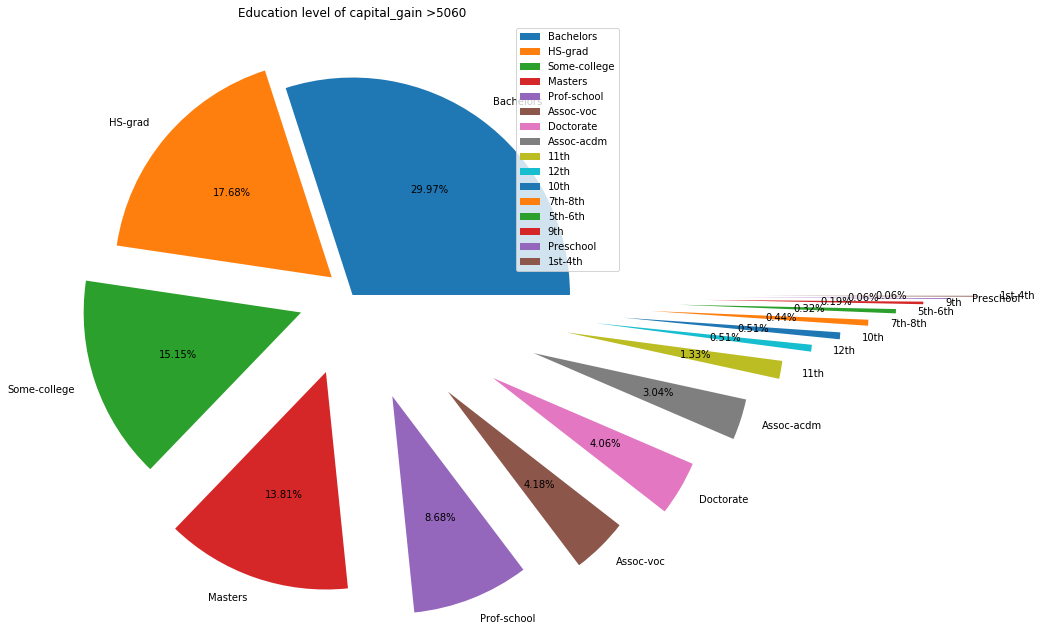

10th      11th      12th   1st-4th   5th-6th   7th-8th       9th  \
<=5060  2.988112  3.727872  1.372916  0.533015  1.056338  2.060990  1.650730   
>5060   0.506971  1.330798  0.506971  0.063371  0.316857  0.443599  0.190114   

        Assoc-acdm  Assoc-voc  Bachelors  Doctorate    HS-grad    Masters  \
<=5060    3.291769   4.251195  15.757850   1.127407  32.995219   4.858509   
>5060     3.041825   4.182510  29.974651   4.055767  17.680608  13.814956   

        Preschool  Prof-school  Some-college  
<=5060   0.158289     1.418142     22.751647  
>5060    0.063371     8.681876     15.145754

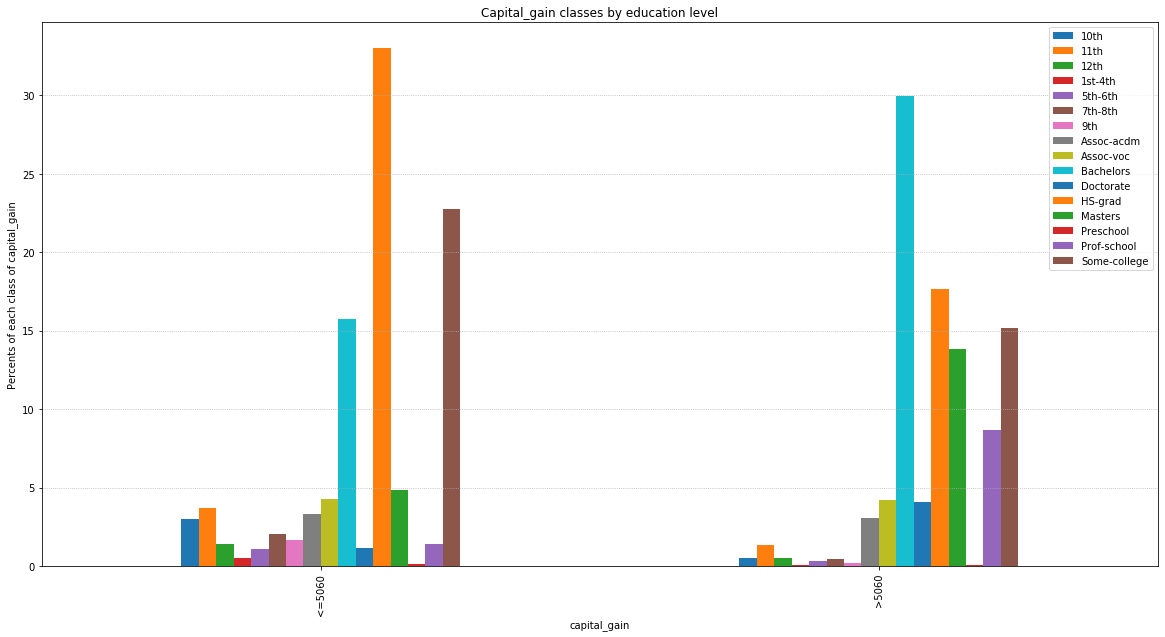

In [121]:
capgain_compare=compare_education(df, "capital_gain")

Higher capital gains clearly show higher level degrees. But this plot also shows that having some college is less discriminative to he capital_gain. 

[Go back to the top](#start)

### Capital loss influence <a name="edu_cap_loss"></a>

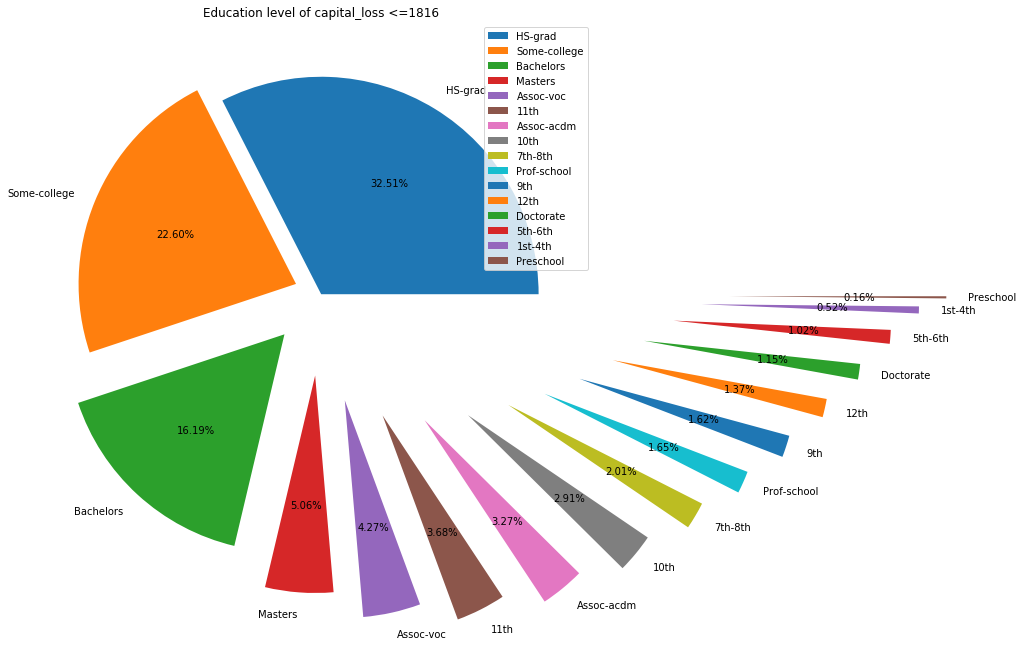

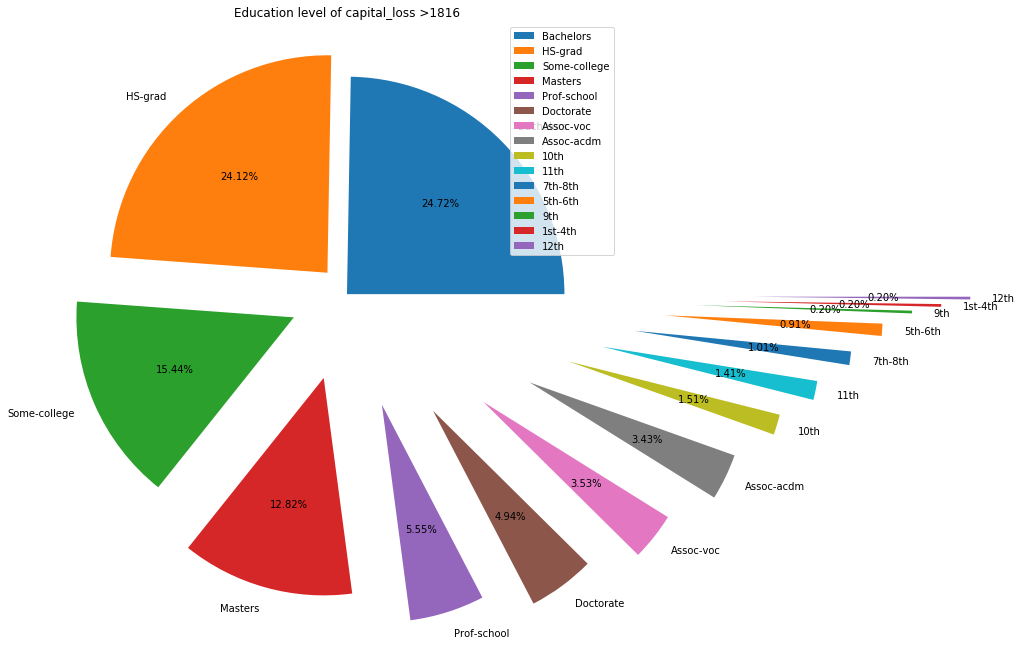

10th      11th      12th   1st-4th   5th-6th   7th-8th       9th  \
<=1816  2.910313  3.680690  1.366389  0.519925  1.023999  2.013125  1.623181   
>1816   1.513623  1.412714  0.201816  0.201816  0.908174  1.009082  0.201816   

        Assoc-acdm  Assoc-voc  Bachelors  Doctorate    HS-grad    Masters  \
<=1816    3.274895   4.270361  16.187427   1.153980  32.508005   5.056589   
>1816     3.430878   3.531786  24.722503   4.944501  24.117053  12.815338   

        Preschool  Prof-school  Some-college  
<=1816   0.158514     1.651714     22.600894  
>1816    0.000000     5.549950     15.438951

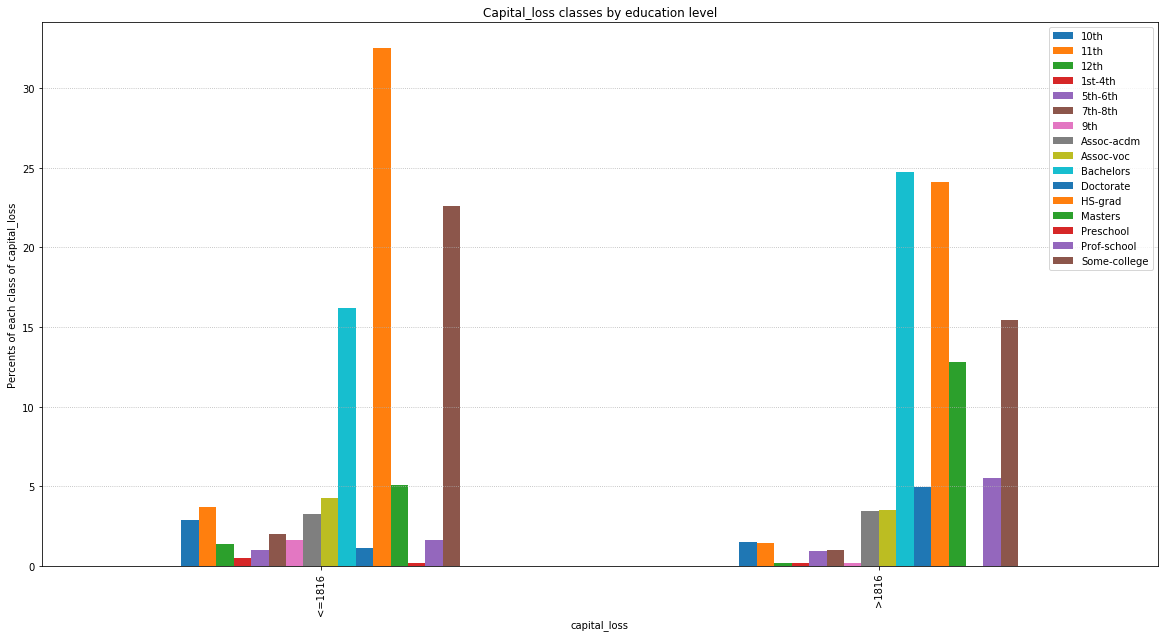

In [122]:
caploss_compare=compare_education(df, "capital_loss")

Capital loss influence is very similar to capital_gain's.

[Go back to the top](#start)

### Hours per week influence <a name="edu_hours"></a>

Let's use our repartition from the variable analysis.

10th       11th      12th   1st-4th   5th-6th    7th-8th  \
(35, 40]   2.903326   3.133354  1.305564  0.509792  1.305564   2.045384   
(45, 50]   1.460063   1.774979  0.744346  0.257658  0.515316   1.545949   
(40, 45]   1.761573   1.597706  0.655469  0.327735  0.532569   1.147071   
(30, 35]   3.488372   3.427173  1.529988  0.979192  1.223990   2.692778   
(55, 60]   1.850709   2.159161  0.431832  0.123381  0.493523   1.357187   
(15, 20]   3.813833  10.277957  3.361345  0.840336  0.840336   1.809955   
(25, 30]   4.534973   4.996157  1.921599  0.538048  0.768640   2.613374   
(20, 25]   3.842365   6.206897  2.463054  0.886700  1.083744   2.364532   
(50, 55]   0.989011   1.648352  1.318681  0.659341  0.659341   1.318681   
(10, 15]   6.987578  13.509317  2.484472  0.621118  1.242236   1.242236   
(5, 10]    5.871212   9.090909  2.462121  0.189394  1.136364   4.166667   
(65, 70]   4.012346   2.160494  0.308642  0.617284  0.617284   1.543210   
(60, 65]   2.083333   3.819444  0.000000  0.347222  0.347222   1.388889   
(0, 5]     4.878049   7.317073  0.000000  0.975610  0.487805   4.878049   
(75, 80]   3.333333   0.666667  0.000000  1.333333  0.000000   2.000000   
(70, 75]   0.714286   2.142857  0.714286  0.000000  2.857143   5.000000   
(95, 100]  4.854369   0.970874  1.941748  0.970874  0.000000   6.796117   
(80, 85]   1.612903   3.225806  3.225806  1.612903  1.612903   4.838710   
(85, 90]   5.555556   5.555556  0.000000  0.000000  0.000000   0.000000   
(90, 95]   0.000000   0.000000  0.000000  0.000000  0.000000  14.285714   

                9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate    HS-grad  \
(35, 40]   1.771837    3.226609   4.936276  14.989120   0.814423  36.151694   
(45, 50]   1.259662    3.292299   3.979387  23.675923   2.233038  27.769825   
(40, 45]   1.351905    4.219582   4.465383  23.924621   1.474805  28.963540   
(30, 35]   1.897185    3.182375   3.365973  14.381885   0.795594  33.782130   
(55, 60]   0.431832    3.454658   4.750154  20.913017   3.639729  26.896977   
(15, 20]   1.809955    2.908856   2.003878  10.407240   0.581771  25.210084   
(25, 30]   1.383551    2.997694   3.151422  11.222137   0.691776  33.973866   
(20, 25]   2.561576    3.349754   2.463054   8.472906   0.788177  29.162562   
(50, 55]   0.769231    3.516484   4.175824  24.395604   1.978022  26.703297   
(10, 15]   2.173913    2.329193   2.329193  10.093168   0.465839  20.652174   
(5, 10]    1.136364    2.462121   1.893939  13.446970   1.136364  21.590909   
(65, 70]   1.543210    2.160494   1.851852  19.753086   4.012346  31.790123   
(60, 65]   0.694444    2.430556   4.861111  17.361111   3.125000  27.777778   
(0, 5]     2.439024    7.317073   4.390244  12.195122   1.951220  25.853659   
(75, 80]   0.000000    4.666667   2.666667  16.000000   4.000000  30.000000   
(70, 75]   0.714286    2.142857   2.857143  15.714286   1.428571  28.571429   
(95, 100]  0.970874    3.883495   4.854369  10.679612   6.796117  28.155340   
(80, 85]   1.612903    0.000000   6.451613   4.838710   1.612903  46.774194   
(85, 90]   0.000000    2.777778   5.555556  13.888889   2.777778  36.111111   
(90, 95]   0.000000    0.000000   0.000000   0.000000   0.000000  42.857143   

            Masters  Preschool  Prof-school  Some-college  
(35, 40]   4.451352   0.167858     0.951197     21.336649  
(45, 50]   8.302319   0.057257     3.492700     19.639279  
(40, 45]   7.578861   0.000000     1.925440     20.073740  
(30, 35]   4.957160   0.244798     1.591187     22.460220  
(55, 60]   8.451573   0.061690     4.503393     20.481184  
(15, 20]   3.102780   0.129282     0.840336     32.062056  
(25, 30]   2.613374   0.307456     1.383551     26.902383  
(20, 25]   2.561576   0.394089     0.886700     32.512315  
(50, 55]   8.131868   0.000000     4.505495     19.230769  
(10, 15]   2.329193   0.310559     0.621118     32.608696  
(5, 10]    3.409091   0.378788     1.515152     30.113636  
(65, 70]   8.950617   0.000000     4.012346     16.666667  

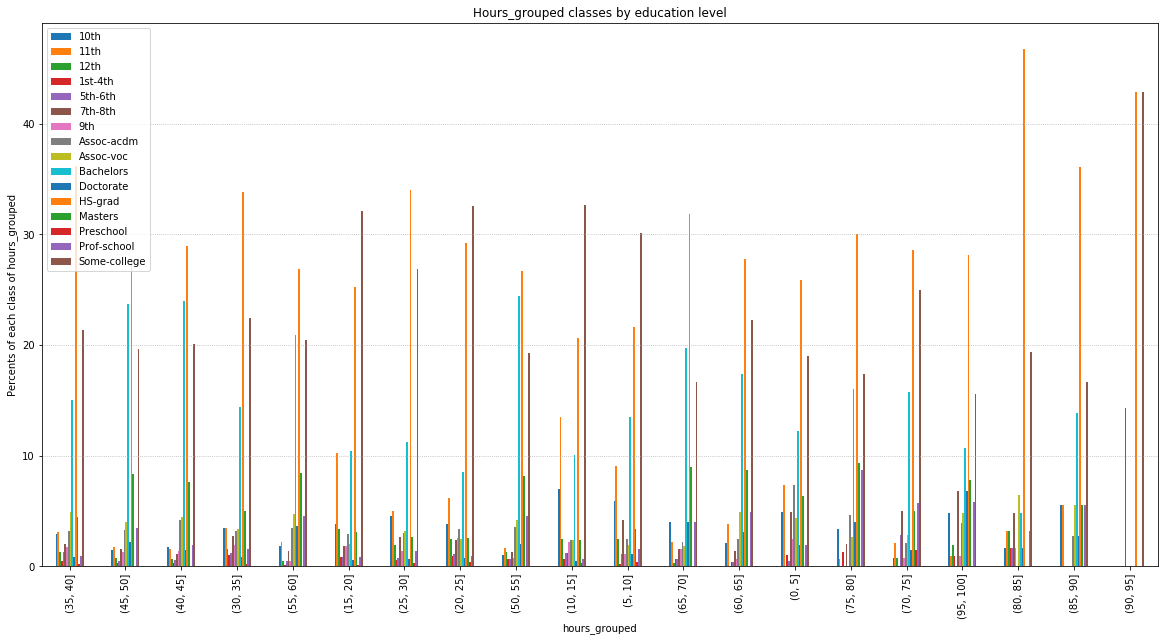

In [123]:
hours_comp=compare_education(pd.concat([df, pd.cut(df.hours_per_week, np.arange(0,105,5)).rename("hours_grouped")], axis=1), "hours_grouped")

It seems that people who work more than 80 hours a week are most likely graduated from High School or dropped out from college.

Phd owners are more prevalent in the people who work more than 95 hours a week.

[Go back to the top](#start)

### Birth location influence <a name="edu_birth"></a>

#### By country <a name="edu_country"></a>

10th      11th      12th    1st-4th    5th-6th  \
United-States       2.908991  3.660252  1.252101   0.157799   0.332750   
Mexico              3.912363  4.068858  2.503912  10.015649  23.004695   
Unknown             2.065404  1.376936  2.753873   0.860585   2.581756   
Philippines         0.505051  3.030303  0.000000   1.010101   3.535354   
Germany             0.729927  2.919708  2.189781   0.000000   0.000000   
Canada              1.652893  4.132231  1.652893   0.000000   0.826446   
Puerto-Rico         2.631579  7.017544  1.754386   2.631579   5.263158   
El-Salvador         3.773585  4.716981  1.886792   9.433962  17.924528   
India               2.000000  6.000000  0.000000   0.000000   0.000000   
Cuba                2.105263  1.052632  3.157895   3.157895   4.210526   
England             2.222222  1.111111  1.111111   1.111111   1.111111   
Jamaica             2.469136  4.938272  2.469136   0.000000   1.234568   
South               0.000000  3.750000  0.000000   0.000000   0.000000   
China               4.000000  0.000000  0.000000   0.000000   0.000000   
Italy               1.369863  0.000000  6.849315   5.479452  13.698630   
Dominican-Republic  5.714286  5.714286  7.142857   8.571429   2.857143   
Vietnam             4.477612  4.477612  1.492537   2.985075   2.985075   
Guatemala           6.451613  6.451613  3.225806  11.290323  12.903226   
Japan               1.612903  0.000000  0.000000   0.000000   0.000000   
Poland              0.000000  3.333333  0.000000   1.666667   0.000000   
Columbia            5.084746  1.694915  3.389831   1.694915   3.389831   

                      7th-8th       9th  Assoc-acdm  Assoc-voc  Bachelors  \
United-States        1.708346  1.355014    3.368667   4.421804  16.345923   
Mexico               8.294210  8.294210    0.469484   1.408451   4.225352   
Unknown              3.270224  1.376936    2.065404   2.753873  24.784854   
Philippines          0.505051  1.515152    3.030303   3.030303  37.878788   
Germany              1.459854  0.000000    3.649635   7.299270  24.817518   
Canada               1.652893  2.479339    0.826446   5.785124  19.834711   
Puerto-Rico          9.649123  3.508772    1.754386   1.754386  11.403509   
El-Salvador          3.773585  9.433962    2.830189   0.000000   4.716981   
India                0.000000  1.000000    3.000000   2.000000  21.000000   
Cuba                 6.315789  3.157895    3.157895   2.105263  17.894737   
England              0.000000  0.000000    5.555556   3.333333  25.555556   
Jamaica              0.000000  2.469136    8.641975   3.703704   9.876543   
South                1.250000  0.000000    0.000000   3.750000  28.750000   
China                5.333333  2.666667    0.000000   0.000000  28.000000   
Italy                5.479452  0.000000    5.479452   1.369863  16.438356   
Dominican-Republic  12.857143  8.571429    0.000000   1.428571   4.285714   
Vietnam              1.492537  1.492537    1.492537   2.985075  20.895522   
Guatemala           14.516129  6.451613    0.000000   1.612903   1.612903   
Japan                0.000000  0.000000    1.612903   3.225806  30.645161   
Poland               5.000000  1.666667    5.000000   3.333333  18.333333   
Columbia             1.694915  5.084746    6.779661   8.474576   6.779661   

                    Doctorate    HS-grad    Masters  Preschool  Prof-school  \
United-States        1.125176  33.257864   5.234812   0.058317     1.722068   
Mexico               0.156495  20.187793   0.782473   2.503912     0.312989   
Unknown              3.958692  22.719449   8.433735   0.172117     2.925990   
Philippines          0.000000  16.161616   3.535354   0.505051     5.050505   
Germany              4.379562  21.167883   3.649635   0.000000     2.919708   
Canada               6.611570  25.619835   6.611570   0.000000     1.652893   
Puerto-Rico          0.000000  34.210526   0.000000   0.877193     0.000000   
El-Salvador          0.943396  19.811321   2.830189   3.773585     0

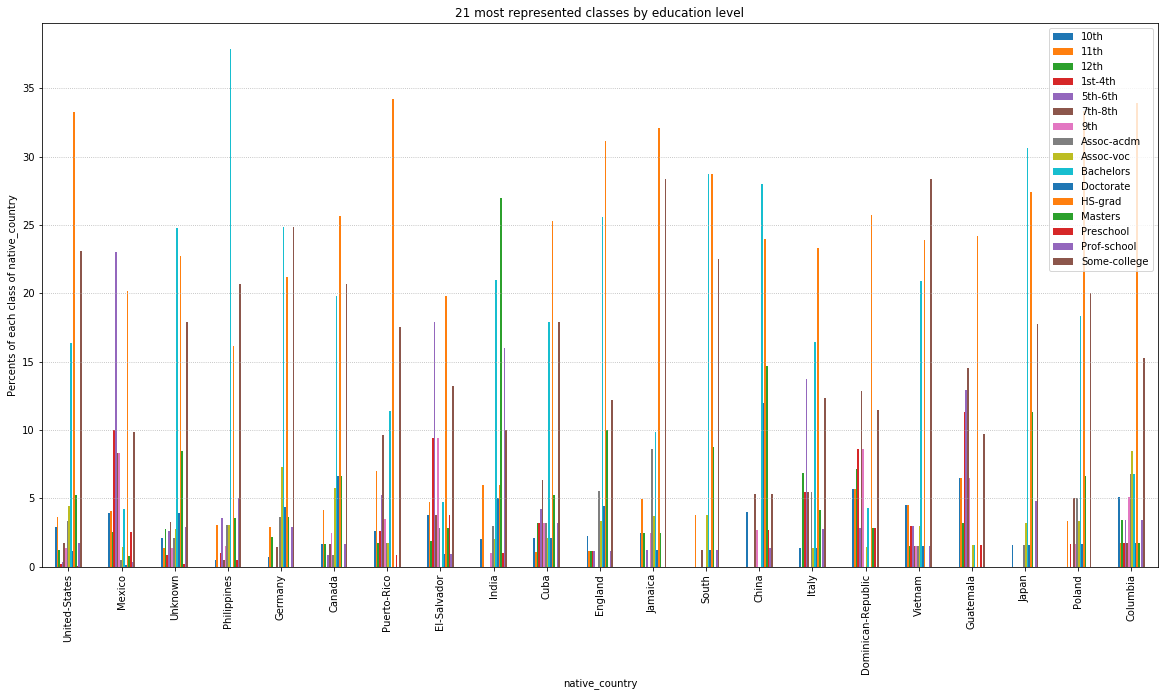

In [124]:
most_country_comp=compare_education(df, "native_country", n_first=0.5)

10th      11th      12th    1st-4th    5th-6th  \
United-States       2.908991  3.660252  1.252101   0.157799   0.332750   
Mexico              3.912363  4.068858  2.503912  10.015649  23.004695   
Unknown             2.065404  1.376936  2.753873   0.860585   2.581756   
Philippines         0.505051  3.030303  0.000000   1.010101   3.535354   
Germany             0.729927  2.919708  2.189781   0.000000   0.000000   
Canada              1.652893  4.132231  1.652893   0.000000   0.826446   
Puerto-Rico         2.631579  7.017544  1.754386   2.631579   5.263158   
El-Salvador         3.773585  4.716981  1.886792   9.433962  17.924528   
India               2.000000  6.000000  0.000000   0.000000   0.000000   
Cuba                2.105263  1.052632  3.157895   3.157895   4.210526   
England             2.222222  1.111111  1.111111   1.111111   1.111111   
Jamaica             2.469136  4.938272  2.469136   0.000000   1.234568   
South               0.000000  3.750000  0.000000   0.000000   0.000000   
China               4.000000  0.000000  0.000000   0.000000   0.000000   
Italy               1.369863  0.000000  6.849315   5.479452  13.698630   
Dominican-Republic  5.714286  5.714286  7.142857   8.571429   2.857143   
Vietnam             4.477612  4.477612  1.492537   2.985075   2.985075   
Guatemala           6.451613  6.451613  3.225806  11.290323  12.903226   
Japan               1.612903  0.000000  0.000000   0.000000   0.000000   
Poland              0.000000  3.333333  0.000000   1.666667   0.000000   
Columbia            5.084746  1.694915  3.389831   1.694915   3.389831   

                      7th-8th       9th  Assoc-acdm  Assoc-voc  Bachelors  \
United-States        1.708346  1.355014    3.368667   4.421804  16.345923   
Mexico               8.294210  8.294210    0.469484   1.408451   4.225352   
Unknown              3.270224  1.376936    2.065404   2.753873  24.784854   
Philippines          0.505051  1.515152    3.030303   3.030303  37.878788   
Germany              1.459854  0.000000    3.649635   7.299270  24.817518   
Canada               1.652893  2.479339    0.826446   5.785124  19.834711   
Puerto-Rico          9.649123  3.508772    1.754386   1.754386  11.403509   
El-Salvador          3.773585  9.433962    2.830189   0.000000   4.716981   
India                0.000000  1.000000    3.000000   2.000000  21.000000   
Cuba                 6.315789  3.157895    3.157895   2.105263  17.894737   
England              0.000000  0.000000    5.555556   3.333333  25.555556   
Jamaica              0.000000  2.469136    8.641975   3.703704   9.876543   
South                1.250000  0.000000    0.000000   3.750000  28.750000   
China                5.333333  2.666667    0.000000   0.000000  28.000000   
Italy                5.479452  0.000000    5.479452   1.369863  16.438356   
Dominican-Republic  12.857143  8.571429    0.000000   1.428571   4.285714   
Vietnam              1.492537  1.492537    1.492537   2.985075  20.895522   
Guatemala           14.516129  6.451613    0.000000   1.612903   1.612903   
Japan                0.000000  0.000000    1.612903   3.225806  30.645161   
Poland               5.000000  1.666667    5.000000   3.333333  18.333333   
Columbia             1.694915  5.084746    6.779661   8.474576   6.779661   

                    Doctorate    HS-grad    Masters  Preschool  Prof-school  \
United-States        1.125176  33.257864   5.234812   0.058317     1.722068   
Mexico               0.156495  20.187793   0.782473   2.503912     0.312989   
Unknown              3.958692  22.719449   8.433735   0.172117     2.925990   
Philippines          0.000000  16.161616   3.535354   0.505051     5.050505   
Germany              4.379562  21.167883   3.649635   0.000000     2.919708   
Canada               6.611570  25.619835   6.611570   0.000000     1.652893   
Puerto-Rico          0.000000  34.210526   0.000000   0.877193     0.000000   
El-Salvador          0.943396  19.811321   2.830189   3.773585     0

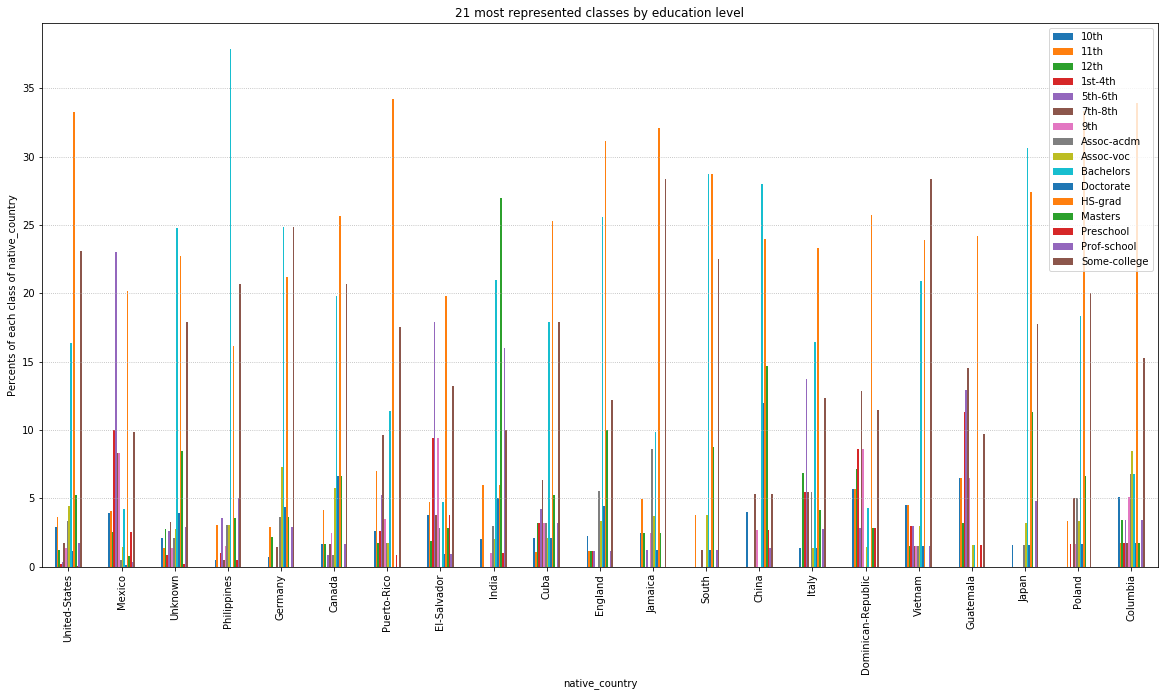

In [125]:
most_country_comp=compare_education(df, "native_country", n_first=0.5, first_largest=True)

10th       11th      12th    1st-4th  \
Taiwan                      0.000000   0.000000  0.000000   0.000000   
Haiti                       2.272727   4.545455  0.000000   2.272727   
Iran                        0.000000   0.000000  0.000000   0.000000   
Portugal                    8.108108   0.000000  2.702703  18.918919   
Nicaragua                   2.941176   8.823529  2.941176   0.000000   
Peru                        6.451613   9.677419  0.000000   0.000000   
France                      0.000000   0.000000  0.000000   0.000000   
Greece                      3.448276   3.448276  0.000000   0.000000   
Ecuador                     3.571429   3.571429  3.571429   3.571429   
Ireland                     0.000000   4.166667  0.000000   0.000000   
Hong                        0.000000   5.000000  0.000000   0.000000   
Cambodia                    0.000000   0.000000  5.263158   5.263158   
Trinadad&Tobago             0.000000   5.263158  5.263158   0.000000   
Laos                        0.000000   5.555556  0.000000   0.000000   
Thailand                    0.000000   0.000000  5.555556   0.000000   
Yugoslavia                  6.250000   0.000000  0.000000   0.000000   
Outlying-US(Guam-USVI-etc)  0.000000   0.000000  0.000000   0.000000   
Honduras                    0.000000  15.384615  0.000000   7.692308   
Hungary                     0.000000   0.000000  0.000000   0.000000   
Scotland                    0.000000   8.333333  0.000000   0.000000   
Holand-Netherlands          0.000000   0.000000  0.000000   0.000000   

                              5th-6th    7th-8th        9th  Assoc-acdm  \
Taiwan                       0.000000   0.000000   0.000000    1.960784   
Haiti                        6.818182   2.272727   6.818182    6.818182   
Iran                         0.000000   0.000000   0.000000    9.302326   
Portugal                     0.000000  16.216216  10.810811    2.702703   
Nicaragua                    5.882353   2.941176   2.941176    2.941176   
Peru                         0.000000   3.225806   0.000000    3.225806   
France                       0.000000   0.000000   0.000000   10.344828   
Greece                       3.448276   6.896552   0.000000    0.000000   
Ecuador                      0.000000   3.571429   0.000000    0.000000   
Ireland                      0.000000   0.000000   4.166667    4.166667   
Hong                         0.000000   5.000000   5.000000    5.000000   
Cambodia                     0.000000   5.263158   0.000000    0.000000   
Trinadad&Tobago              5.263158   5.263158  15.789474    5.263158   
Laos                        11.111111   5.555556   0.000000    5.555556   
Thailand                     0.000000   0.000000   0.000000    5.555556   
Yugoslavia                   0.000000   6.250000   6.250000   12.500000   
Outlying-US(Guam-USVI-etc)   0.000000   0.000000   7.142857    0.000000   
Honduras                     7.692308   0.000000   0.000000    0.000000   
Hungary                      0.000000   0.000000   0.000000    7.692308   
Scotland                     0.000000   0.000000   0.000000    0.000000   
Holand-Netherlands           0.000000   0.000000   0.000000    0.000000   

                            Assoc-voc  Bachelors  Doctorate    HS-grad  \
Taiwan                       0.000000  35.294118  15.686275   5.882353   
Haiti                        0.000000  11.363636   0.000000  29.545455   
Iran                         0.000000  34.883721  11.627907   9.302326   
Portugal                     5.405405   5.405405   0.000000  27.027027   
Nicaragua                    2.941176   2.941176   0.000000  26.470588   
Peru                         3.225806   9.677419   0.000000  41.935484   
France                       3.448276  24.137931  10.344828  20.689655   
Greece                      13.793103   6.896552   0.000000  31.034483   
Ecuador                      3.571429  10.714286   0.000000  35.714286   
Ireland                      4.166667  20.833333   0.000

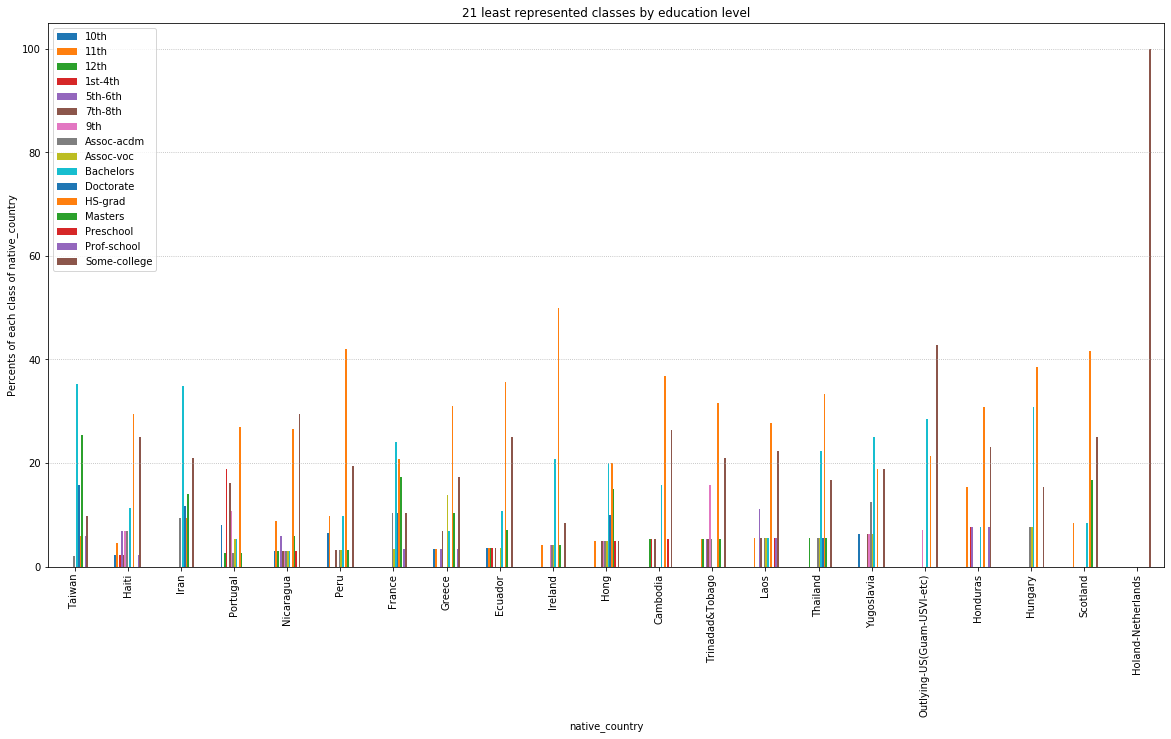

In [126]:
least_country_comp=compare_education(df, "native_country", ascending=False, show_pies=False, n_first=0.5, first_largest=False)

#### By continent <a name="edu_continent"></a>

To get a better picture, we will use the continent repartition we prepared in the [native country variable analyse](#native_country).

10th      11th      12th   1st-4th    5th-6th   7th-8th  \
Native         2.907595  3.658495  1.251500  0.157723   0.332590  1.707526   
North_America  3.480783  4.641044  2.538071  6.889050  14.068165  6.961566   
Asia           1.490313  2.533532  0.447094  0.745156   1.639344  1.341282   
Unknown        2.065404  1.376936  2.753873  0.860585   2.581756  3.270224   
Europe         1.727447  1.919386  1.919386  2.495202   2.303263  3.454894   
South_America  2.764977  4.147465  1.843318  0.921659   1.382488  2.304147   

                    9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  \
Native         1.357792    3.367050   4.419681  16.351792   1.124636   
North_America  6.453952    1.667875   1.885424   7.614213   0.942712   
Asia           1.192250    2.831595   2.235469  29.061103   4.769001   
Unknown        1.376936    2.065404   2.753873  24.784854   3.958692   
Europe         1.343570    4.798464   4.990403  20.153551   2.879079   
South_America  2.764977    2.764977   4.608295  15.207373   0.921659   

                 HS-grad    Masters  Preschool  Prof-school  Some-college  
Native         33.252186   5.232299   0.058289     1.721241     23.099606  
North_America  23.857868   1.957941   1.812908     0.725163     14.503263  
Asia           17.585693  11.177347   1.043219     5.216095     16.691505  
Unknown        22.719449   8.433735   0.172117     2.925990     17.900172  
Europe         27.639155   6.333973   0.000000     1.727447     16.314779  
South_America  33.179724   5.529954   0.000000     1.382488     20.276498

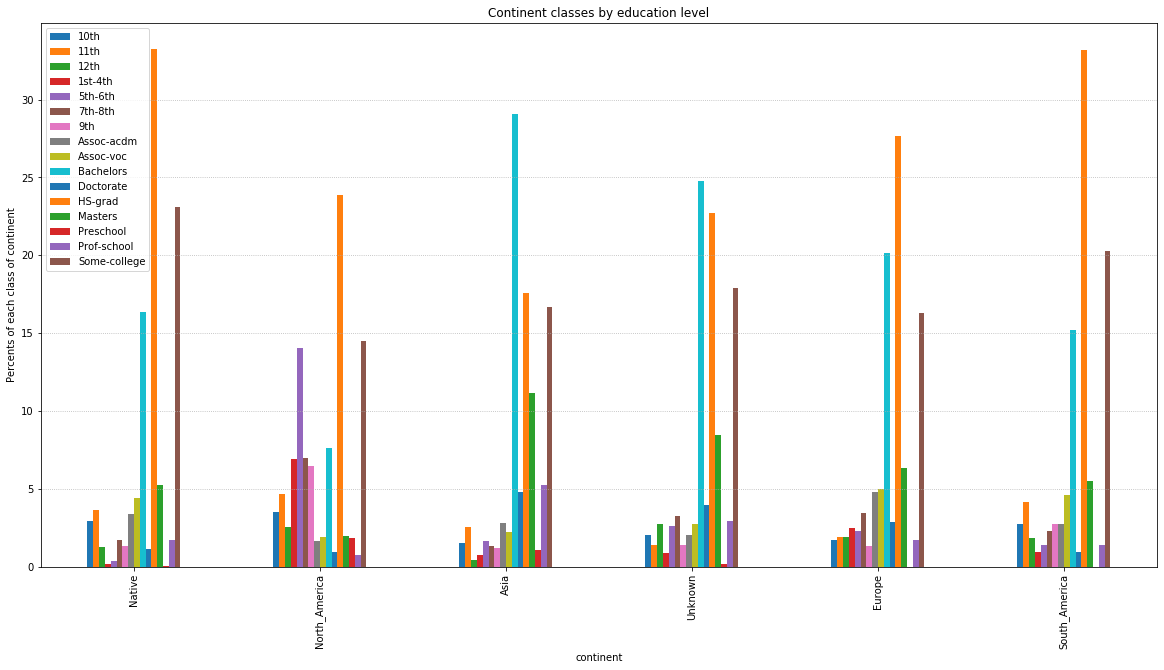

In [127]:
continent_comp=compare_education(pd.concat([df[["education", "fnlwgt"]], df['native_country'].apply(lambda x: continent_dict[x]).rename("continent")],axis=1), "continent")

North americans have a much higher proportion of 5th and 6th graders and a much lower proportion of bachelors.

We can spot a high proportion of Phds from Asian and Europe native. People with unknow nativity have quite a high education level also.

[Go back to the top](#start)

### Profiling by income<a name="profile"></a>

Let's play the profiler game. We want to guess the standar profile of low and high income earners in our dataset.

#### Game rule<a name="profile_rule"></a>

Let's try to make two profiles : a high income one and a low income one.

In [128]:
print("As a reminder, our variables are : %s."%(", ".join(list(df.columns))))

As a reminder, our variables are : age, workclass, fnlwgt, education, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income, native_continent.


In [129]:
to_drop = ["fnlwgt","capital_gain","capital_loss","native_continent"]
print("We will drop the following one : %s.\nThat leaves us the following one : %s."
      %(", ".join(to_drop), ", ".join([x for x in df.columns if x not in to_drop])))

We will drop the following one : fnlwgt, capital_gain, capital_loss, native_continent.
That leaves us the following one : age, workclass, education, marital_status, occupation, relationship, race, sex, hours_per_week, native_country, income.


In [130]:
selected_variables = [x for x in df.columns if x not in ["fnlwgt","capital_gain","capital_loss","native_continent"]]
selected_variables

['age',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours_per_week',
 'native_country',
 'income']

For each variable (apart from our target), we will keep the value which shows the highest proportion in both income classes. Those are the classes we spotted during our [variable analysis](#variables).

The goal is not to maximise the chance to get the wanted income class for both, but to find the profile in the dataset with the wanted income class.

Our score will be the correct metrics to consider, which is the precision, given by the formula : $Precision = \frac{True\ positives}{True\ positives\ +\ False\ positives}$

#### Low income standard profile<a name="profile_low"></a>

Here is the standard profile of a low income individual in this dataset :

In [131]:
profile_low = {"age":pd._libs.interval.Interval(32, 48,closed="right"), 
               "workclass":"Private",
              "education":"HS-grad",
              "marital_status":"Never-married",
               "occupation":"Craft-repair",
               "relationship":"Not-in-family",
              "race":"White",
              "sex":"Female",
              "hours_per_week":40,
              "native_country":"United-States"}

Now we will filter by step our dataset and try to find the list of individuals matching exactly both of our profiles.

In [132]:
low_profile_df = df
for var, value in profile_low.items():
    low_profile_df=low_profile_df[low_profile_df[var]==value]
    print("%i individuals remained after filtering in the value \"%s\" from variable %s."%(len(low_profile_df), value, var))
low_profile_df

12625 individuals remained after filtering in the value "(32, 48]" from variable age.
8734 individuals remained after filtering in the value "Private" from variable workclass.
3019 individuals remained after filtering in the value "HS-grad" from variable education.
521 individuals remained after filtering in the value "Never-married" from variable marital_status.
73 individuals remained after filtering in the value "Craft-repair" from variable occupation.
46 individuals remained after filtering in the value "Not-in-family" from variable relationship.
41 individuals remained after filtering in the value "White" from variable race.
2 individuals remained after filtering in the value "Female" from variable sex.
1 individuals remained after filtering in the value "40" from variable hours_per_week.
1 individuals remained after filtering in the value "United-States" from variable native_country.


age workclass  fnlwgt education marital_status    occupation  \
8739  (32, 48]   Private  214816   HS-grad  Never-married  Craft-repair   

       relationship   race     sex capital_gain capital_loss  hours_per_week  \
8739  Not-in-family  White  Female       <=5060       <=1816              40   

     native_country income native_continent  
8739  United-States  <=50K           Native

In [133]:
low_profile_result = low_profile_df.groupby("income").size().rename("predicted_low")

We found only one individual matching our standard profile, and his is effectively a low income earner. That gives us a precision of $100\%$.

#### High income standard profile<a name="profile_high"></a>

Here is the standard profile of a high income individual in this dataset :

In [134]:
profile_high = {"age":pd._libs.interval.Interval(32, 48,closed="right"), 
               "workclass":"Private",
              "education":"Bachelors",
              "marital_status":"Married-civ-spouse",
                "occupation":"Exec-managerial",
                "relationship":"Husband",
              "race":"White",
              "sex":"Male",
              "hours_per_week":40,
              "native_country":"United-States"}

Let's filter.

In [135]:
high_profile_df = df
for var, value in profile_high.items():
    high_profile_df=high_profile_df[high_profile_df[var]==value]
    print("%i individuals remained after filtering in the value %s from variable %s."%(len(high_profile_df), value, var))
high_profile_df

12625 individuals remained after filtering in the value (32, 48] from variable age.
8734 individuals remained after filtering in the value Private from variable workclass.
1555 individuals remained after filtering in the value Bachelors from variable education.
970 individuals remained after filtering in the value Married-civ-spouse from variable marital_status.
335 individuals remained after filtering in the value Exec-managerial from variable occupation.
311 individuals remained after filtering in the value Husband from variable relationship.
285 individuals remained after filtering in the value White from variable race.
285 individuals remained after filtering in the value Male from variable sex.
92 individuals remained after filtering in the value 40 from variable hours_per_week.
85 individuals remained after filtering in the value United-States from variable native_country.


age workclass  fnlwgt  education      marital_status  \
402    (32, 48]   Private   32776  Bachelors  Married-civ-spouse   
441    (32, 48]   Private  218490  Bachelors  Married-civ-spouse   
826    (32, 48]   Private  284871  Bachelors  Married-civ-spouse   
852    (32, 48]   Private  272944  Bachelors  Married-civ-spouse   
892    (32, 48]   Private   30529  Bachelors  Married-civ-spouse   
...         ...       ...     ...        ...                 ...   
31054  (32, 48]   Private  118947  Bachelors  Married-civ-spouse   
31072  (32, 48]   Private   65278  Bachelors  Married-civ-spouse   
31671  (32, 48]   Private  188246  Bachelors  Married-civ-spouse   
31830  (32, 48]   Private  384150  Bachelors  Married-civ-spouse   
32028  (32, 48]   Private  189092  Bachelors  Married-civ-spouse   

            occupation relationship   race   sex capital_gain capital_loss  \
402    Exec-managerial      Husband  White  Male       <=5060        >1816   
441    Exec-managerial      Husband  White  Male       <=5060        >1816   
826    Exec-managerial      Husband  White  Male       <=5060        >1816   
852    Exec-managerial      Husband  White  Male       <=5060        >1816   
892    Exec-managerial      Husband  White  Male       <=5060        >1816   
...                ...          ...    ...   ...          ...          ...   
31054  Exec-managerial      Husband  White  Male       <=5060       <=1816   
31072  Exec-managerial      Husband  White  Male       <=5060       <=1816   
31671  Exec-managerial      Husband  White  Male       <=5060       <=1816   
31830  Exec-managerial      Husband  White  Male       <=5060       <=1816   
32028  Exec-managerial      Husband  White  Male       <=5060       <=1816   

       hours_per_week native_country income native_continent  
402                40  United-States   >50K           Native  
441                40  United-States   >50K           Native  
826                40  United-States   >50K           Native  
852                40  United-States   >50K           Native  
892                40  United-States   >50K           Native  
...               ...            ...    ...              ...  
31054              40  United-States   >50K           Native  
31072              40  United-States   >50K           Native  
31671              40  United-States  <=50K           Native  
31830              40  United-States   >50K           Native  
32028              40  United-States   >50K           Native  

[85 rows x 15 columns]

We found 85 individuals matching our standar profile.

In [136]:
high_profile_result = high_profile_df.groupby("income").size().rename("predicted_high")

From those 85 individuals, 14 have low incomes. That gives us a precision of $83.53\%$.

#### Score<a name="profile_score"></a>

In [137]:
profile_confusion = pd.concat([low_profile_result, high_profile_result],axis=1, sort=True).fillna(0)
profile_confusion

predicted_low  predicted_high
<=50K            1.0              14
>50K             0.0              71

In [138]:
print("The accuracy of our profiling is %f"%custom_accuracy_score(profile_confusion))

The accuracy of our profiling is 0.837209


[Go back to the top](#start)

#### Second try<a name="profile_2"></a>

Let's try two other profiles with the same approach.

In [139]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [140]:
profile_low2 = {"age":pd._libs.interval.Interval(32, 48,closed="right"), 
               "workclass":"Unemployed",
              "education":"9th"}
profile_high2 = {"age":pd._libs.interval.Interval(32, 48,closed="right"), 
               "workclass":"Self-emp-inc",
              "education":"Doctorate",
              "marital_status":"Married-civ-spouse",
               "occupation":"Prof-specialty"}

In [141]:
print("\n\tLow profile\n")
low_profile_df2 = df
for var, value in profile_low2.items():
    low_profile_df2=low_profile_df2[low_profile_df2[var]==value]
    print("%i individuals remained after filtering in the value \"%s\" from variable %s."%(len(low_profile_df2), value, var))
display(low_profile_df2)

print("\n\tHigh profile\n")
high_profile_df2 = df
for var, value in profile_high2.items():
    high_profile_df2=high_profile_df2[high_profile_df2[var]==value]
    print("%i individuals remained after filtering in the value %s from variable %s."%(len(high_profile_df2), value, var))
display(high_profile_df2)


	Low profile

12625 individuals remained after filtering in the value "(32, 48]" from variable age.
270 individuals remained after filtering in the value "Unemployed" from variable workclass.
10 individuals remained after filtering in the value "9th" from variable education.


age   workclass  fnlwgt education      marital_status occupation  \
8535   (32, 48]  Unemployed  144354       9th           Separated       None   
14398  (32, 48]  Unemployed   87369       9th            Divorced       None   
17004  (32, 48]  Unemployed  217921       9th  Married-civ-spouse       None   
20066  (32, 48]  Unemployed  214896       9th            Divorced       None   
20240  (32, 48]  Unemployed  224361       9th            Divorced       None   
20970  (32, 48]  Unemployed   98989       9th            Divorced       None   
27217  (32, 48]  Unemployed  107479       9th       Never-married       None   
28296  (32, 48]  Unemployed   61985       9th           Separated       None   
28472  (32, 48]  Unemployed  204817       9th       Never-married       None   
30196  (32, 48]  Unemployed  374716       9th  Married-civ-spouse       None   

        relationship                race     sex capital_gain capital_loss  \
8535       Own-child               Black    Male       <=5060       <=1816   
14398      Unmarried               White  Female       <=5060       <=1816   
17004           Wife  Asian-Pac-Islander  Female       <=5060       <=1816   
20066      Unmarried               White  Female       <=5060       <=1816   
20240      Unmarried               White  Female       <=5060       <=1816   
20970      Own-child  Amer-Indian-Eskimo    Male       <=5060       <=1816   
27217      Own-child               White  Female       <=5060       <=1816   
28296  Not-in-family  Amer-Indian-Eskimo  Female       <=5060       <=1816   
28472      Own-child               Black    Male       <=5060       <=1816   
30196           Wife               White  Female       <=5060       <=1816   

       hours_per_week native_country income native_continent  
8535               40  United-States  <=50K           Native  
14398              40  United-States  <=50K           Native  
17004              40           Hong  <=50K             Asia  
20066              40         Mexico  <=50K    North_America  
20240               5           Cuba  <=50K    North_America  
20970              38  United-States  <=50K           Native  
27217              12  United-States  <=50K           Native  
28296              20  United-States  <=50K           Native  
28472              35  United-States  <=50K           Native  
30196              35  United-States  <=50K           Native


	High profile

12625 individuals remained after filtering in the value (32, 48] from variable age.
501 individuals remained after filtering in the value Self-emp-inc from variable workclass.
13 individuals remained after filtering in the value Doctorate from variable education.
12 individuals remained after filtering in the value Married-civ-spouse from variable marital_status.
11 individuals remained after filtering in the value Prof-specialty from variable occupation.


age     workclass  fnlwgt  education      marital_status  \
389    (32, 48]  Self-emp-inc  277256  Doctorate  Married-civ-spouse   
1598   (32, 48]  Self-emp-inc  495061  Doctorate  Married-civ-spouse   
2559   (32, 48]  Self-emp-inc  287647  Doctorate  Married-civ-spouse   
7323   (32, 48]  Self-emp-inc  382802  Doctorate  Married-civ-spouse   
10059  (32, 48]  Self-emp-inc  214627  Doctorate  Married-civ-spouse   
12971  (32, 48]  Self-emp-inc  281832  Doctorate  Married-civ-spouse   
13097  (32, 48]  Self-emp-inc   35662  Doctorate  Married-civ-spouse   
14727  (32, 48]  Self-emp-inc  239018  Doctorate  Married-civ-spouse   
18585  (32, 48]  Self-emp-inc  443508  Doctorate  Married-civ-spouse   
18622  (32, 48]  Self-emp-inc   64632  Doctorate  Married-civ-spouse   
29448  (32, 48]  Self-emp-inc  201699  Doctorate  Married-civ-spouse   

           occupation relationship   race     sex capital_gain capital_loss  \
389    Prof-specialty      Husband  White    Male       <=5060        >1816   
1598   Prof-specialty      Husband  White    Male        >5060       <=1816   
2559   Prof-specialty      Husband  White    Male        >5060       <=1816   
7323   Prof-specialty      Husband  Black    Male       <=5060       <=1816   
10059  Prof-specialty      Husband  White    Male       <=5060       <=1816   
12971  Prof-specialty      Husband  White    Male       <=5060       <=1816   
13097  Prof-specialty         Wife  White  Female       <=5060       <=1816   
14727  Prof-specialty      Husband  White    Male       <=5060       <=1816   
18585  Prof-specialty      Husband  White    Male       <=5060       <=1816   
18622  Prof-specialty      Husband  White    Male       <=5060       <=1816   
29448  Prof-specialty      Husband  White    Male       <=5060       <=1816   

       hours_per_week native_country income native_continent  
389                60  United-States   >50K           Native  
1598               70  United-States   >50K           Native  
2559               55  United-States   >50K           Native  
7323               99  United-States   >50K           Native  
10059              60  United-States   >50K           Native  
12971              40           Cuba   >50K    North_America  
13097              70  United-States   >50K           Native  
14727              60  United-States  <=50K           Native  
18585              45  United-States   >50K           Native  
18622              60  United-States  <=50K           Native  
29448              60  United-States   >50K           Native

In [142]:
low_profile_result2 = low_profile_df2.groupby("income").size().rename("predicted_low")
high_profile_result2 = high_profile_df2.groupby("income").size().rename("predicted_high")
profile_confusion2 = pd.concat([low_profile_result2, high_profile_result2],axis=1, sort=True).fillna(0)
display(profile_confusion2)
print("The accuracy of our profiling is %f"%custom_accuracy_score(profile_confusion2))

predicted_low  predicted_high
<=50K           10.0               2
>50K             0.0               9

The accuracy of our profiling is 0.904762


# Machine Learning<a name="machine_learning"></a>

## Metrics preparation<a name="metrics_prep"></a>

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve

def get_all_results(algos, X_train, X_test, y_train, y_test, print_results=True):
    def fit_and_score(algo):
        algo.fit(X_train, y_train)
        y_pred_test = algo.predict(X_test)
        y_pred_train = algo.predict(X_train)
        test = accuracy_score(y_test, y_pred_test)
        train = accuracy_score(y_train, y_pred_train)
        if print_results:
            print("Test :")
            print("\tAccuracy = %f"%test)
            print(confusion_matrix(y_test, y_pred_test))
            print("Train :")
            print("\tAccuracy = %f"%train)
            print(confusion_matrix(y_train, y_pred_train))
            return test, train
    
    results={}
    for algo in algos:
        algoname = algo.__class__.__name__
        print("\n\n### With %s ###"%algoname)
        res = fit_and_score(algo)
        results[algoname]={"test" : res[0], "train" : res[1]}
        
    return results

[Go back to the top](#start)

## Models preparation<a name="models_prep"></a>

In [144]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RF, AdaBoostClassifier as Adaboost
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier as GaussianPC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.neural_network import MLPClassifier as MLPC

algos = [LogReg(n_jobs=-1),
         LDA(),
         GaussianNB(),
         KNN(n_jobs=-1),
         SVC(kernel="linear"),
         SGD(n_jobs=-1),
         DTC(),
         RF(n_jobs=-1), 
         Adaboost(),
         MLPC()
]

[Go back to the top](#start)

## Data preparation<a name="data_prep"></a>

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import product

In [146]:
df

age   workclass  fnlwgt     education      marital_status  \
0      (82, 90]  Unemployed   77053       HS-grad             Widowed   
1      (60, 82]     Private  132870       HS-grad             Widowed   
2      (60, 82]  Unemployed  186061  Some-college             Widowed   
3      (48, 60]     Private  140359       7th-8th            Divorced   
4      (32, 48]     Private  264663  Some-college           Separated   
...         ...         ...     ...           ...                 ...   
32556   (0, 24]     Private  310152  Some-college       Never-married   
32557  (24, 32]     Private  257302    Assoc-acdm  Married-civ-spouse   
32558  (32, 48]     Private  154374       HS-grad  Married-civ-spouse   
32559  (48, 60]     Private  151910       HS-grad             Widowed   
32560   (0, 24]     Private  201490       HS-grad       Never-married   

              occupation   relationship   race     sex capital_gain  \
0                   None  Not-in-family  White  Female       <=5060   
1        Exec-managerial  Not-in-family  White  Female       <=5060   
2                   None      Unmarried  Black  Female       <=5060   
3      Machine-op-inspct      Unmarried  White  Female       <=5060   
4         Prof-specialty      Own-child  White  Female       <=5060   
...                  ...            ...    ...     ...          ...   
32556    Protective-serv  Not-in-family  White    Male       <=5060   
32557       Tech-support           Wife  White  Female       <=5060   
32558  Machine-op-inspct        Husband  White    Male       <=5060   
32559       Adm-clerical      Unmarried  White  Female       <=5060   
32560       Adm-clerical      Own-child  White    Male       <=5060   

      capital_loss  hours_per_week native_country income native_continent  
0            >1816              40  United-States  <=50K           Native  
1            >1816              18  United-States  <=50K           Native  
2            >1816              40  United-States  <=50K           Native  
3            >1816              40  United-States  <=50K           Native  
4            >1816              40  United-States  <=50K           Native  
...            ...             ...            ...    ...              ...  
32556       <=1816              40  United-States  <=50K           Native  
32557       <=1816              38  United-States  <=50K           Native  
32558       <=1816              40  United-States   >50K           Native  
32559       <=1816              40  United-States  <=50K           Native  
32560       <=1816              20  United-States  <=50K           Native  

[32534 rows x 15 columns]

Currently, we have a quite simple Dataframe with 15 columns. All variables are categorical except fnlwgt and hours_per_week.
There is not much we can't do much about fnlwgt because it hase a high modularity (21,648 values for 32,560 observations).
But, as we have seen, in the ["hours_per_week" variable analysis](#"hours_per_week"), 40 hours is a pivot value (favorised by high_income). We could group this variable into two modularities : "<40" and ">=40" and keep it as a second set to compare our precision with.

In [147]:
df["ranged_hours_per_week"]=pd.cut(df.hours_per_week, [-1,40,df.hours_per_week.max()])

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Also, we want to know if the variables fnlwgt and continent help with our precision.

Therefore, we have several tests we could perform right now :
- hours as continunous or categorical
- native_country present or not
- native_continent present or not
- fnlwgt present or not

We have to make 16 sets of data, test it naively and select only one for the remaining of our predictions.

In [148]:
combis_list = list(reversed(list(product([0,1], repeat=4))))
combis_list

[(1, 1, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 0, 0),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 0, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 0),
 (0, 0, 0, 1),
 (0, 0, 0, 0)]

In [149]:
def split_combis(combination_list):
    df_dict = {}
    for cont_hours, has_country, has_continent, has_fnlwgt in combination_list:
        name = "df"+ ("_hourscontinuous" if bool(cont_hours) else "_hourscategorical")+\
        ("_nocountry" if not bool(has_country) else "")+\
        ("_nocontinent" if not bool(has_continent) else "")+\
        ("_nofnlwgt" if not bool(has_fnlwgt) else "")       
        col_to_drop = ["income",
                       ("ranged_hours_per_week" if bool(cont_hours) else "hours_per_week")]
        if not bool(has_country):
            col_to_drop.append("native_country" )
        if not bool(has_continent):
            col_to_drop.append("native_continent")
        if not bool(has_fnlwgt):
            col_to_drop.append("fnlwgt")
        X_dummies = pd.get_dummies(df.drop(columns=col_to_drop), drop_first=True)
        X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X_dummies), df.income, random_state=177)
        df_dict[name]={"X_train":X_train, "X_test":X_test, 'y_train':y_train, 'y_test':y_test, 'feat_names':X_dummies.columns}
    return df_dict

In [150]:
df_combis = split_combis(combis_list)

In [151]:
y_dummies = pd.get_dummies(df.income, drop_first=True)

We should make another function that tests all those datas and conveniently presents the results.

In [152]:
def evaluate_combis(df_dict, target):
    ev_combis_results = {}
    progress=0
    total_duration = 0
    for name, data in df_dict.items():
        progress+=1
        duration = time.time()
        print("\n\n\t\tEvaluating with %s (%i / %i)"%(name, progress, len(df_dict)), end="...")
        ev_combis_results[name]=get_all_results(algos, data["X_train"], data["X_test"], data["y_train"], data["y_test"])
        duration = time.time()-duration
        total_duration += duration
        print("done in %i minutes and %.3f seconds."%(duration//60, duration%60))
    print("\n\nEvaluation completed in %i minutes and %.3f seconds"%(total_duration//60, total_duration%60))

    return pd.DataFrame({(df_name, algo_name):test_train_result for df_name, df_dict in ev_combis_results.items() for algo_name, test_train_result in df_dict.items()})

In [153]:
combi_results_filename = "results/dataframes_combis_results.csv"

It takes about 30 minutes, so I have provided csv files which contain each the results for a specific dataframe, and the function to reconstruct it as a MultiIndex DataFrame.

In [154]:
combis_results = pd.read_csv(combi_results_filename, header=[0,1], index_col=[0])
combis_results

df_hourscontinuous                                        \
      LogisticRegression LinearDiscriminantAnalysis GaussianNB   
test            0.865626                   0.860708   0.449594   
train           0.858770                   0.856639   0.449836   

                                                                           \
      KNeighborsClassifier       SVC SGDClassifier DecisionTreeClassifier   
test              0.839316  0.859725      0.860831               0.809811   
train             0.879303  0.857500      0.853156               0.999836   

                                                               ...  \
      RandomForestClassifier AdaBoostClassifier MLPClassifier  ...   
test                0.847062           0.859602      0.838702  ...   
train               0.999754           0.855492      0.909262  ...   

      df_hourscategorical_nocountry_nocontinent_nofnlwgt  \
                                      LogisticRegression   
test                                            0.863167   
train                                           0.857664   

                                                                            \
      LinearDiscriminantAnalysis GaussianNB KNeighborsClassifier       SVC   
test                    0.860093   0.550652             0.842144  0.859970   
train                   0.855410   0.555041             0.867131  0.854918   

                                                                   \
      SGDClassifier DecisionTreeClassifier RandomForestClassifier   
test       0.855791               0.836981               0.849398   
train      0.849590               0.910082               0.910082   

                                        
      AdaBoostClassifier MLPClassifier  
test            0.859233      0.849398  
train           0.853975      0.896844  

[2 rows x 160 columns]

Let's get the DataFrame which shows the best result from each algorithm, and its accuracy score :

In [155]:
best_df_combis = {}
for algo in combis_results.columns.get_level_values(1).unique():
    best = combis_results.iloc[:, combis_results.columns.get_level_values(1)==algo].sort_values(by="test",ascending=False, axis=1).iloc[:,0]
    best.rename(best.name[0], inplace=True)
    best=best.append(pd.Series(best.name, index=["best_estimator"]))
    best_df_combis[algo]=best
best_df_per_algo = pd.DataFrame(best_df_combis).sort_values(by="test", axis=1, ascending=False).sort_index()
best_df_per_algo

LogisticRegression                            SVC  \
best_estimator  df_hourscontinuous_nocountry  df_hourscategorical_nocountry   
test                                0.866363                       0.862429   
train                               0.858402                       0.855779   

               LinearDiscriminantAnalysis                 SGDClassifier  \
best_estimator        df_hourscategorical  df_hourscontinuous_nocountry   
test                             0.861815                        0.8612   
train                            0.855943                      0.848197   

                                      AdaBoostClassifier  \
best_estimator  df_hourscontinuous_nocountry_nocontinent   
test                                            0.861077   
train                                              0.855   

                                  RandomForestClassifier  \
best_estimator  df_hourscategorical_nocontinent_nofnlwgt   
test                                            0.853701   
train                                           0.916598   

                                                    MLPClassifier  \
best_estimator  df_hourscontinuous_nocountry_nocontinent_nofnlwgt   
test                                                     0.851611   
train                                                    0.899713   

                                    KNeighborsClassifier  \
best_estimator  df_hourscontinuous_nocountry_nocontinent   
test                                             0.84448   
train                                            0.88082   

                                           DecisionTreeClassifier  \
best_estimator  df_hourscategorical_nocountry_nocontinent_nofn...   
test                                                     0.836981   
train                                                    0.910082   

                                  GaussianNB  
best_estimator  df_hourscontinuous_nocountry  
test                                0.554709  
train                               0.557172

The most accurate algorithm seems to be the logistic regression. 

The second best one is support vector machine classifier.

Both algorithms fitted best with the dataframe featuring continuous hours of week and native_continent instead of native_country.

Even though Random forest overfitted, it showed a capability to best adapt to the non-linear nature of this dataset. It best fitted with the dataframe df_hourscategorical_nocontinent_nofnlwgt with categorical hours of week, , native_country and no fnlwgt.

We are now going to keep the best dataframe per each algorithm, and do a very basic GridSearch.

It is not the way it is usually done, but let's consider it is my signature. I believe that choosing the estimator early with a baseline estimation neglects he possibility that better tuned algorithms can reveal a different outcome on the accuracy ranking.

[Go back to the top](#start)

## First estimation<a name="first_estimation"></a>

Let's first make a minimalistic GridSearch for each algorithm, each with its best fitting dataframe.

Each algorithm will get, for its most important numerical parameters, two values centered around its typical default one. Most of them will get the parameter max_iter set to 75.

For this section, LDA and GaussianNB won't be used, as they are not tunable as is, without better knowledge of statistical importance of the features.

In [156]:
from sklearn.model_selection import GridSearchCV
import json

In [157]:
params = {LogReg():{'C':[0.01,100], 'penalty':['l1', 'l2'], 'n_jobs':[-1]},
          KNN():{'p':[1, 2], 'n_neighbors':[2,25], 'n_jobs':[-1]},
          SVC():{'kernel' : ['linear', 'rbf', 'poly'], 'gamma':[0.01,100], 'C':[0.01, 1, 100], 'degree':[2,6],
                "max_iter":[75]},
          SGD():{'alpha': [0.01,100], 'loss': ['log', 'perceptron','squared_hinge','modified_huber'],
                     'penalty': ['l1','l2','elasticnet'], 'n_jobs': [-1], "max_iter":[75]},
          DTC():{"max_depth":[1,36],'min_samples_split':[0.1, 1], 'min_samples_leaf':[0.1,0.5], 
                     'max_features' :[1,25]},
          RF():{'n_estimators': [10,200], 'max_features': ['auto','sqrt'], 'max_depth': [10,100],
               'min_samples_split': [2,10],'min_samples_leaf': [1,5], 'n_jobs':[-1]},
          Adaboost():{'n_estimators': [25,100],'learning_rate' : [0.1,10]},
          MLPC():{'hidden_layer_sizes': [(50,50,50), (50,100,50)], 'activation': ['tanh', 'relu'],
                     'solver': ['sgd', 'adam'], 'alpha': [0.000001, 0.01], 
                  'learning_rate': ['constant','adaptive','invscaling'],"max_iter":[75]}
         }

In [158]:
def dataframe_result(result_dict):
    gs_df = []
    for algo, grid in result_dict.items():
        for params, mean_test_score, mean_train_score in zip(grid['params'], grid['mean_test_score'], grid['mean_train_score']):
            gs_df.append((algo, params, mean_test_score, mean_train_score))
    gs_df = pd.DataFrame(gs_df, columns=["Algorithm", "Parameters", "mean_test_score", 'mean_train_score'])
    mask_best = gs_df.groupby("Algorithm")['mean_test_score'].transform(max)==gs_df['mean_test_score']
    return gs_df[mask_best].sort_values(by="mean_test_score", ascending=False)

Here again, it took some time so I got the results ready to read in a csv.

In [159]:
estimation_df = pd.read_csv("results/gridsearch_estimation.csv", index_col=1).iloc[:,1:]

In [160]:
estimation_df

Parameters  \
Algorithm                                                                   
MLPClassifier           {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   
LogisticRegression              {'C': 100, 'n_jobs': -1, 'penalty': 'l2'}   
SGDClassifier           {'alpha': 0.01, 'loss': 'modified_huber', 'max...   
RandomForestClassifier  {'max_depth': 100, 'max_features': 'auto', 'mi...   
AdaBoostClassifier            {'learning_rate': 0.1, 'n_estimators': 100}   
KNeighborsClassifier            {'n_jobs': -1, 'n_neighbors': 25, 'p': 2}   
DecisionTreeClassifier  {'max_depth': 36, 'max_features': 25, 'min_sam...   
SVC                     {'C': 1, 'degree': 2, 'gamma': 100, 'kernel': ...   
SVC                     {'C': 1, 'degree': 6, 'gamma': 100, 'kernel': ...   

                        mean_test_score  mean_train_score  
Algorithm                                                  
MLPClassifier                  0.857336          0.861844  
LogisticRegression             0.856803          0.858402  
SGDClassifier                  0.856680          0.856598  
RandomForestClassifier         0.855697          0.863074  
AdaBoostClassifier             0.846967          0.847859  
KNeighborsClassifier           0.843279          0.853248  
DecisionTreeClassifier         0.769508          0.767879  
SVC                            0.756680          0.758648  
SVC                            0.756680          0.758648

LogisticRegression gave a good result, just behind the multi-layer perceptron classifier. Random Forest showed a good potential with a higher score on the train set. From now, we will work with all of those three.

[Go back to the top](#start)

## Feature importance<a name="feat_importance"></a>

We will apply a recursive feature elimination to rank the features by importance.

Scores are not available, using this method, so we will simply look at the rank of each "dummied" feature.

In [161]:
from sklearn.feature_selection import RFE

In [162]:
logreg = LogReg(**eval("dict("+estimation_df.loc["LogisticRegression","Parameters"]+")"))
rfe_logreg_df = df_combis['df_hourscontinuous']
rfe = RFE(logreg, 1, step=1).fit(rfe_logreg_df["X_train"], rfe_logreg_df["y_train"])

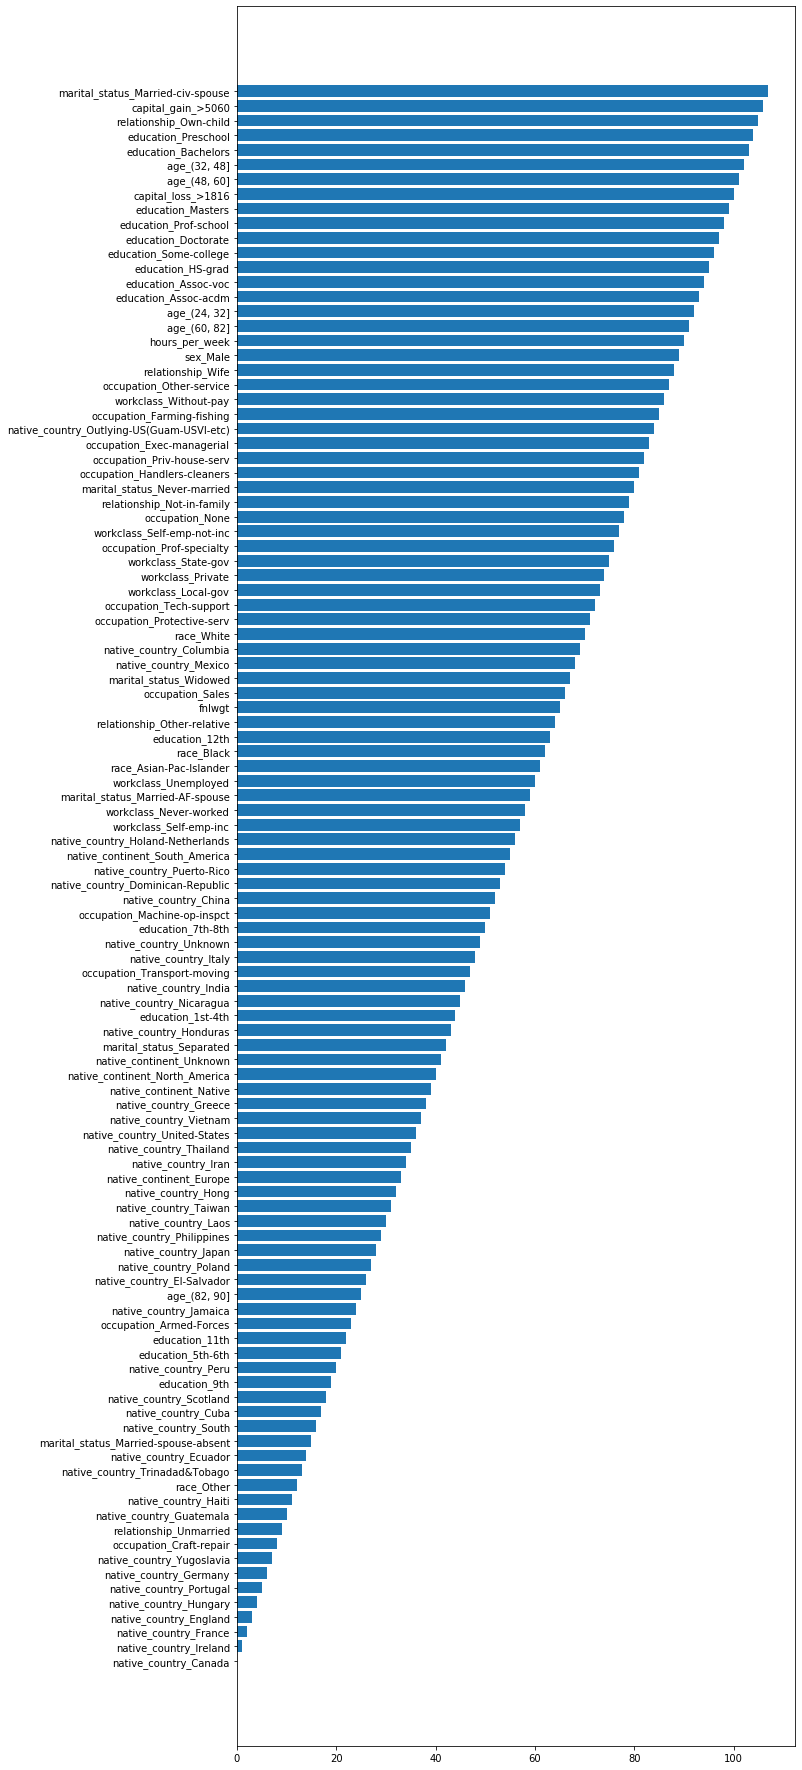

In [163]:
importance_ranking = pd.DataFrame(rfe.ranking_.max()-rfe.ranking_, index=df_combis["df_hourscontinuous"]["feat_names"], columns=['Score']).sort_values(by='Score', ascending=True)
plt.figure(figsize=(10,32))
plt.barh(importance_ranking.index, importance_ranking.iloc[:,0])
plt.show()

Here is a valuable insight of the most and least decisive factors in the income evaluation.

Since I had time to get this work ready, I won't use its result for a feature selection.

We will use another method on my own to select some sets of features instead.

[Go back to the top](#start)

## Confirming the DataFrame choice...<a name="df_confirm"></a>

We are going to confirm if each algorithm actually gives a better precision on the DataFrame it chose in the [Data preparation step](#profile_high), with the best param_grid found so far.

#### ... for MLP classifier<a name="mlpc_df_confirm"></a>

In [164]:
mplc_df=pd.read_csv("results/mlpc_df.csv", index_col=[0]).iloc[:,1:].sort_values(by="test_score",axis=1, ascending=False)
mplc_df

df_hourscontinuous_nocontinent  \
test_score                         0.863167   
train_score                        0.874672   

             df_hourscategorical_nocountry_nocontinent  \
test_score                                    0.862798   
train_score                                   0.867090   

             df_hourscontinuous_nocontinent_nofnlwgt  \
test_score                                  0.862675   
train_score                                 0.874918   

             df_hourscategorical_nocountry  df_hourscontinuous_nocountry  \
test_score                        0.862183                      0.862060   
train_score                       0.869959                      0.869877   

             df_hourscontinuous_nocountry_nocontinent_nofnlwgt  \
test_score                                            0.862060   
train_score                                           0.870492   

             df_hourscategorical_nocountry_nocontinent_nofnlwgt  \
test_score                                            0.861446    
train_score                                           0.867254    

             df_hourscategorical_nocontinent_nofnlwgt  \
test_score                                   0.860831   
train_score                                  0.872951   

             df_hourscategorical_nocountry_nofnlwgt  \
test_score                                 0.860585   
train_score                                0.869836   

             df_hourscategorical_nofnlwgt  \
test_score                       0.860339   
train_score                      0.871762   

             df_hourscontinuous_nocountry_nofnlwgt  \
test_score                                0.860216   
train_score                               0.870082   

             df_hourscontinuous_nocountry_nocontinent  \
test_score                                   0.860216   
train_score                                  0.867869   

             df_hourscontinuous_nofnlwgt  df_hourscategorical  \
test_score                      0.859848             0.859848   
train_score                     0.875205             0.874467   

             df_hourscategorical_nocontinent  
test_score                          0.857758  
train_score                         0.872787

After all, it seems that the original dataset (with no continents and continuous hours per week) is the best suited for MPLC. We will work with this one during the hyperparameters tuning.

#### ... for Logistic regression<a name="logreg_df_confirm"></a>

In [165]:
logreg_df = pd.read_csv("results/logreg_df.csv", index_col=[0]).iloc[:,1:].sort_values(by="test_score",axis=1, ascending=False)
logreg_df

df_hourscontinuous_nocountry  df_hourscategorical_nocountry  \
test_score                       0.866240                       0.865749   
train_score                      0.858484                       0.858893   

             df_hourscontinuous_nocontinent  df_hourscategorical  \
test_score                         0.865626             0.865134   
train_score                        0.858730             0.859139   

             df_hourscategorical_nocontinent  \
test_score                          0.865134   
train_score                         0.859180   

             df_hourscontinuous_nocountry_nocontinent  \
test_score                                   0.864888   
train_score                                  0.858074   

             df_hourscategorical_nocountry_nofnlwgt  \
test_score                                 0.864150   
train_score                                0.858648   

             df_hourscategorical_nofnlwgt  \
test_score                       0.863905   
train_score                      0.858975   

             df_hourscategorical_nocontinent_nofnlwgt  \
test_score                                   0.863905   
train_score                                  0.858975   

             df_hourscategorical_nocountry_nocontinent  \
test_score                                    0.863536   
train_score                                   0.858033   

             df_hourscontinuous_nocountry_nofnlwgt  \
test_score                                0.863167   
train_score                               0.858525   

             df_hourscategorical_nocountry_nocontinent_nofnlwgt  \
test_score                                            0.863044    
train_score                                           0.857705    

             df_hourscontinuous_nocontinent_nofnlwgt  \
test_score                                  0.862060   
train_score                                 0.858811   

             df_hourscontinuous_nofnlwgt  \
test_score                      0.861938   
train_score                     0.858811   

             df_hourscontinuous_nocountry_nocontinent_nofnlwgt  
test_score                                            0.861938  
train_score                                           0.858033

The same dataframe shows here again the best result for the logistic regressor.

#### ... for Random Forest<a name="rf_df_confirm"></a>

In [166]:
rf_df = pd.read_csv("results/randomforest_df.csv", index_col=[0]).iloc[:,1:].sort_values(by="test_score",axis=1, ascending=False)
rf_df

df_hourscontinuous_nocountry_nocontinent_nofnlwgt  \
test_score                                            0.862675   
train_score                                           0.868033   

             df_hourscategorical_nocontinent  df_hourscontinuous_nocontinent  \
test_score                          0.861815                        0.861569   
train_score                         0.867131                        0.868975   

             df_hourscontinuous_nocountry_nocontinent  \
test_score                                   0.861569   
train_score                                  0.872336   

             df_hourscontinuous_nocountry_nofnlwgt  \
test_score                                0.861323   
train_score                               0.869016   

             df_hourscategorical_nocountry  df_hourscategorical  \
test_score                        0.861323             0.861077   
train_score                       0.871393             0.867008   

             df_hourscontinuous_nofnlwgt  df_hourscategorical_nofnlwgt  \
test_score                      0.860954                      0.860831   
train_score                     0.864918                      0.862828   

             df_hourscontinuous_nocountry  \
test_score                       0.860585   
train_score                      0.873197   

             df_hourscategorical_nocontinent_nofnlwgt  \
test_score                                   0.859970   
train_score                                  0.862705   

             df_hourscontinuous_nocontinent_nofnlwgt  \
test_score                                  0.859848   
train_score                                 0.865041   

             df_hourscategorical_nocountry_nocontinent  \
test_score                                    0.859602   
train_score                                   0.869385   

             df_hourscategorical_nocountry_nocontinent_nofnlwgt  \
test_score                                            0.859479    
train_score                                           0.864467    

             df_hourscategorical_nocountry_nofnlwgt  
test_score                                 0.858864  
train_score                                0.865410

Here we get an odd result. It seems that, for RandomForest, the native region (country or continent) doesn't have an importance.

[Go back to the top](#start)

### Final tunings<a name="final_tuning"></a>

In [167]:
def dataframe_gridsearch(cv_results):
    cv_df=[]
    for params, mean_test_score, mean_train_score in zip(cv_results['params'], cv_results['mean_test_score'], cv_results['mean_train_score']):
        cv_df.append((params, mean_test_score, mean_train_score))
    cv_df = pd.DataFrame(cv_df, columns=["Parameters", "mean_test_score", 'mean_train_score'])
    return cv_df.sort_values(by="mean_test_score", ascending=False)

In [168]:
from sklearn.metrics import roc_curve

In [169]:
def show_roc_curve(algo, combis_data, pos_value, show_matrix=True):
    algo.fit(combis_data["X_train"], combis_data['y_train'])
    fpr, tpr, _ = roc_curve(combis_data['y_test'], algo.predict_proba(combis_data['X_test'])[:,1], pos_label=pos_value)
    preds = algo.predict(combis_data["X_test"])
    test_accur = accuracy_score(combis_data["y_test"], preds)
    train_accur = accuracy_score(combis_data["y_train"], algo.predict(combis_data["X_train"]))
    plt.plot((0,1),(0,1), label="Random")
    plt.plot(fpr, tpr, label=algo.__class__.__name__)
    plt.title("Roc curve of %s"%algo.__class__.__name__)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.text(0.75,0.25," Accuracy\nTest=%f\nTrain=%f"%(test_accur, train_accur))
    plt.grid(ls="--")
    plt.legend()
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    if show_matrix:
        display(pd.DataFrame(confusion_matrix(combis_data['y_test'],preds), columns = ['True <=50K','True >50K'], index=['Predicted <=50K', 'Predicted >50K']))
    plt.show()
    return fpr, tpr

The ROC Curve will be shown for each algorithm.

[Go back to the top](#start)

#### Tuning Logistic Regressor<a name="logreg_tuning"></a>

In [170]:
logreg_params = {'C':np.logspace(-6,6,13), 'penalty':['l1', 'l2','elasticnet'], 
                 "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'n_jobs':[-1]}
gs_logreg = GridSearchCV(LogReg(), logreg_params, n_jobs=-1, return_train_score=True, scoring='accuracy', verbose=1)
df_to_use = df_combis['df_hourscontinuous_nocountry']
gs_logreg.fit(df_to_use["X_train"],df_to_use["y_train"])

Fitting 5 folds for each of 195 candidates, totalling 975 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 975 out of 975 | elapsed:  1.7min finished
C:\Users\gwael\.conda\envs\Env1\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
                         'n_jobs': [-1], 'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']

In [171]:
logreg_grid_search = dataframe_gridsearch(gs_logreg.cv_results_)

In [172]:
logreg_grid_search

Parameters  mean_test_score  \
82   {'C': 0.1, 'n_jobs': -1, 'penalty': 'l2', 'sol...         0.857377   
99   {'C': 1.0, 'n_jobs': -1, 'penalty': 'l2', 'sol...         0.857377   
189  {'C': 1000000.0, 'n_jobs': -1, 'penalty': 'l2'...         0.857336   
114  {'C': 10.0, 'n_jobs': -1, 'penalty': 'l2', 'so...         0.857336   
184  {'C': 1000000.0, 'n_jobs': -1, 'penalty': 'l1'...         0.857336   
..                                                 ...              ...   
190  {'C': 1000000.0, 'n_jobs': -1, 'penalty': 'ela...              NaN   
191  {'C': 1000000.0, 'n_jobs': -1, 'penalty': 'ela...              NaN   
192  {'C': 1000000.0, 'n_jobs': -1, 'penalty': 'ela...              NaN   
193  {'C': 1000000.0, 'n_jobs': -1, 'penalty': 'ela...              NaN   
194  {'C': 1000000.0, 'n_jobs': -1, 'penalty': 'ela...              NaN   

     mean_train_score  
82           0.858484  
99           0.858494  
189          0.858473  
114          0.858504  
184          0.858473  
..                ...  
190               NaN  
191               NaN  
192               NaN  
193               NaN  
194               NaN  

[195 rows x 3 columns]

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


True <=50K  True >50K
Predicted <=50K        5852        372
Predicted >50K          714       1196

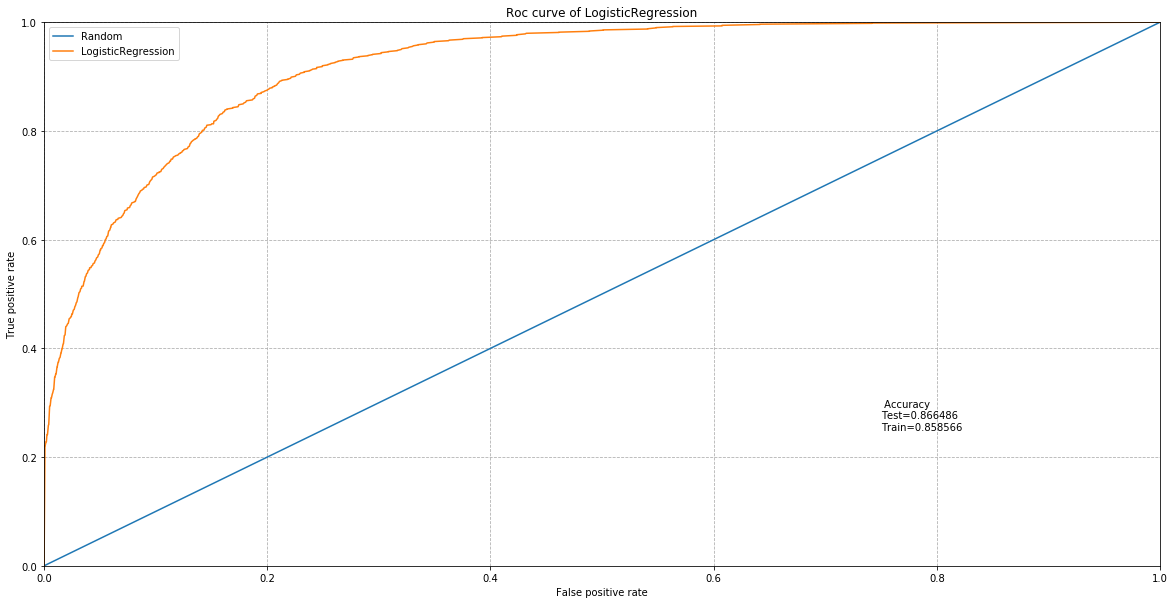

In [173]:
logreg_fpr, logreg_tpr = show_roc_curve(LogReg(**logreg_grid_search.iloc[0,0]),
                                        df_combis['df_hourscontinuous_nocountry'], pos_value=">50K")

[Go back to the top](#start)

#### Tuning MLP Classifier<a name="mlpc_tuning"></a>

Since MLPClassifier is a time consuming algorithm, we will do a randomized search on it.

In [174]:
from sklearn.model_selection import RandomizedSearchCV

In [175]:
mlpc_randomized_search = pd.read_csv("results/randomized_search_mlpc.csv", index_col=0)
mlpc_randomized_search

Parameters  mean_test_score  \
0   {'solver': 'sgd', 'learning_rate': 'adaptive',...         0.855246   
1   {'solver': 'sgd', 'learning_rate': 'adaptive',...         0.855164   
2   {'solver': 'sgd', 'learning_rate': 'adaptive',...         0.853689   
3   {'solver': 'sgd', 'learning_rate': 'adaptive',...         0.852623   
4   {'solver': 'sgd', 'learning_rate': 'constant',...         0.850943   
5   {'solver': 'adam', 'learning_rate': 'constant'...         0.846230   
6   {'solver': 'adam', 'learning_rate': 'invscalin...         0.845492   
7   {'solver': 'adam', 'learning_rate': 'invscalin...         0.844631   
8   {'solver': 'adam', 'learning_rate': 'constant'...         0.844344   
9   {'solver': 'adam', 'learning_rate': 'invscalin...         0.843770   
10  {'solver': 'adam', 'learning_rate': 'invscalin...         0.832582   
11  {'solver': 'adam', 'learning_rate': 'constant'...         0.828402   
12  {'solver': 'adam', 'learning_rate': 'invscalin...         0.824549   
13  {'solver': 'adam', 'learning_rate': 'invscalin...         0.822992   
14  {'solver': 'sgd', 'learning_rate': 'invscaling...         0.821025   
15  {'solver': 'adam', 'learning_rate': 'constant'...         0.820041   
16  {'solver': 'adam', 'learning_rate': 'adaptive'...         0.817992   
17  {'solver': 'adam', 'learning_rate': 'constant'...         0.817500   
18  {'solver': 'adam', 'learning_rate': 'constant'...         0.816639   
19  {'solver': 'adam', 'learning_rate': 'constant'...         0.815492   
20  {'solver': 'adam', 'learning_rate': 'constant'...         0.814795   
21  {'solver': 'sgd', 'learning_rate': 'invscaling...         0.804754   
22  {'solver': 'sgd', 'learning_rate': 'invscaling...         0.761475   
23  {'solver': 'sgd', 'learning_rate': 'invscaling...         0.757500   

    mean_train_score  
0           0.864723  
1           0.864775  
2           0.865236  
3           0.864314  
4           0.886455  
5           0.879600  
6           0.880102  
7           0.885441  
8           0.880400  
9           0.886783  
10          0.916967  
11          0.929303  
12          0.957736  
13          0.939477  
14          0.819928  
15          0.962561  
16          0.963525  
17          0.963473  
18          0.950809  
19          0.960123  
20          0.964119  
21          0.802080  
22          0.759836  
23          0.756957

In [176]:
mlpc_randomized_search.iloc[0,0]

"{'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (10, 50, 10), 'alpha': 0.0001, 'activation': 'relu'}"

We didn't get a higher score than with Logistic regressor.

During further tries, I found a better set of parameters :
    
    {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 
     'learning_rate': 'adaptive', 'solver': 'sgd'}

In [177]:
mlpc_gridsearch_better = pd.read_csv("results/grid_search_mlpc_2ndset.csv", index_col=0)
mlpc_gridsearch_better

Parameters  mean_test_score  \
0  {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.856311   
1  {'activation': 'relu', 'alpha': 0.0001, 'hidde...         0.854426   

   mean_train_score  
0          0.862398  
1          0.862807

In [178]:
mlpc_gridsearch_better.iloc[0,0]

"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}"

True <=50K  True >50K
Predicted <=50K        5791        433
Predicted >50K          691       1219

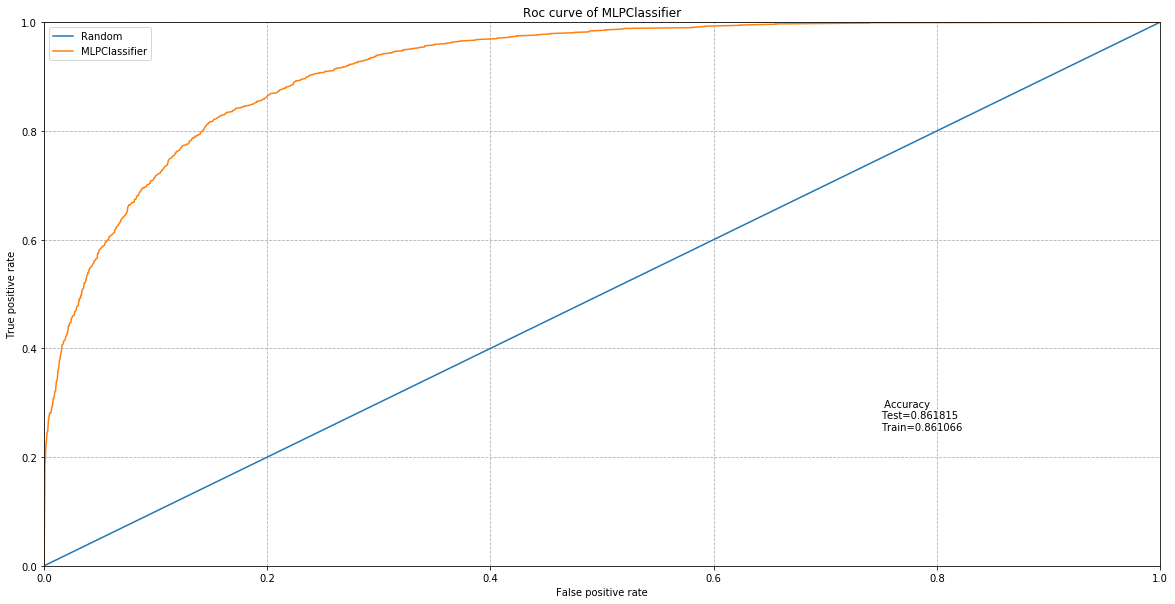

In [179]:
mlpc_fpr, mlpc_tpr = show_roc_curve(MLPC(**eval("dict("+mlpc_gridsearch_better.iloc[0,0]+")")), df_combis['df_hourscontinuous_nocontinent'], pos_value=">50K")

[Go back to the top](#start)

#### Tuning Random Forest<a name="rf_tuning"></a>

In [180]:
rf_grid_search = pd.read_csv("results/grid_search_randomforest.csv", index_col=0)
rf_grid_search

Parameters  mean_test_score  \
0    {'max_depth': 100, 'max_features': 'sqrt', 'mi...         0.857254   
1    {'max_depth': 35, 'max_features': 'sqrt', 'min...         0.857049   
2    {'max_depth': 100, 'max_features': 'auto', 'mi...         0.857008   
3    {'max_depth': 35, 'max_features': 'sqrt', 'min...         0.856885   
4    {'max_depth': 100, 'max_features': 'sqrt', 'mi...         0.856844   
..                                                 ...              ...   
157  {'max_depth': 100, 'max_features': 'sqrt', 'mi...         0.836762   
158  {'max_depth': 100, 'max_features': 'sqrt', 'mi...         0.836639   
159  {'max_depth': 35, 'max_features': 'auto', 'min...         0.835533   
160  {'max_depth': 35, 'max_features': 'sqrt', 'min...         0.835041   
161  {'max_depth': 100, 'max_features': 'auto', 'mi...         0.833770   

     mean_train_score  
0            0.867951  
1            0.868166  
2            0.867828  
3            0.867756  
4            0.867090  
..                ...  
157          0.940820  
158          0.933709  
159          0.933555  
160          0.933545  
161          0.933668  

[162 rows x 3 columns]

In [181]:
rf_grid_search.iloc[0,0]

"{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}"

True <=50K  True >50K
Predicted <=50K        5867        357
Predicted >50K          769       1141

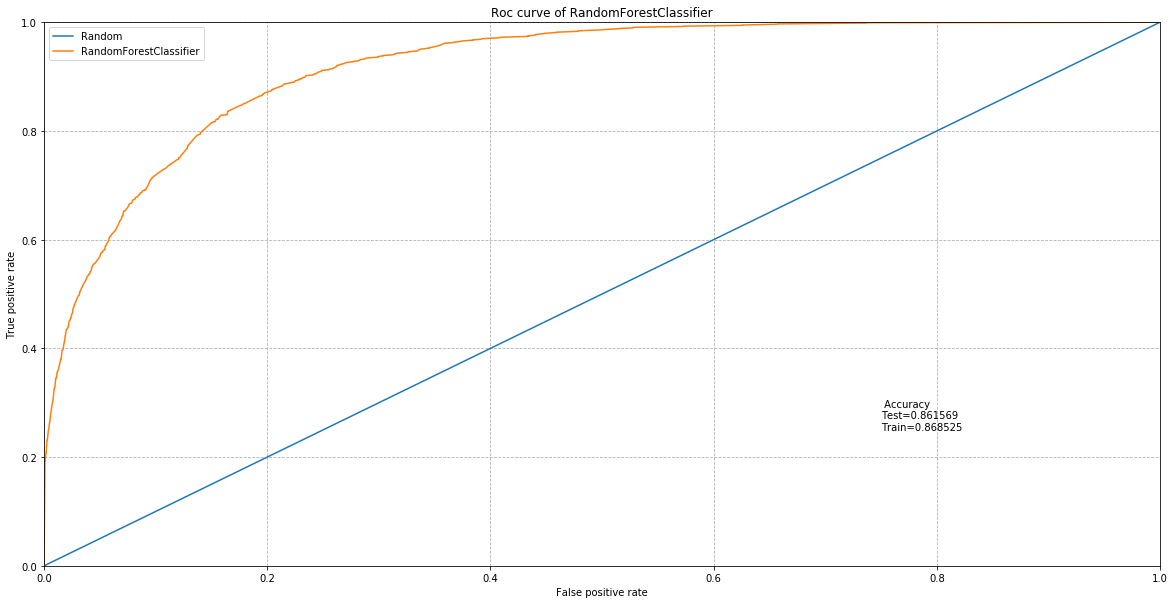

In [182]:
rf_fpr, rf_tpr = show_roc_curve(RF(**eval("dict("+rf_grid_search.iloc[0,0]+")")), df_combis['df_hourscontinuous_nocountry_nocontinent_nofnlwgt'], pos_value=">50K")

[Go back to the top](#start)

### Ensemble of the three<a name="ensembling"></a>

Here is the combination of the three ROC curves. As one curve is sometime higher than another, there might be some room for a custom bagging betwin the three represented here.

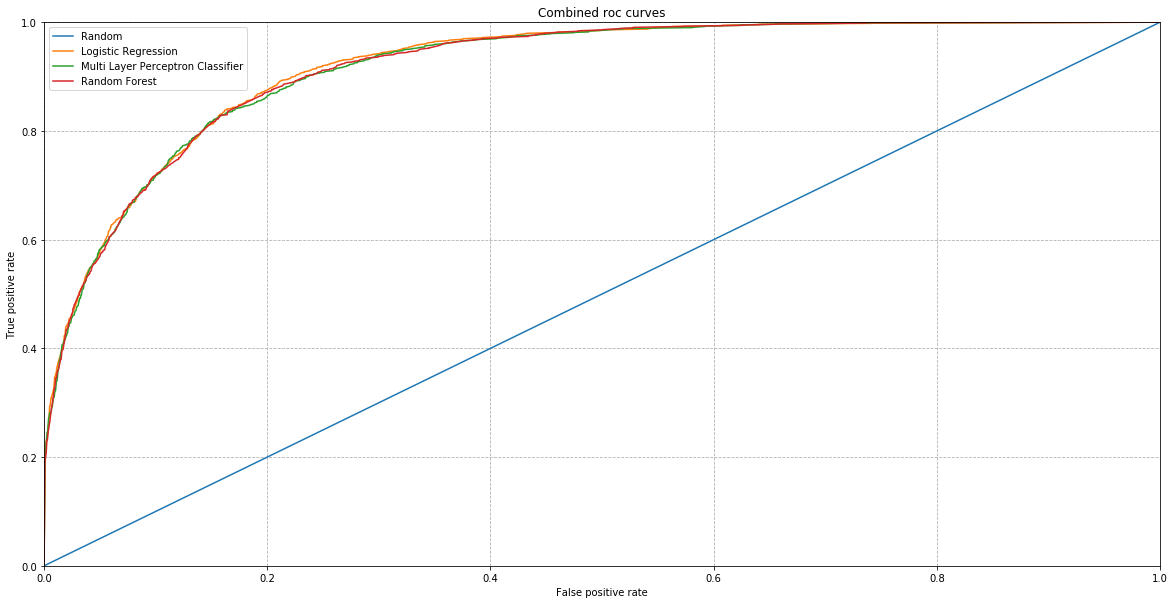

In [183]:
plt.plot((0,1),(0,1), label="Random")
plt.plot(logreg_fpr, logreg_tpr, label="Logistic Regression")
plt.plot(mlpc_fpr, mlpc_tpr, label="Multi Layer Perceptron Classifier")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.title("Combined roc curves")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(ls="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

Before building it, let's estimate the accuracy of an ensemble algorithm which takes, for each observation, the most given answer.

In [184]:
data=df
data["age"]=data.age.astype(str)

C:\Users\gwael\.conda\envs\Env1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [185]:
def custom_estimation(estimators, cols_to_drop, X, y, pos_value, show_matrix = True):
    def drop_dummy_cols(dataframe, cols_to_drop):
        ret_df = dataframe
        for to_drop in cols_to_drop:
            ret = ret_df[[col for col in ret_df if not col.startswith(to_drop)]]
        return ret_df
    
    accuracy_results = {}
    
    probas = []
    y_preds = []
    X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X, drop_first=True), y)
    
    for estimator, to_drop in zip(estimators, cols_to_drop):
        print("Estimating with %s."%estimator.__class__.__name__)
        X_train_data = StandardScaler().fit_transform(drop_dummy_cols(X_train, to_drop))
        X_test_data = StandardScaler().fit_transform(drop_dummy_cols(X_test, to_drop))
        estimator.fit(X_train_data, y_train)
        y_pred = estimator.predict(X_test_data)==pos_value
        y_preds.append(y_pred.astype(int))
        accuracy_results[estimator.__class__.__name__]=accuracy_score(y_test==pos_value, y_pred)
        
        if show_matrix : 
            print("Confusion matrix of %s."%estimator.__class__.__name__)
            display(pd.DataFrame(confusion_matrix(y_test==pos_value,y_pred), columns = ['Predicted <=50K', 'Predicted >50K'], 
                                 index=['True <=50K','True >50K']))
        
    y_combined = np.round(np.array(y_preds).sum(axis=0)/3)
    accuracy_results["Combined"] = accuracy_score(y_test==pos_value, y_combined)
    if show_matrix:
        print("Confusion matrix of the bagging.")
        display(pd.DataFrame(confusion_matrix(y_test==pos_value,y_pred), columns = ['Predicted <=50K', 'Predicted >50K'], 
                             index=['True <=50K','True >50K']))
    print("Accuracy scores")
    pd.DataFrame(accuracy_results, index=["accuracy_score"])
    return accuracy_results
    

In [186]:
estimators = [LogReg(**{'C':0.1, 'n_jobs':-1, 'penalty':'l2'}), 
              MLPC(**{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}),
              RF(**{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200})]

cols_to_drop = [["ranged_hours_per_week", "native_country"],
                ["ranged_hours_per_week", "native_continent"],
                ["ranged_hours_per_week", "native_country", "native_continent","fnlwgt"]]

In [187]:
cust_est = custom_estimation(estimators, cols_to_drop, data.drop("income", axis=1), data.income, pos_value=">50K")

Estimating with LogisticRegression.
Confusion matrix of LogisticRegression.


Predicted <=50K  Predicted >50K
True <=50K             5763             371
True >50K               805            1195

Estimating with MLPClassifier.
Confusion matrix of MLPClassifier.


Predicted <=50K  Predicted >50K
True <=50K             5731             403
True >50K               779            1221

Estimating with RandomForestClassifier.
Confusion matrix of RandomForestClassifier.


Predicted <=50K  Predicted >50K
True <=50K             5799             335
True >50K               874            1126

Confusion matrix of the bagging.


Predicted <=50K  Predicted >50K
True <=50K             5799             335
True >50K               874            1126

Accuracy scores


In [188]:
pd.DataFrame(cust_est, index=["accuracy_score"])

LogisticRegression  MLPClassifier  RandomForestClassifier  \
accuracy_score            0.855422       0.854684                0.851365   

                Combined  
accuracy_score  0.856774

As supposed, the combined score is slightly higher than any of the algorithm's ones.

[Go back to the top](#start)

# What would improve the predictability of this dataset ?<a name="conclusion"></a>

In my opinion, it clearly needs geographical datas.

Being able to cross-check the current data with external one, and spot any significance between income and state, for instance, is most important.
We easily accept that the same person won't have the same level of income in Nevada or in New Jersey.

[Go back to the top](#start)